In [24]:
!python -m pip install texlive texlive-latex-extra texlive-fonts-recommended dvipng

ERROR: Could not find a version that satisfies the requirement texlive (from versions: none)
ERROR: No matching distribution found for texlive
You should consider upgrading via the 'c:\Users\lenovo\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
%matplotlib inline

# Useful for running matplotlib on high-dpi displays
%config InlineBackend.figure_format='retina'

In [3]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [4]:
data = pd.read_csv("telecom_churn.csv")

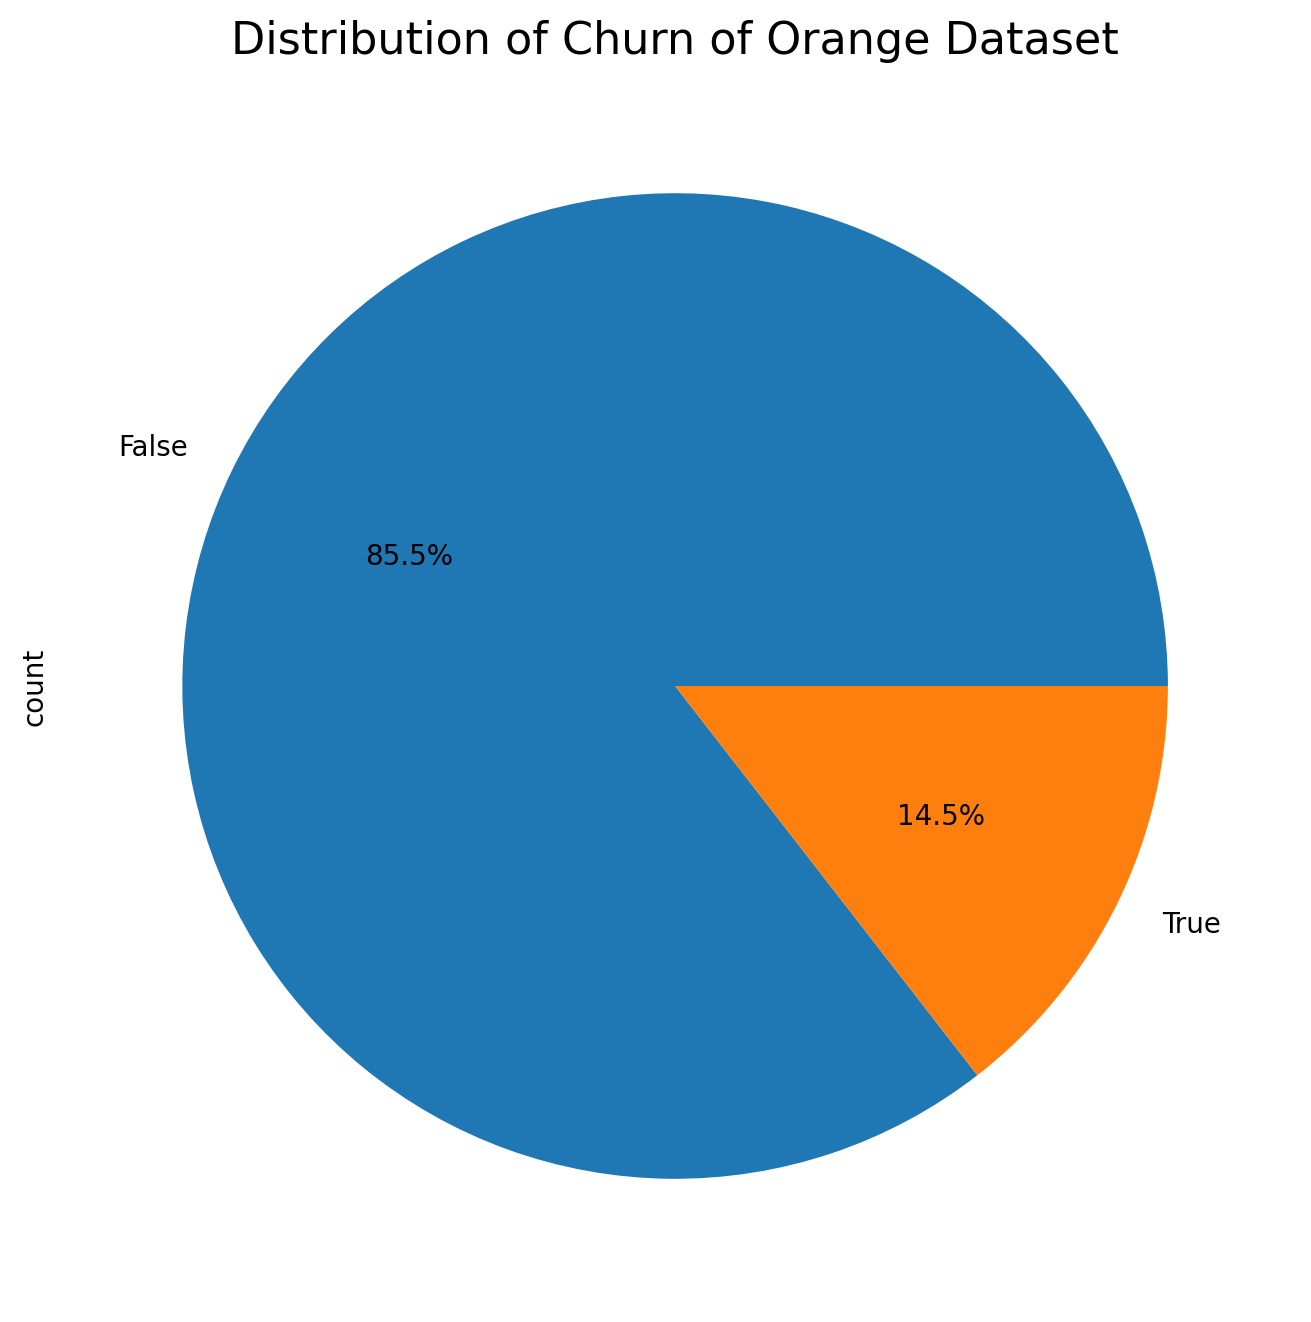

In [5]:
plt.figure(figsize=(10, 8))
data['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Churn of Orange Dataset', fontsize=16)
plt.show()


In [6]:
# Display the first few rows and general info about the dataset
data_info = data.info()
data_head = data.head()
data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

(None,
   State  Account length  Area code International plan Voice mail plan  \
 0    KS             128        415                 No             Yes   
 1    OH             107        415                 No             Yes   
 2    NJ             137        415                 No              No   
 3    OH              84        408                Yes              No   
 4    OK              75        415                Yes              No   
 
    Number vmail messages  Total day minutes  Total day calls  \
 0                     25              265.1              110   
 1                     26              161.6              123   
 2                      0              243.4              114   
 3                      0              299.4               71   
 4                      0              166.7              113   
 
    Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
 0             45.07              197.4               99             16.78   

## Change data format

In [7]:
# Original:
data.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [8]:
# Convert the "Area code" column to a categorical type
data['Area code'] = data['Area code'].astype('object')

# Verify the conversion by checking the data types again
data.dtypes

State                      object
Account length              int64
Area code                  object
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

## Numerical summary

In [9]:
# Summary statistics for numerical columns in the DataFrame
numerical_summary = data.describe().round(2)

# Display the summary statistics
numerical_summary

Account length  Number vmail messages  Total day minutes  \
count         3333.00                3333.00            3333.00   
mean           101.06                   8.10             179.78   
std             39.82                  13.69              54.47   
min              1.00                   0.00               0.00   
25%             74.00                   0.00             143.70   
50%            101.00                   0.00             179.40   
75%            127.00                  20.00             216.40   
max            243.00                  51.00             350.80   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count          3333.00           3333.00            3333.00          3333.00   
mean            100.44             30.56             200.98           100.11   
std              20.07              9.26              50.71            19.92   
min               0.00              0.00               0.00             0.00   
25%              87.00             24.43             166.60            87.00   
50%             101.00             30.50             201.40           100.00   
75%             114.00             36.79             235.30           114.00   
max             165.00             59.64             363.70           170.00   

       Total eve charge  Total night minutes  Total night calls  \
count           3333.00              3333.00            3333.00   
mean              17.08               200.87             100.11   
std                4.31                50.57              19.57   
min                0.00                23.20              33.00   
25%               14.16               167.00              87.00   
50%               17.12               201.20             100.00   
75%               20.00               235.30             113.00   
max               30.91               395.00             175.00   

       Total night charge  Total intl minutes  Total intl calls  \
count             3333.00             3333.00           3333.00   
mean                 9.04               10.24              4.48   
std                  2.28                2.79              2.46   
min                  1.04                0.00              0.00   
25%                  7.52                8.50              3.00   
50%                  9.05               10.30              4.00   
75%                 10.59               12.10              6.00   
max                 17.77               20.00             20.00   

       Total intl charge  Customer service calls  
count            3333.00                 3333.00  
mean                2.76                    1.56  
std                 0.75                    1.32  
min                 0.00                    0.00  
25%                 2.30                    1.00  
50%                 2.78                    1.00  
75%                 3.27                    2.00  
max                 5.40                    9.00

## Analyze distribution of Churn

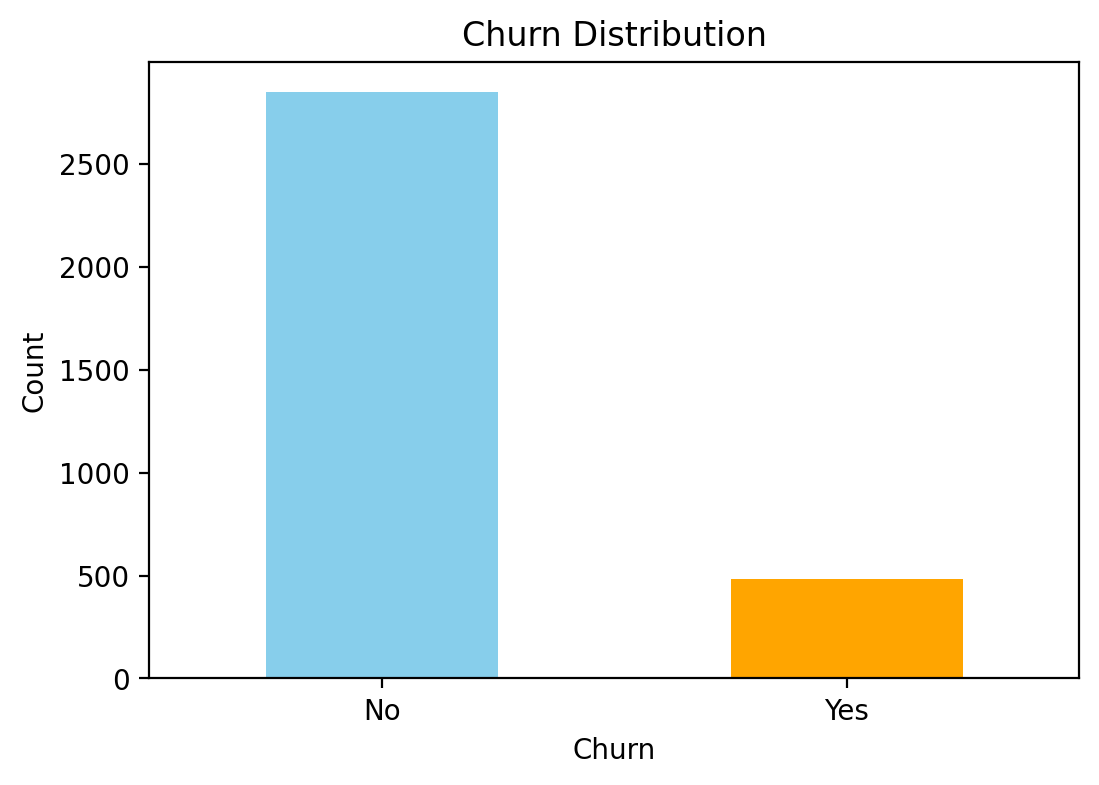

In [10]:
import matplotlib.pyplot as plt

# Churn distribution
churn_counts = data['Churn'].value_counts()

# Plot churn distribution
plt.figure(figsize=(6,4))
churn_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()


In [11]:
# Calculate churn rate
churn_rate = data['Churn'].mean() * 100  # Percentage

churn_rate


14.491449144914492

The churn rate in the dataset is approximately 14.49%. This means that around 14.5% of the customers in the dataset have discontinued their service with the company, while the remaining 85.5% have stayed. This relatively low churn rate indicates that most customers are retained, but a significant portion is still leaving. A churn rate of this magnitude may warrant a closer examination of the factors influencing customer attrition, as even a small churn rate can have substantial financial implications, especially for subscription-based businesses. Reducing churn by even a few percentage points can lead to significant improvements in revenue retention and customer lifetime value.

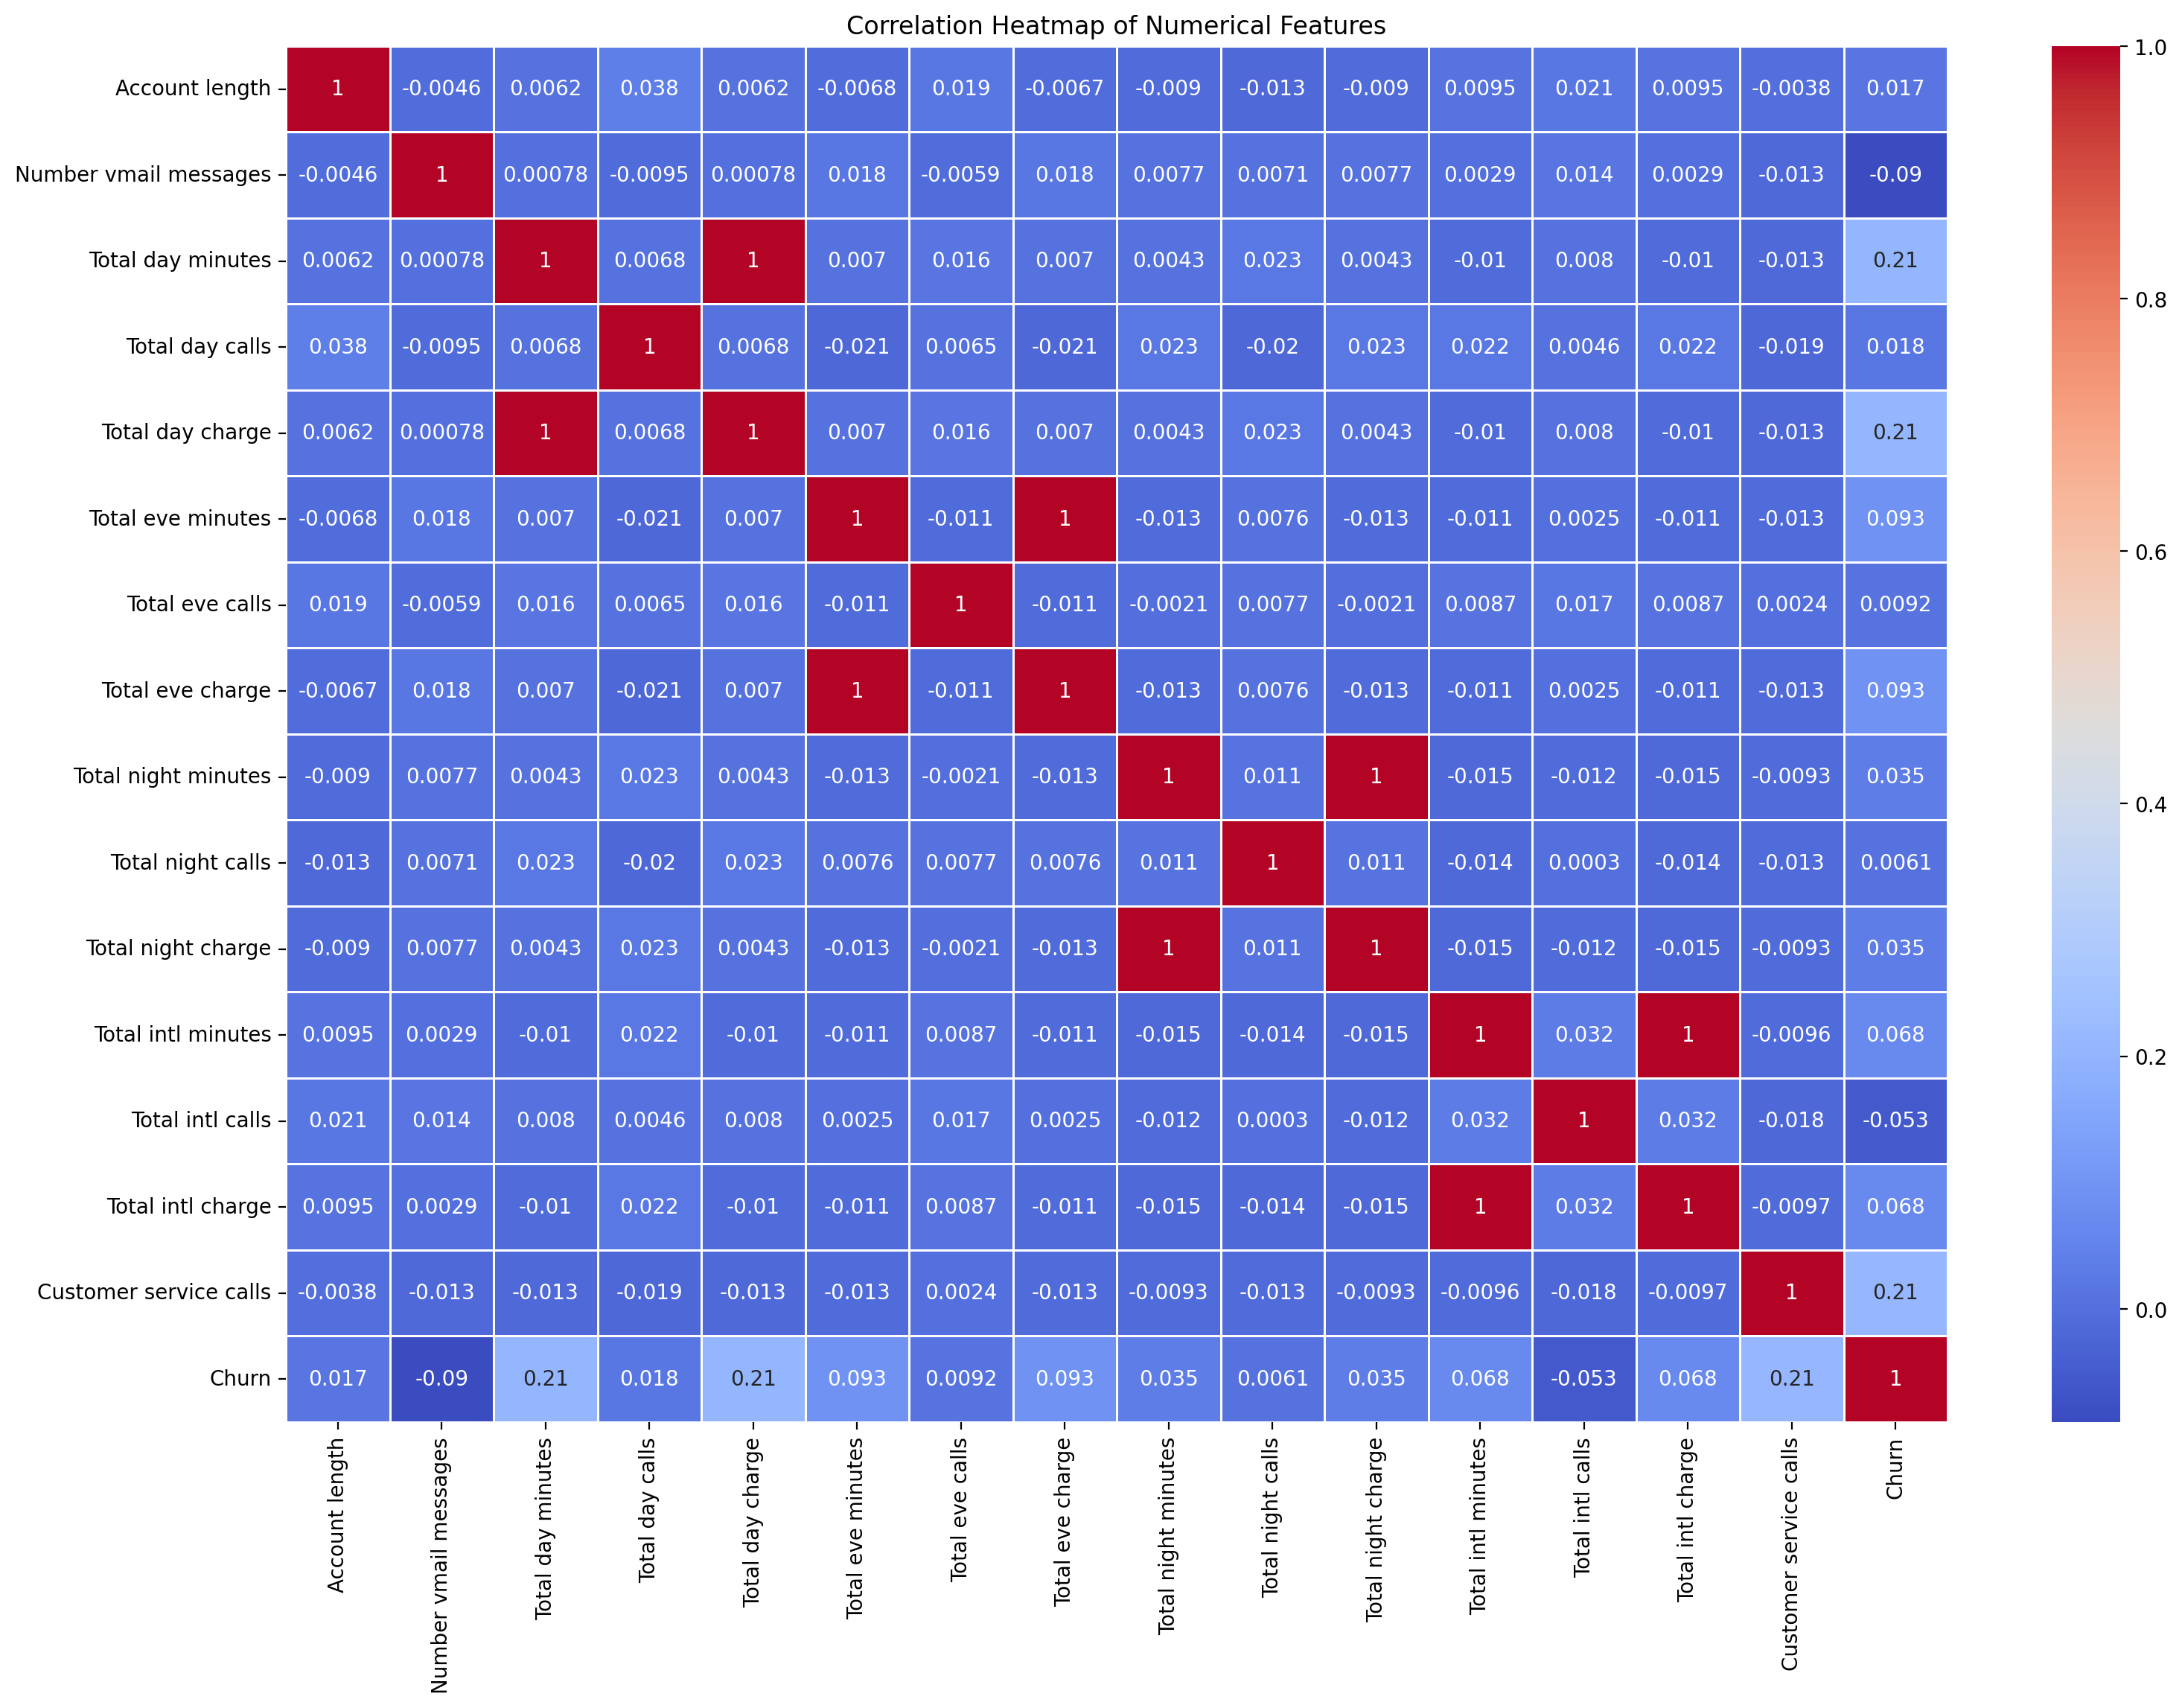

In [12]:
import seaborn as sns
# Selecting only numeric columns for correlation matrix
numeric_columns = data.select_dtypes(include=['float64', 'int64', 'bool'])

# Correlation matrix for numeric columns only
corr_matrix = numeric_columns.corr()

# Plot heatmap
# Plot heatmap with larger dimensions
plt.figure(figsize=(18,12))  # Increase the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


Charges and minutes are tightly linked, as expected, because charges are derived directly from the minutes used in various time periods (day, evening, night, and international). Therefore, these variables do not provide additional predictive information about churn beyond one another. The most notable correlation related to churn is the number of customer service calls, with a moderate positive correlation of approximately 0.21, indicating that customers who make more service calls are more likely to churn. This suggests that frequent interactions with customer service, possibly due to dissatisfaction or issues, may lead to churn. Conversely, usage patterns, including the total number of minutes spent on calls during different times of the day, show little to no correlation with churn, meaning that the amount of service usage is not a strong predictor of whether a customer will leave. Additionally, account length shows a weak negative correlation with churn, implying that customers with longer relationships with the company are slightly less likely to churn, but this effect is minimal. Overall, customer dissatisfaction, reflected through service call frequency, may be a more significant driver of churn than usage behavior.

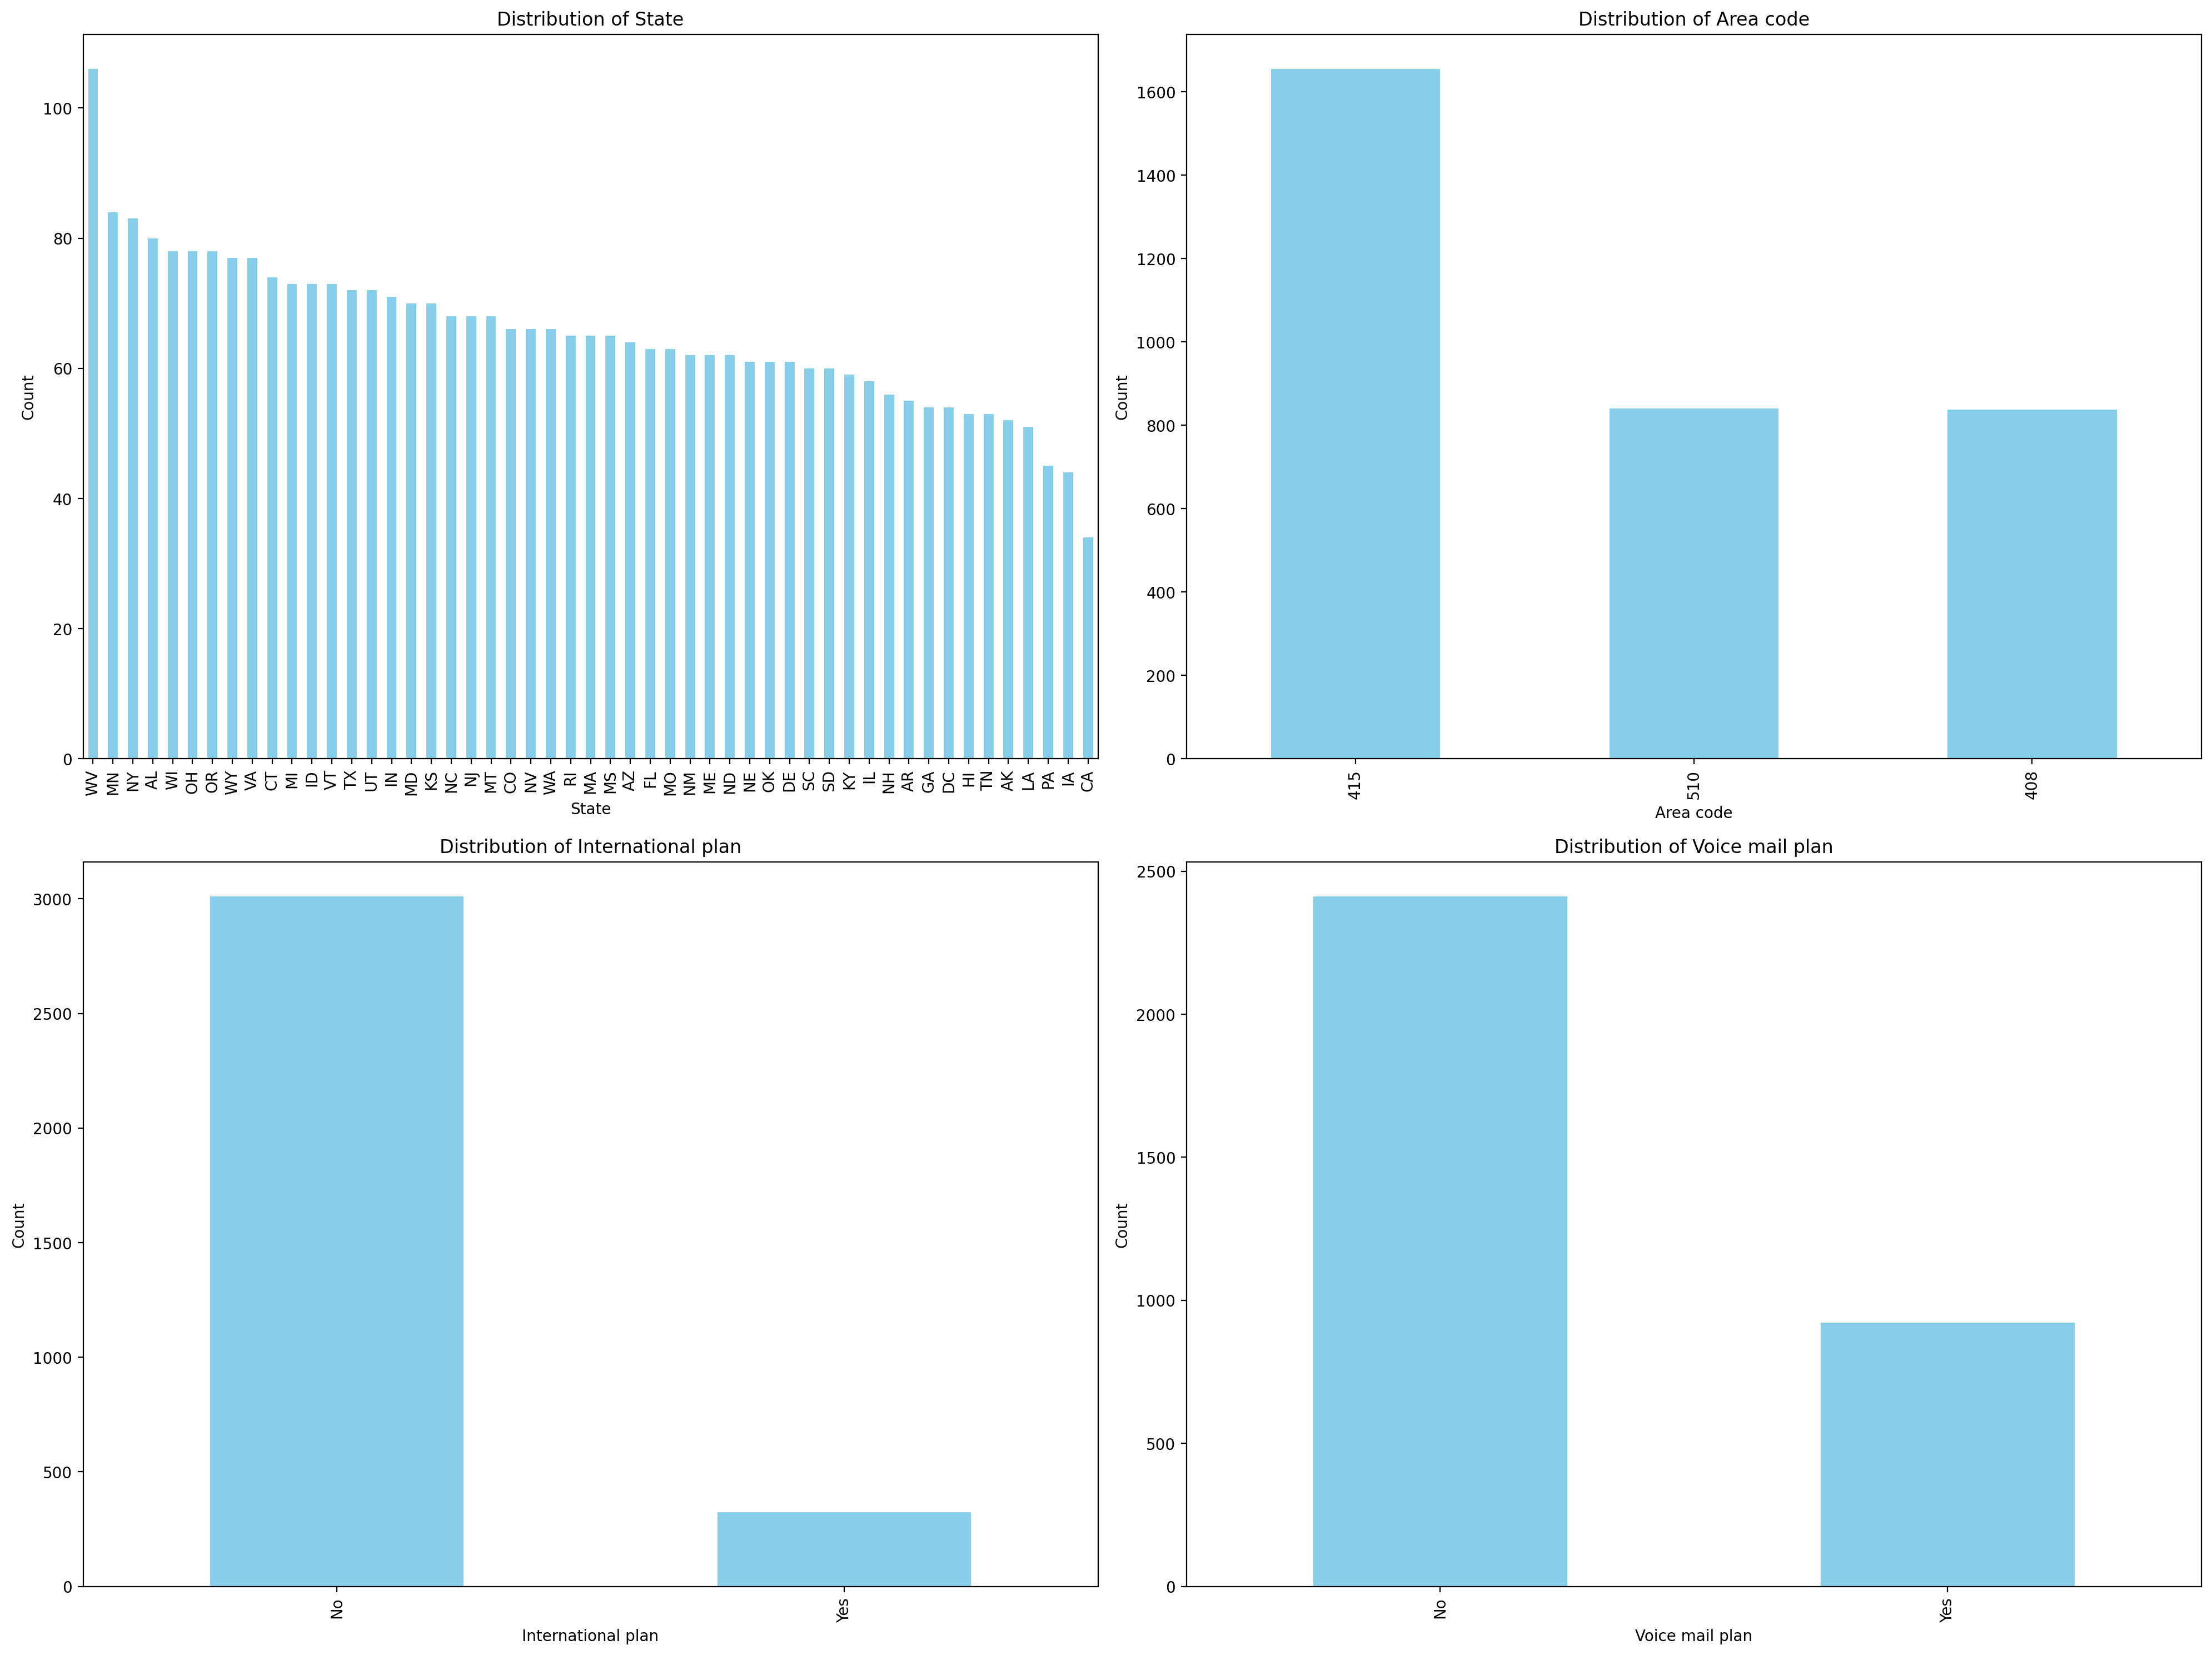

In [13]:
# Distribution of categorical columns
# Plot distribution of categorical columns
categorical_columns = ['State', 'Area code', 'International plan', 'Voice mail plan']
plt.figure(figsize=(20,15))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    data[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


The categorical columns exhibit varying degrees of imbalance. Features like the International plan and Voice mail plan show a strong preference for the "No" option, indicating that most customers do not opt for these services. The churn distribution is also imbalanced, with most customers remaining loyal, but the presence of churned customers highlights areas that need further analysis. The even distribution across State and Area code suggests that the customer base is geographically diverse with no clear regional concentration.

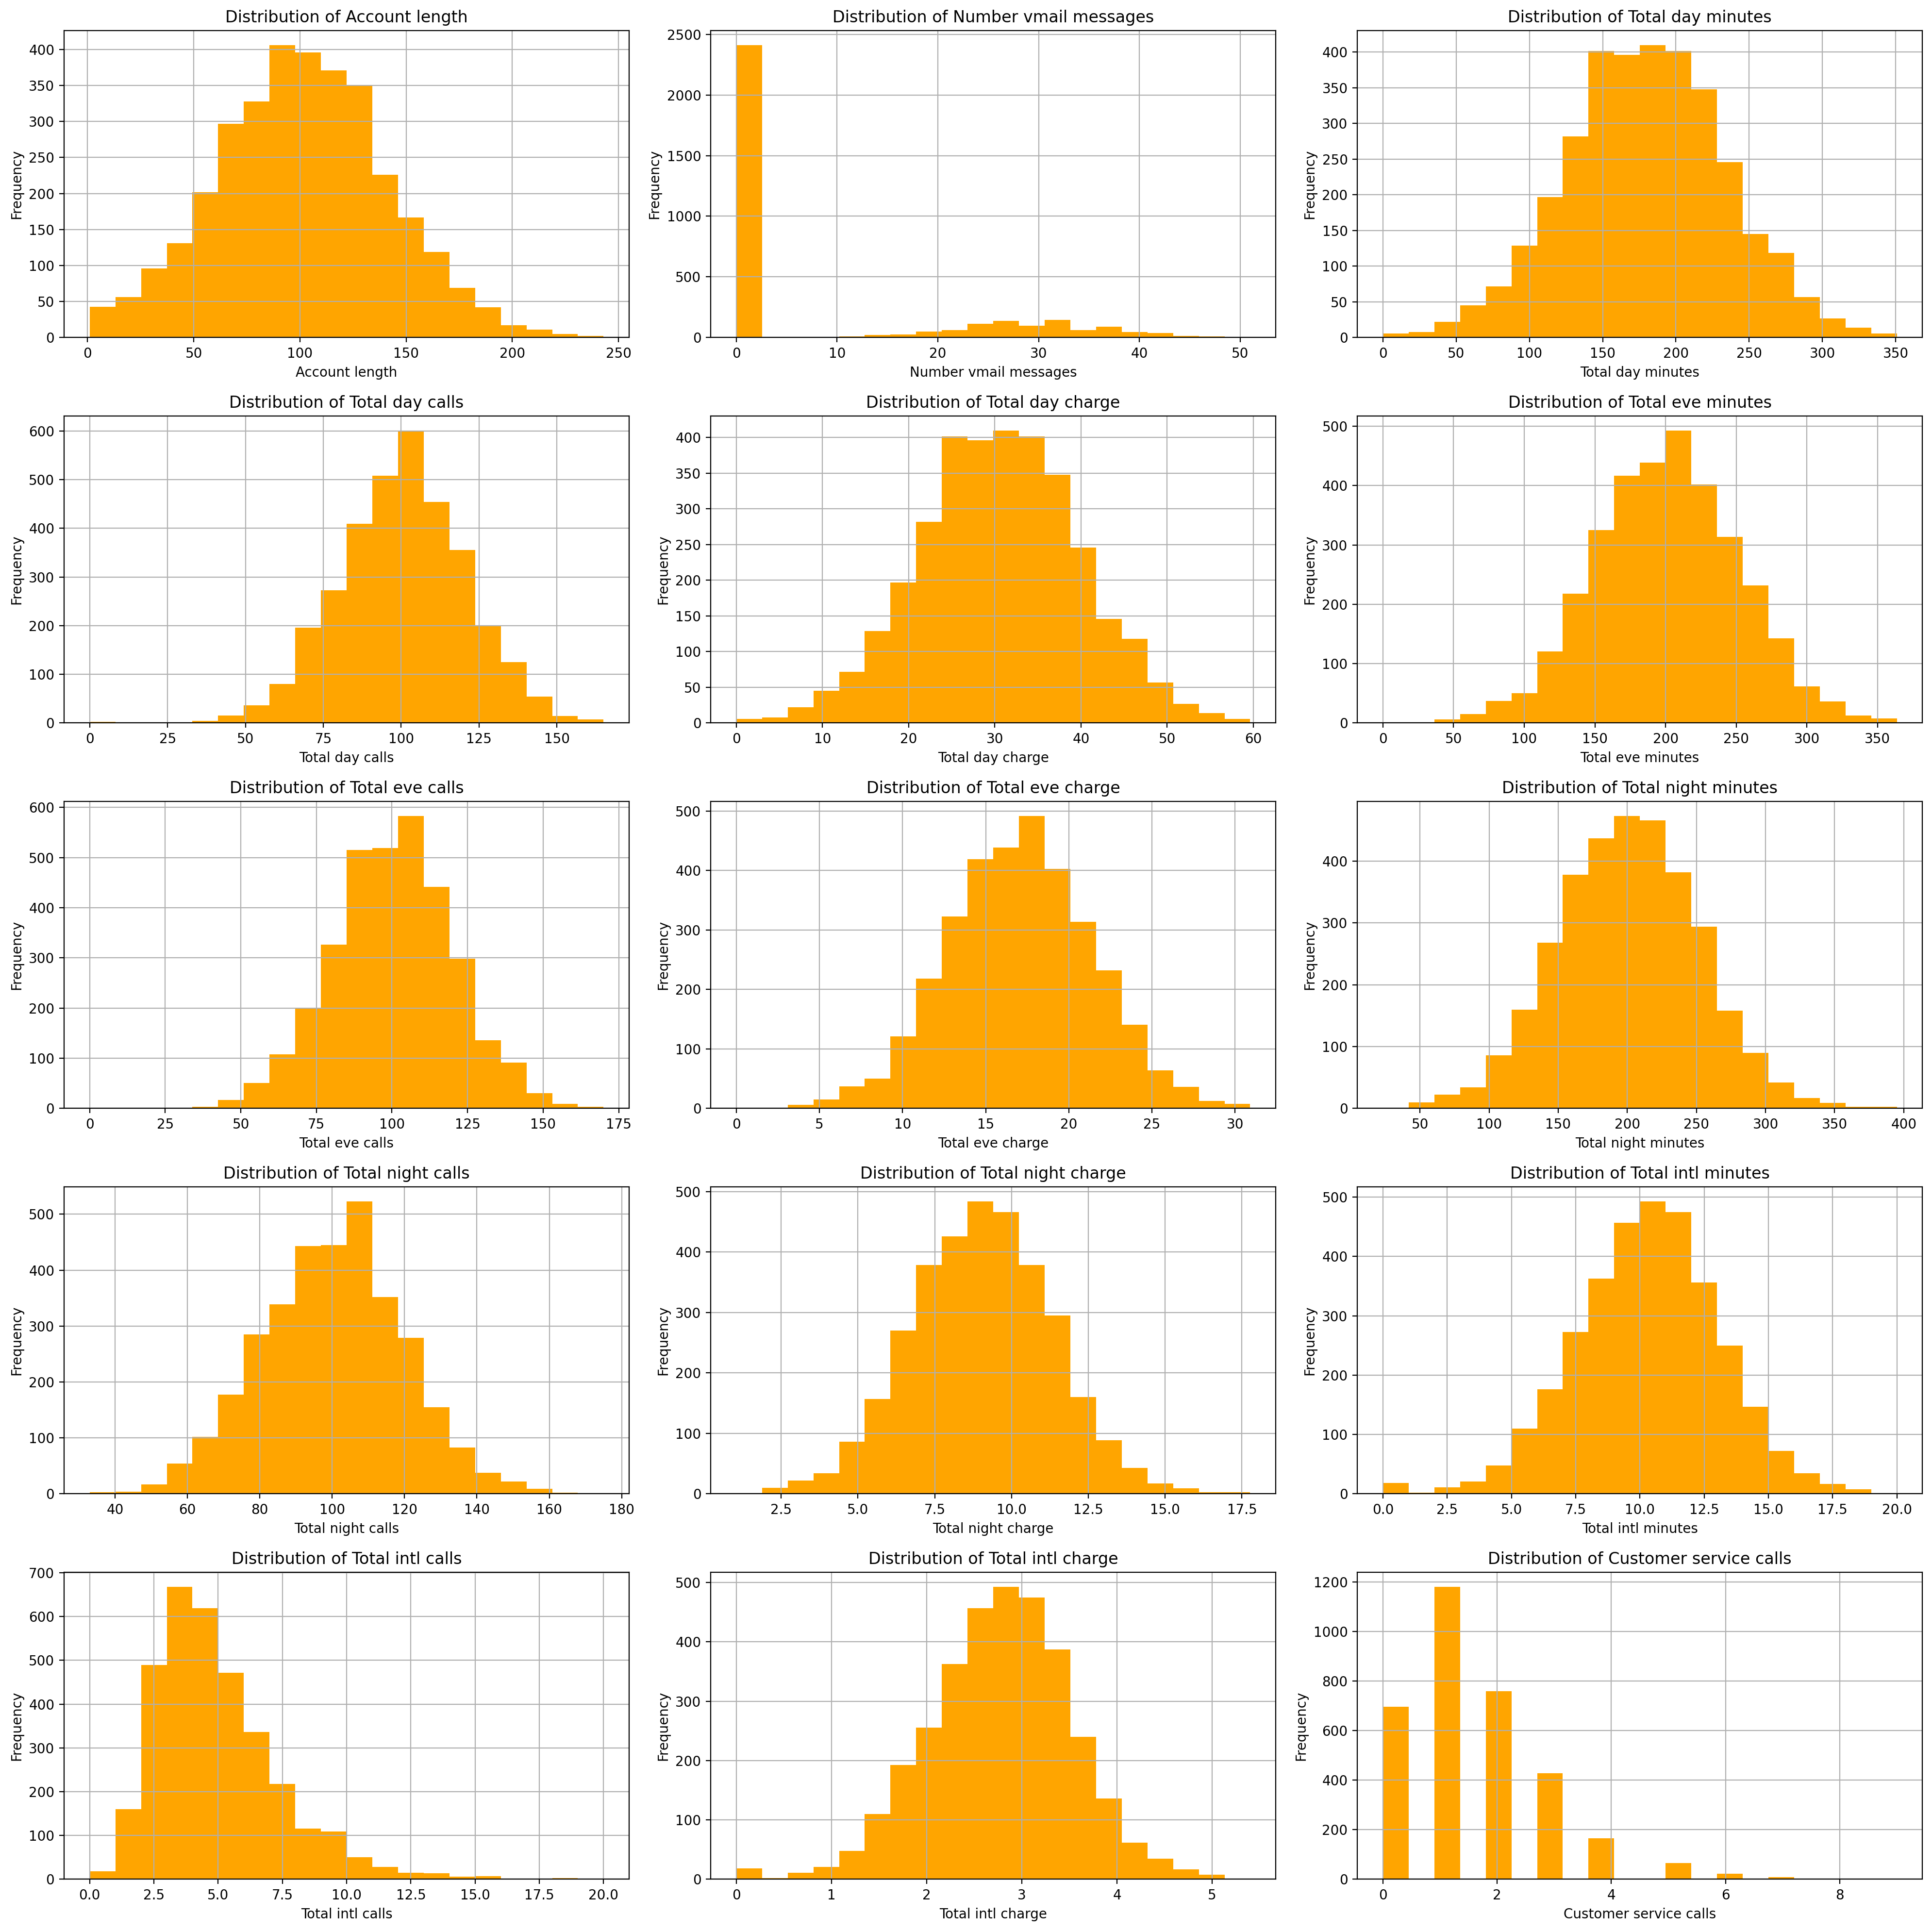

In [14]:
# Plot distribution of numerical columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
plt.figure(figsize=(20,20))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 3, i)
    data[col].hist(bins=20, color='orange')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


\begin{itemize}
    \item \textbf{Account Length}: The distribution of account length is fairly spread out, with a slight skew towards shorter account lengths. This suggests that most customers have been with the company for a moderate period, with fewer customers having very long-standing accounts.
    
    \item \textbf{Number of Voicemail Messages}: The majority of customers have zero voicemail messages, as seen by a significant spike at zero. This aligns with the observation that most customers do not subscribe to a voicemail plan. Very few customers have a high number of voicemail messages.
    
    \item \textbf{Total Day Minutes, Total Eve Minutes, Total Night Minutes, Total International Minutes}: These columns show a roughly normal distribution (bell-shaped), with most customers using a moderate amount of minutes. A few outliers represent customers with very high usage.
    
    \item \textbf{Total Day Calls, Total Eve Calls, Total Night Calls, Total International Calls}: The number of calls is distributed quite uniformly across these columns. Most customers make a moderate number of calls, with fewer customers making very high or very low numbers of calls.
    
    \item \textbf{Total Day Charge, Total Eve Charge, Total Night Charge, Total International Charge}: The distributions for these charges mirror the distributions for the corresponding minutes (day, evening, night, and international) because charges are directly derived from the number of minutes used. These are also close to normal, with a few outliers representing higher charges.
    
    \item \textbf{Customer Service Calls}: The distribution of customer service calls is heavily skewed towards zero, meaning most customers rarely contact customer service. A small portion of customers, however, have made multiple service calls, which may suggest dissatisfaction and a higher risk of churn.
\end{itemize}

\subsection*{Summary}
Most of the numerical columns (such as minutes, calls, and charges) follow a normal distribution, with most customers using a moderate amount of services. A few outliers, representing high usage or high charges, may either be high-value customers or those at risk of churn. Voicemail messages and customer service calls are highly skewed, with most customers not using voicemail and few calling customer service frequently. The distribution of customer service calls could indicate potential dissatisfaction among those who call frequently.



State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


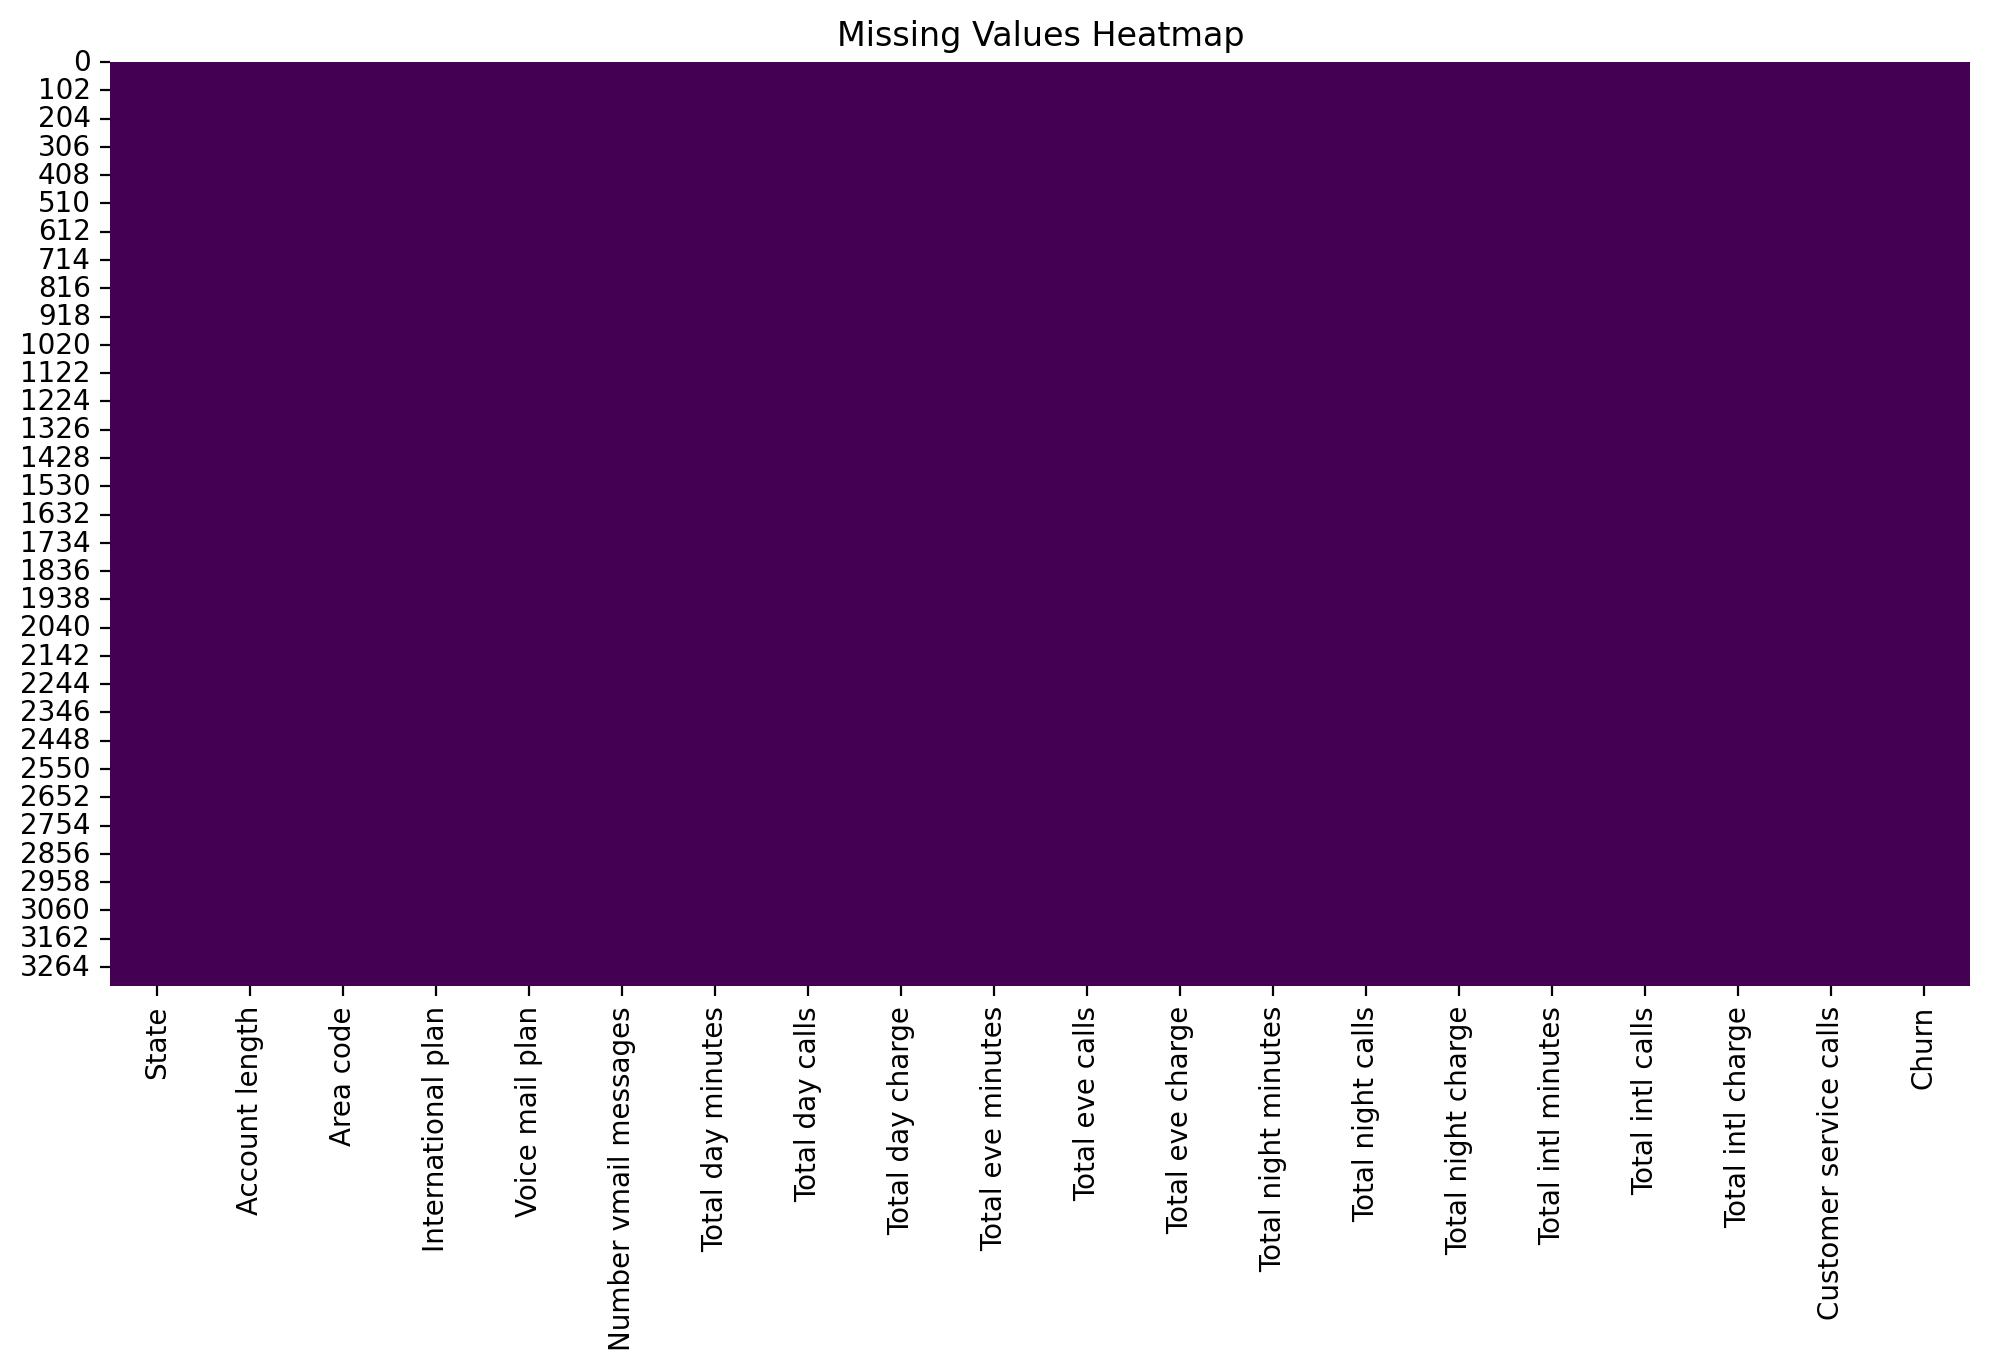

In [15]:
# Visualize missing values
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)
# Display columns with missing values
missing_values[missing_values > 0]

import seaborn as sns
import matplotlib.pyplot as plt

# Plot missing value heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

The heatmap indicates that there are no missing values in the dataset, as the entire grid is fully colored (showing no gaps). Additionally, the summary shows that there are no columns with missing values.

In [16]:
# Detect outlier

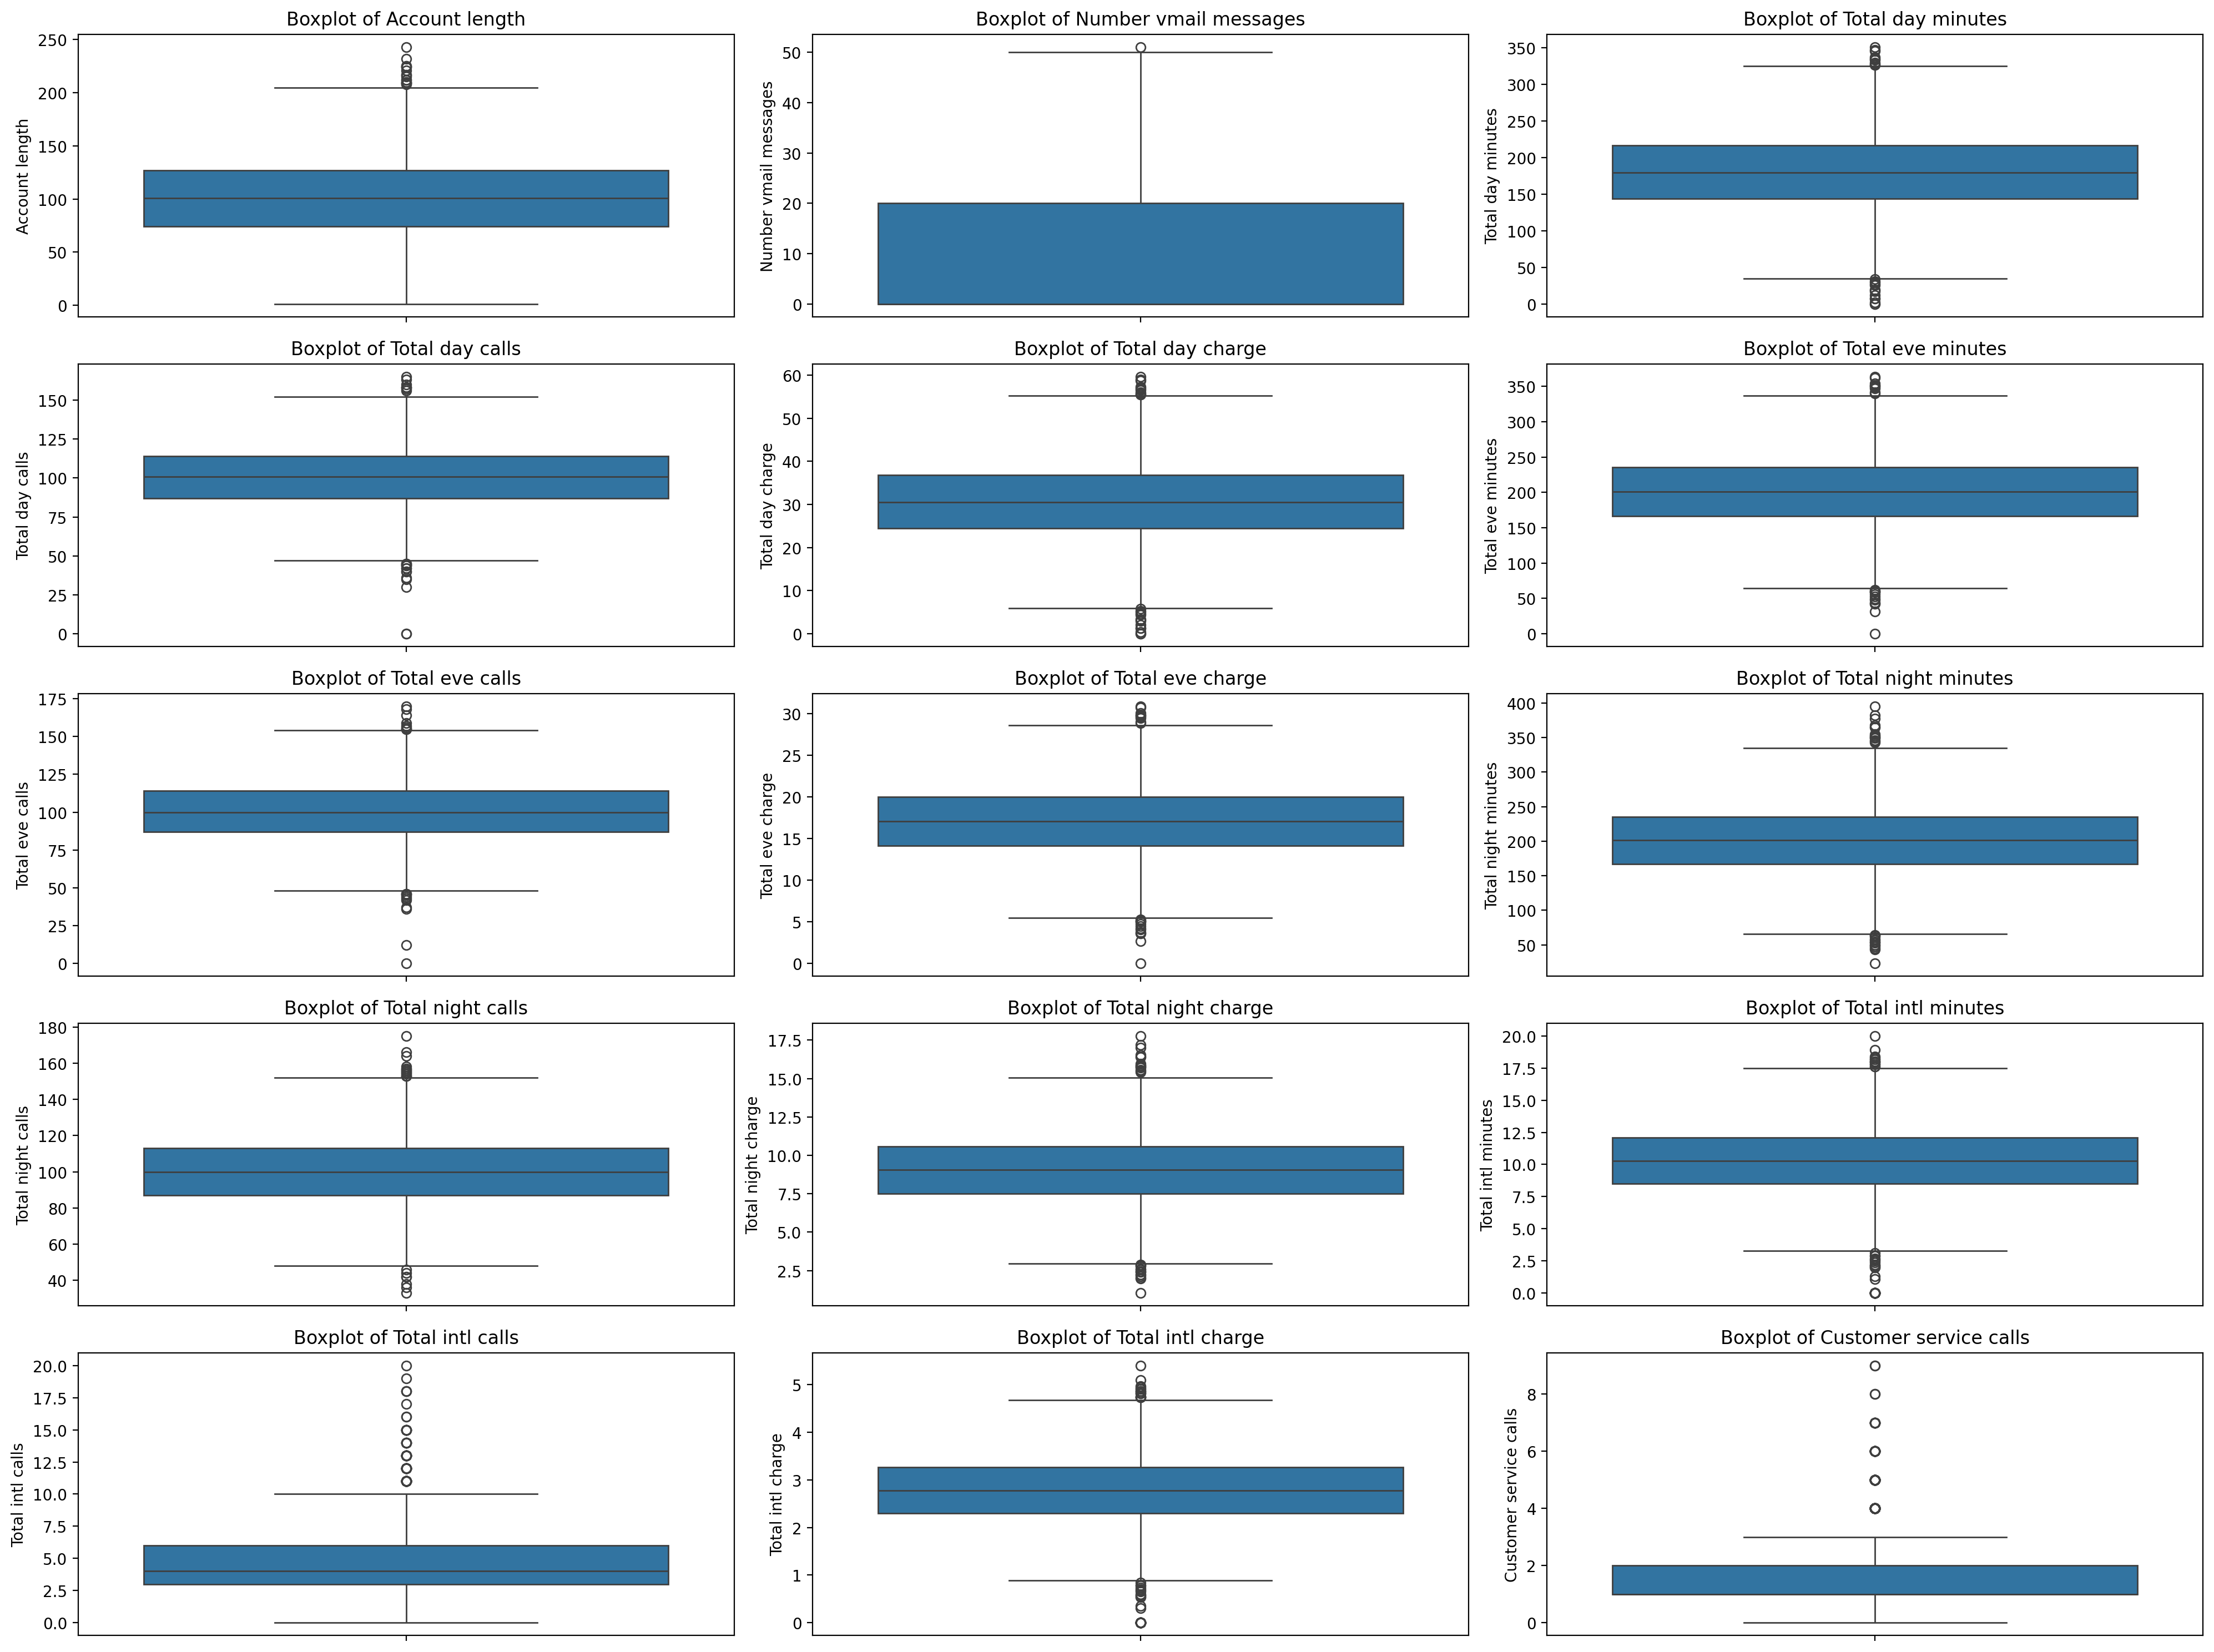

In [17]:
# Plot box plots to visualize outliers in numerical columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
plt.figure(figsize=(20,15))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    
plt.tight_layout()
plt.show()


The box plots for the numerical columns reveal several insights about outliers in the dataset:

    For columns such as Total day minutes, Total eve minutes, Total night minutes, and their corresponding charges, there are a few noticeable outliers beyond the whiskers. These likely represent customers with unusually high usage or charges.
    In the Customer service calls column, there are a few clear outliers, where most customers made between 0 to 3 service calls, but some made many more.
    Number of voicemail messages also has outliers with very few customers having a high number of voicemail messages, while most have none.

In [18]:
from scipy.stats import zscore

numeric_columns = data.select_dtypes(include=[np.number])

# Recalculate z-scores for all numeric columns except 'MadeCallToRetentionTeam'
z_scores = numeric_columns.drop(columns=["Customer service calls"]).apply(zscore)

data = data[(z_scores.abs() <= 3).all(axis=1)]

In [19]:
data

State  Account length Area code International plan Voice mail plan  \
0       KS             128       415                 No             Yes   
1       OH             107       415                 No             Yes   
2       NJ             137       415                 No              No   
3       OH              84       408                Yes              No   
4       OK              75       415                Yes              No   
...    ...             ...       ...                ...             ...   
3328    AZ             192       415                 No             Yes   
3329    WV              68       415                 No              No   
3330    RI              28       510                 No              No   
3331    CT             184       510                Yes              No   
3332    TN              74       415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
3328             26.55              215.5              126             18.32   
3329             39.29              153.4               55             13.04   
3330             30.74              288.8               58             24.55   
3331             36.35              159.6               84             13.57   
3332             39.85              265.9               82             22.60   

      Total night minutes  Total night calls  Total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
3328                279.1                 83               12.56   
3329                191.3                123                8.61   
3330                191.9                 91                8.64   
3331                139.2                137                6.26   
3332                241.4                 77               10.86   

      Total intl minutes  Total intl calls  Total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
3328                 9.9                 6               2.67   
3

In [20]:
data.reset_index(drop=True)

State  Account length Area code International plan Voice mail plan  \
0       KS             128       415                 No             Yes   
1       OH             107       415                 No             Yes   
2       NJ             137       415                 No              No   
3       OH              84       408                Yes              No   
4       OK              75       415                Yes              No   
...    ...             ...       ...                ...             ...   
3199    AZ             192       415                 No             Yes   
3200    WV              68       415                 No              No   
3201    RI              28       510                 No              No   
3202    CT             184       510                Yes              No   
3203    TN              74       415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3199                     36              156.2               77   
3200                      0              231.1               57   
3201                      0              180.8              109   
3202                      0              213.8              105   
3203                     25              234.4              113   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
3199             26.55              215.5              126             18.32   
3200             39.29              153.4               55             13.04   
3201             30.74              288.8               58             24.55   
3202             36.35              159.6               84             13.57   
3203             39.85              265.9               82             22.60   

      Total night minutes  Total night calls  Total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
3199                279.1                 83               12.56   
3200                191.3                123                8.61   
3201                191.9                 91                8.64   
3202                139.2                137                6.26   
3203                241.4                 77               10.86   

      Total intl minutes  Total intl calls  Total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
3199                 9.9                 6               2.67   
3

In [21]:
# Checking for duplicates in the dataset
duplicate_rows = data.duplicated()

# Display the number of duplicate rows
num_duplicates = duplicate_rows.sum()
num_duplicates


0

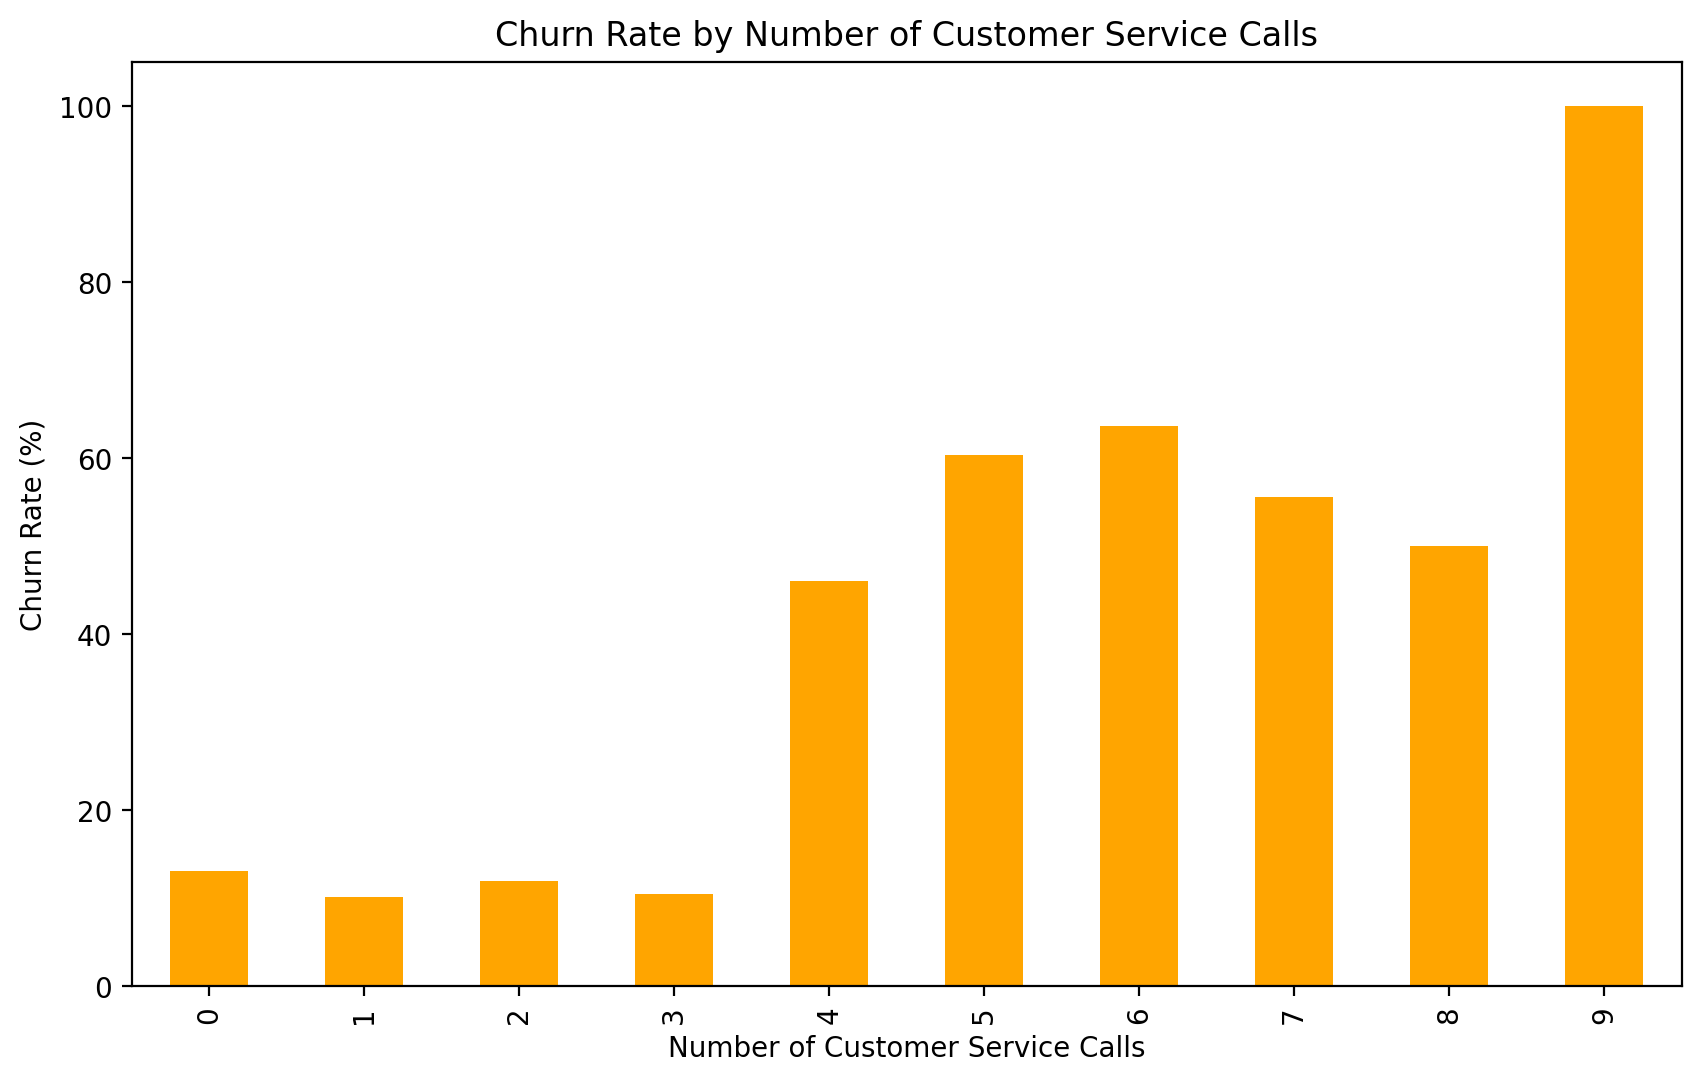

In [22]:
## Group data by number of customer service calls and calculate churn rate for each group
service_calls_churn = data.groupby('Customer service calls')['Churn'].mean() * 100

# Plot the churn rate against customer service calls
plt.figure(figsize=(10,6))
service_calls_churn.plot(kind='bar', color='orange')
plt.title('Churn Rate by Number of Customer Service Calls')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Churn Rate (%)')
plt.show()


The bar chart shows the churn rate for different numbers of customer service calls. It indicates that as the number of customer service calls increases, the churn rate also tends to rise significantly.

    Customers who made very few or no customer service calls have a relatively low churn rate.
    However, those who made multiple calls (especially more than 3) show a noticeably higher churn rate.

This suggests that frequent interaction with customer service may be associated with dissatisfaction, leading to an increased likelihood of churn.

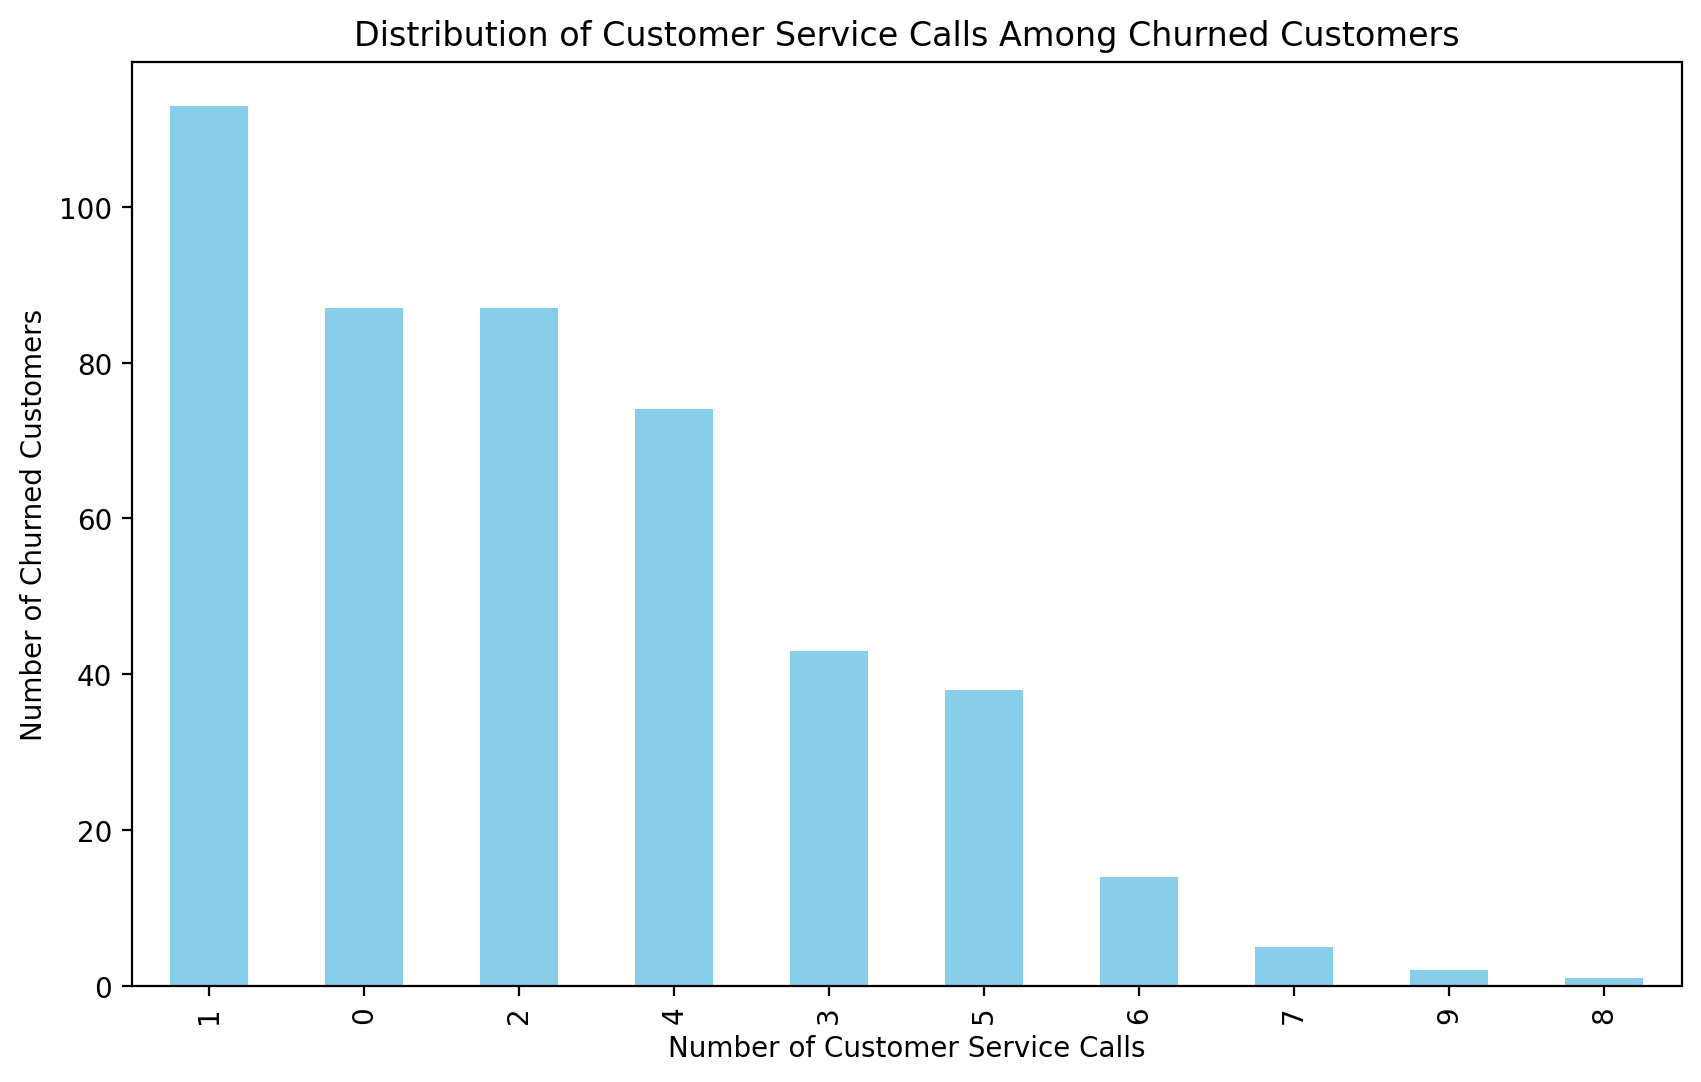

(1, 113)

In [23]:
# Filter the data to include only churned customers
churned_customers = data[data['Churn'] == True]

# Analyze the distribution of customer service calls among churned customers
churned_calls_distribution = churned_customers['Customer service calls'].value_counts()

# Plot the distribution
plt.figure(figsize=(10,6))
churned_calls_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Customer Service Calls Among Churned Customers')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Number of Churned Customers')
plt.show()

# Return the most common number of customer service calls among churned customers
churned_calls_distribution.idxmax(), churned_calls_distribution.max()


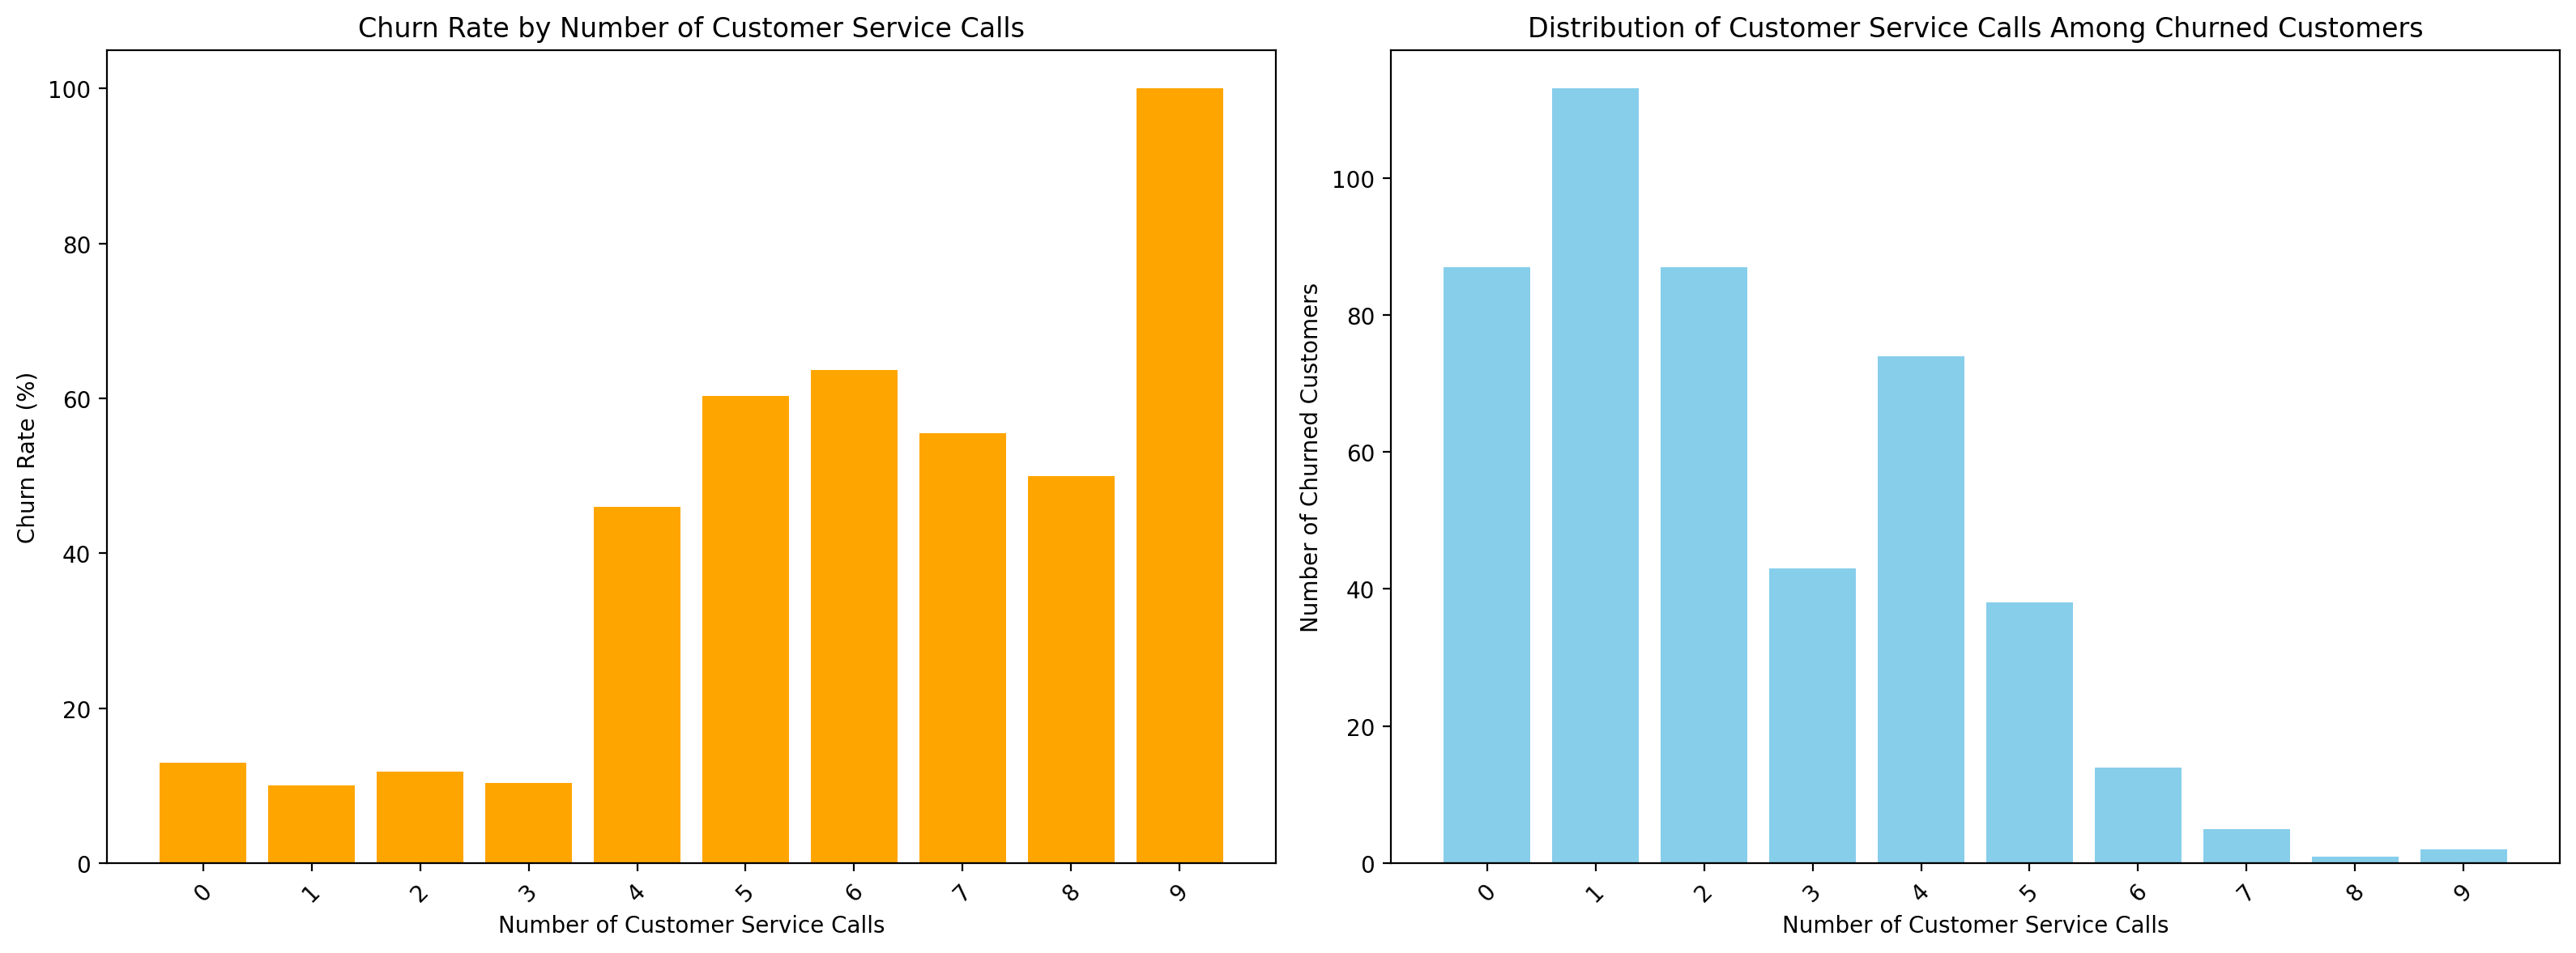

In [24]:
import matplotlib.pyplot as plt

# Group data by number of customer service calls and calculate churn rate for each group
service_calls_churn = data.groupby('Customer service calls')['Churn'].mean() * 100

# Filter the data to include only churned customers
churned_customers = data[data['Churn'] == True]

# Analyze the distribution of customer service calls among churned customers
churned_calls_distribution = churned_customers['Customer service calls'].value_counts()

# Create subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Churn rate by number of customer service calls
ax[0].bar(service_calls_churn.index, service_calls_churn, color='orange')
ax[0].set_title('Churn Rate by Number of Customer Service Calls')
ax[0].set_xlabel('Number of Customer Service Calls')
ax[0].set_ylabel('Churn Rate (%)')

# Set x-ticks for Plot 1 to ensure all values show
ax[0].set_xticks(service_calls_churn.index)
ax[0].set_xticklabels(service_calls_churn.index, rotation=45)

# Plot 2: Distribution of customer service calls among churned customers
ax[1].bar(churned_calls_distribution.index, churned_calls_distribution, color='skyblue')
ax[1].set_title('Distribution of Customer Service Calls Among Churned Customers')
ax[1].set_xlabel('Number of Customer Service Calls')
ax[1].set_ylabel('Number of Churned Customers')

# Set x-ticks for Plot 2 to ensure all values show
ax[1].set_xticks(churned_calls_distribution.index)
ax[1].set_xticklabels(churned_calls_distribution.index, rotation=45)

# Show the plots
plt.tight_layout()
plt.show()


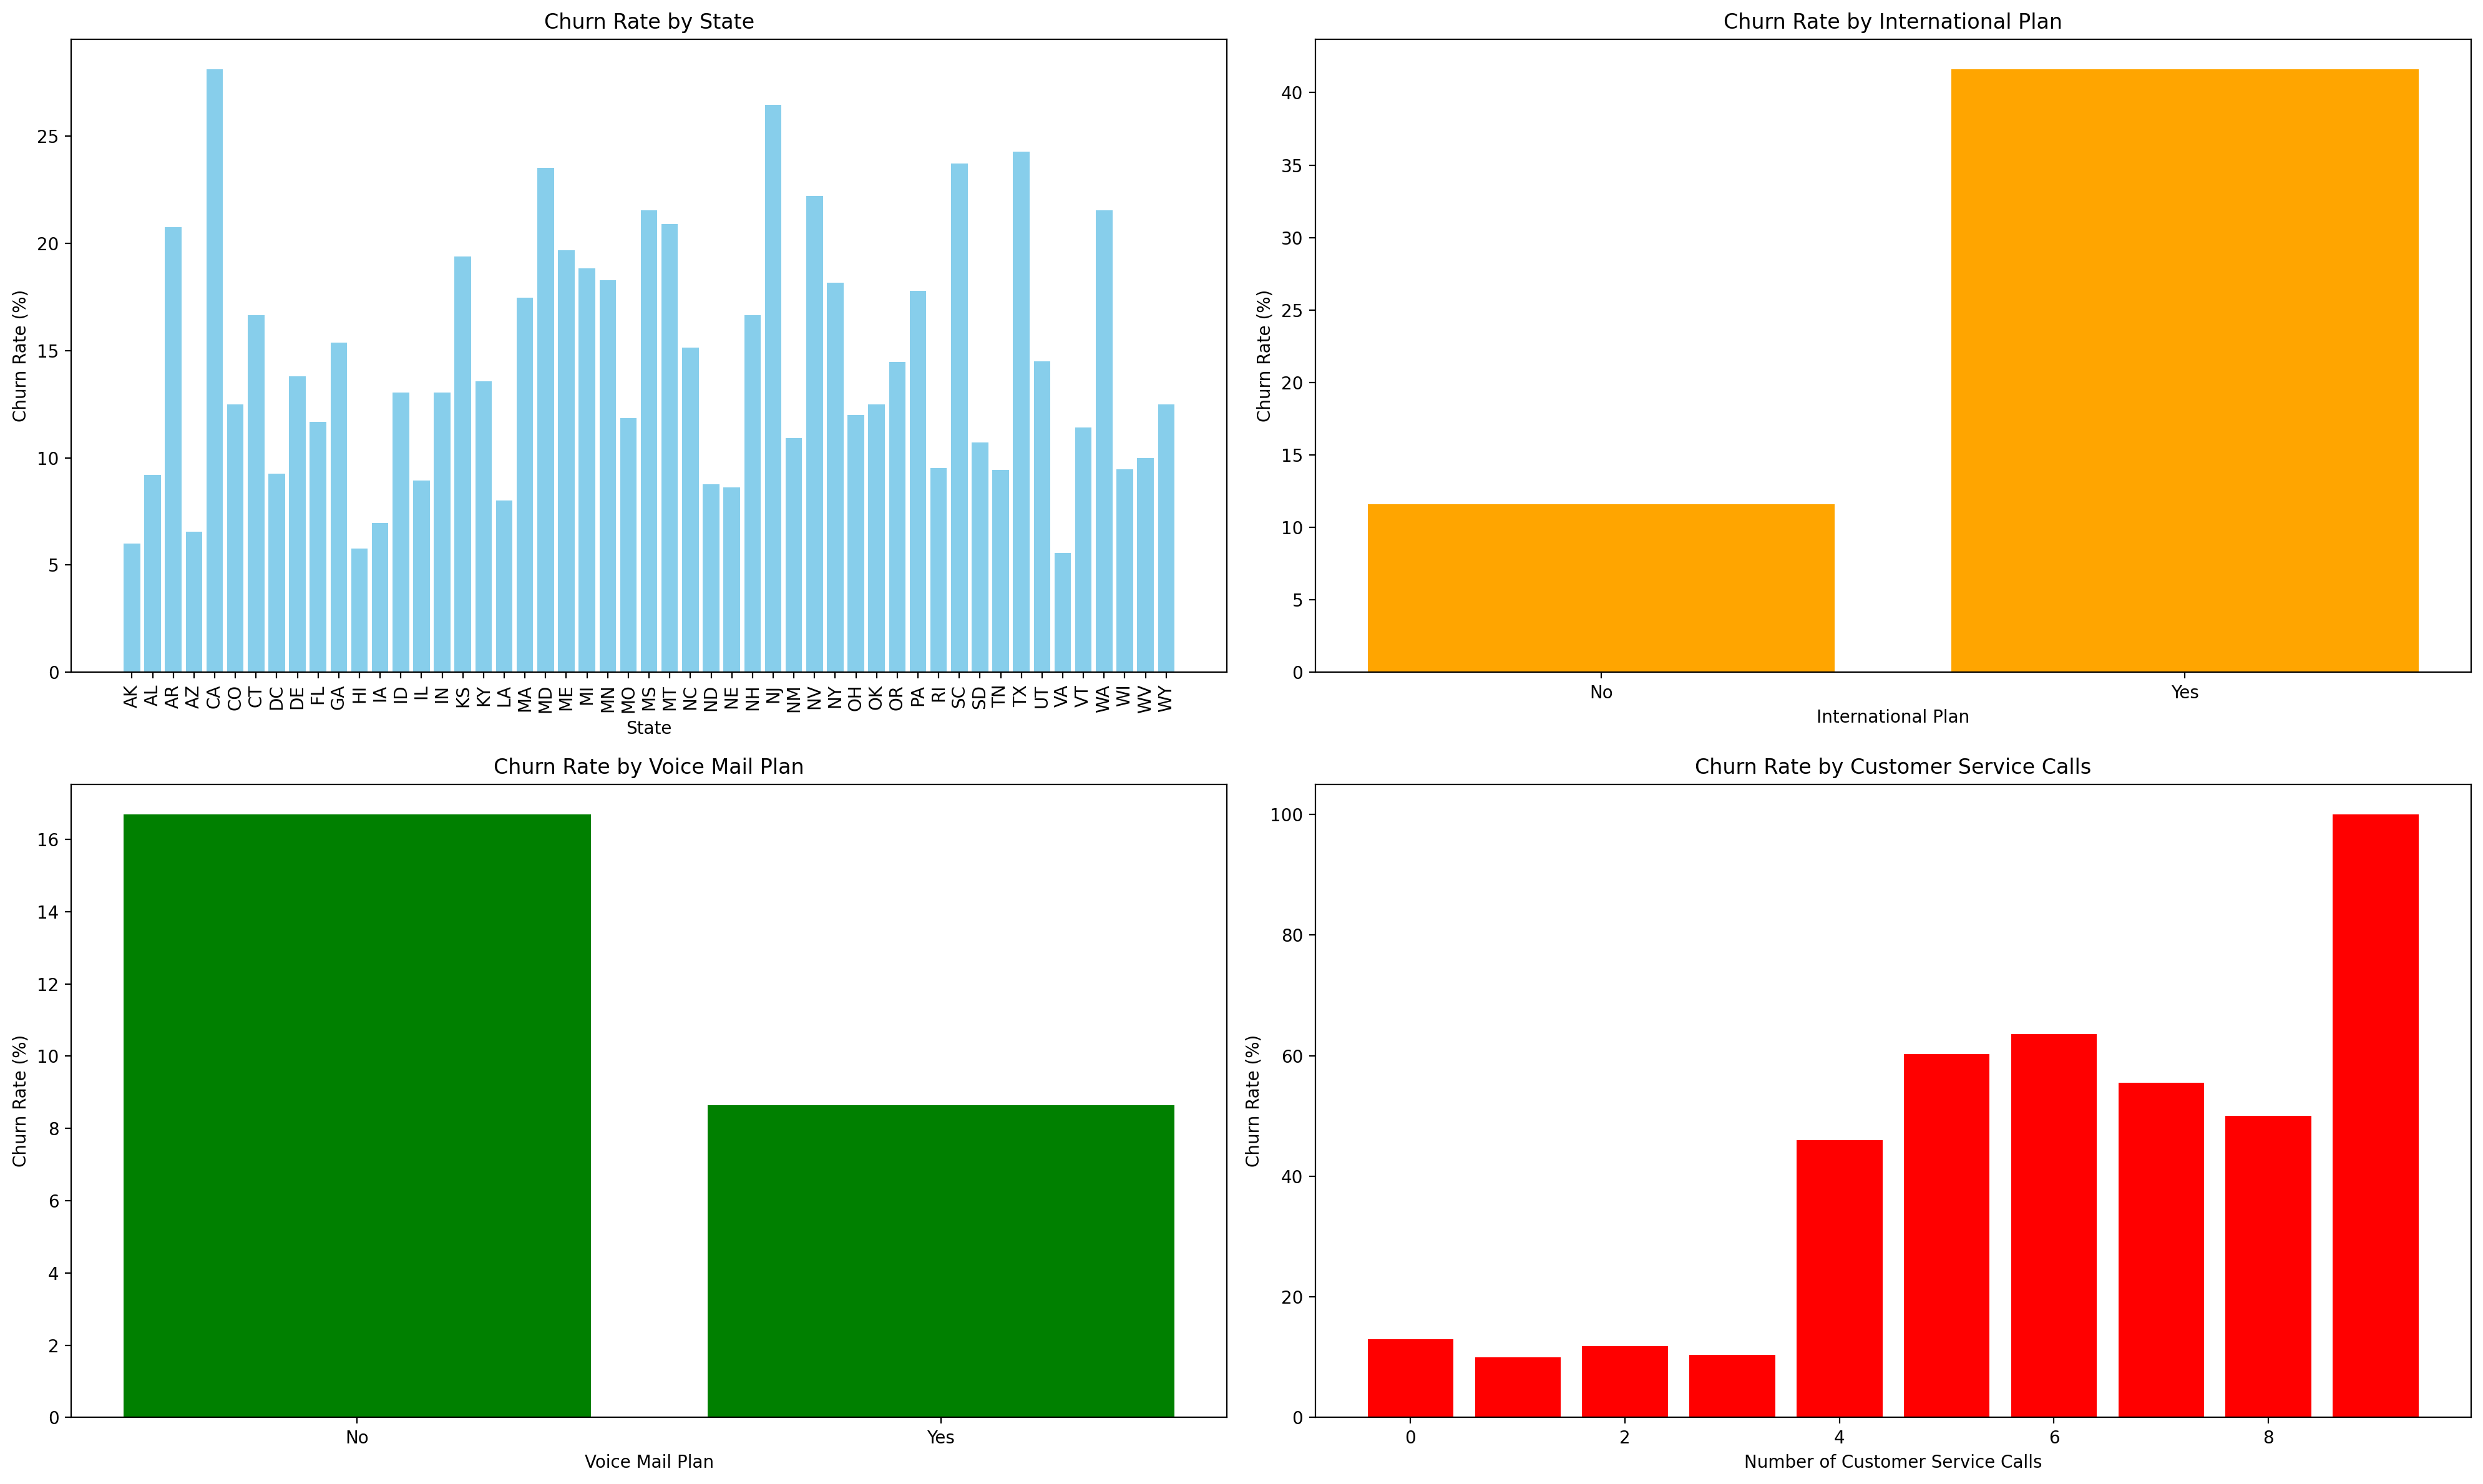

In [25]:
# Re-run the churn rate visualization across features

fig, axs = plt.subplots(2, 2, figsize=(20, 12))
# Calculate churn rate for each categorical feature and visualize

# Churn rate by State
state_churn_rate = data.groupby('State')['Churn'].mean() * 100

# Churn rate by International plan
intl_plan_churn_rate = data.groupby('International plan')['Churn'].mean() * 100

# Churn rate by Voice mail plan
vmail_plan_churn_rate = data.groupby('Voice mail plan')['Churn'].mean() * 100

# Churn rate by Customer service calls
service_calls_churn_rate = data.groupby('Customer service calls')['Churn'].mean() * 100

# Plotting churn rate across features

# # Plot churn rate by state
# axs[0, 0].bar(state_churn_rate.index, state_churn_rate, color='skyblue')
# axs[0, 0].set_title('Churn Rate by State')
# axs[0, 0].set_xlabel('State')
# axs[0, 0].set_ylabel('Churn Rate (%)')
# axs[0, 0].tick_params(axis='x', rotation=90)

# # Plot churn rate by international plan
# axs[0, 1].bar(intl_plan_churn_rate.index, intl_plan_churn_rate, color='orange')
# axs[0, 1].set_title('Churn Rate by International Plan')
# axs[0, 1].set_xlabel('International Plan')
# axs[0, 1].set_ylabel('Churn Rate (%)')

# # Plot churn rate by voice mail plan
# axs[1, 0].bar(vmail_plan_churn_rate.index, vmail_plan_churn_rate, color='green')
# axs[1, 0].set_title('Churn Rate by Voice Mail Plan')
# axs[1, 0].set_xlabel('Voice Mail Plan')
# axs[1, 0].set_ylabel('Churn Rate (%)')

# # Plot churn rate by customer service calls
# axs[1, 1].bar(service_calls_churn_rate.index, service_calls_churn_rate, color='red')
# axs[1, 1].set_title('Churn Rate by Customer Service Calls')
# axs[1, 1].set_xlabel('Number of Customer Service Calls')
# axs[1, 1].set_ylabel('Churn Rate (%)')

# plt.tight_layout()
# plt.show()

# Plot churn rate by state
axs[0, 0].bar(state_churn_rate.index, state_churn_rate, color='skyblue')
axs[0, 0].set_title('Churn Rate by State')
axs[0, 0].set_xlabel('State')
axs[0, 0].set_ylabel('Churn Rate (%)')
axs[0, 0].tick_params(axis='x', rotation=90)

# Plot churn rate by international plan
axs[0, 1].bar(intl_plan_churn_rate.index, intl_plan_churn_rate, color='orange')
axs[0, 1].set_title('Churn Rate by International Plan')
axs[0, 1].set_xlabel('International Plan')
axs[0, 1].set_ylabel('Churn Rate (%)')

# Plot churn rate by voice mail plan
axs[1, 0].bar(vmail_plan_churn_rate.index, vmail_plan_churn_rate, color='green')
axs[1, 0].set_title('Churn Rate by Voice Mail Plan')
axs[1, 0].set_xlabel('Voice Mail Plan')
axs[1, 0].set_ylabel('Churn Rate (%)')

# Plot churn rate by customer service calls
axs[1, 1].bar(service_calls_churn_rate.index, service_calls_churn_rate, color='red')
axs[1, 1].set_title('Churn Rate by Customer Service Calls')
axs[1, 1].set_xlabel('Number of Customer Service Calls')
axs[1, 1].set_ylabel('Churn Rate (%)')

plt.tight_layout()
plt.show()


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


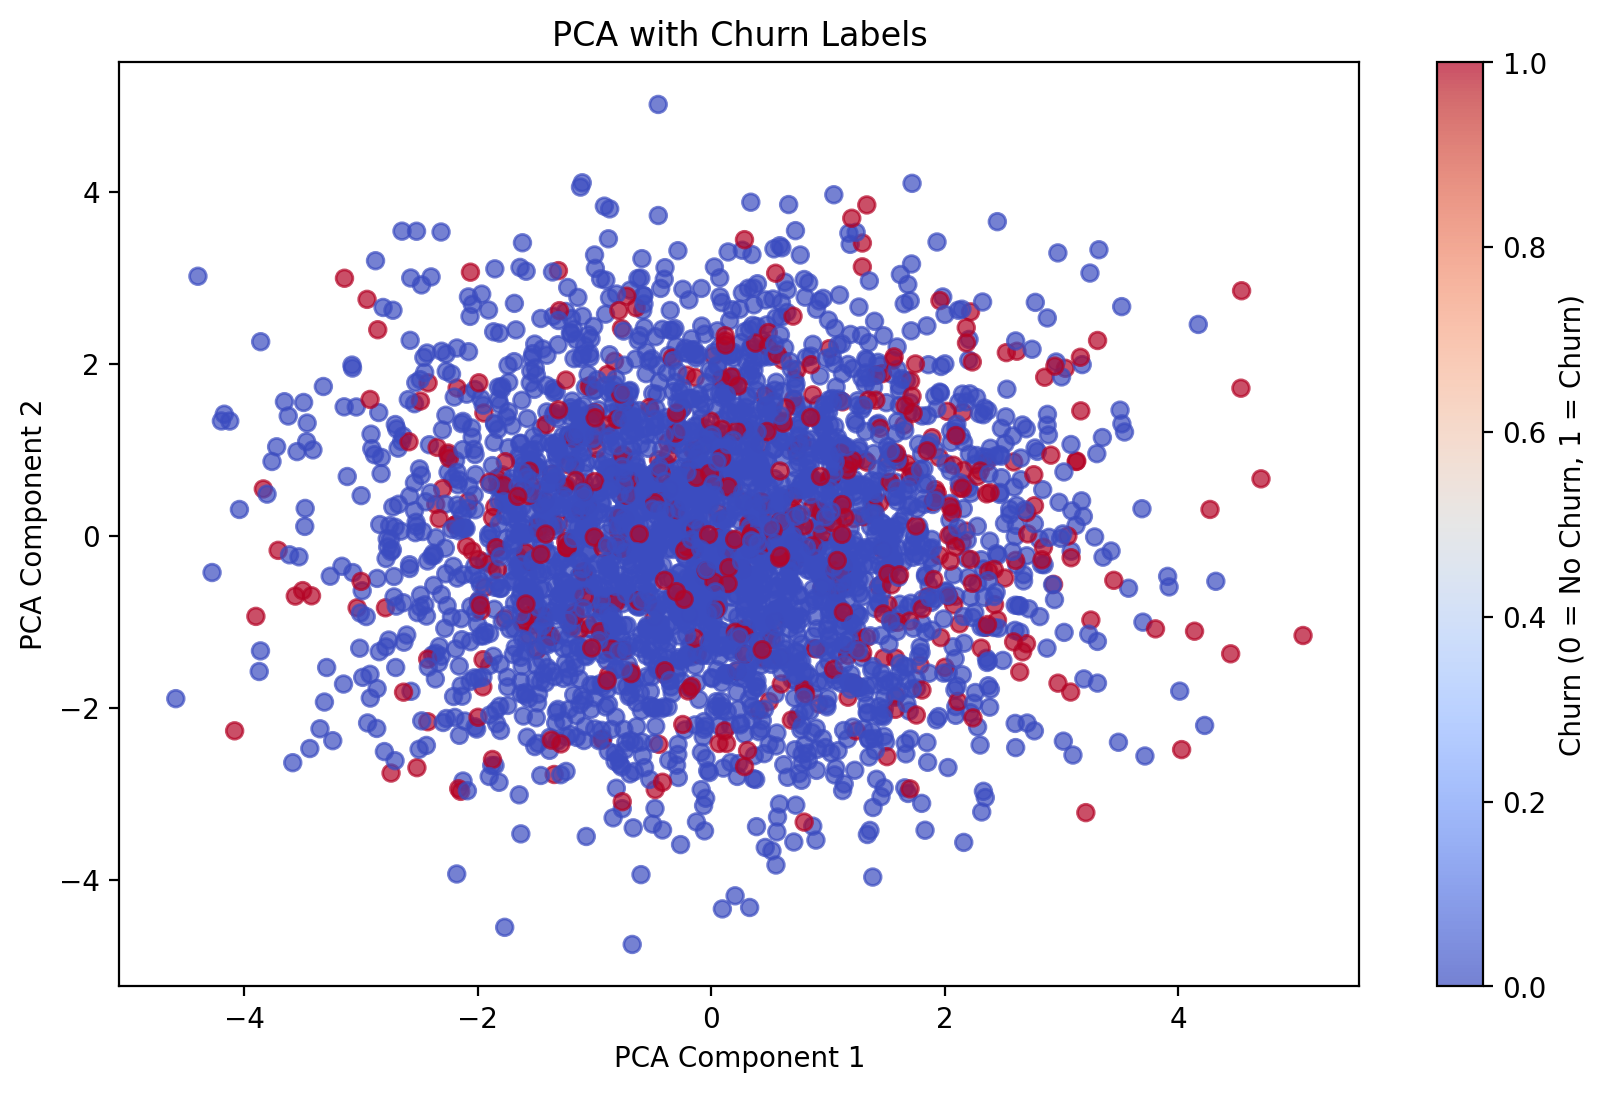

In [26]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Encode categorical features
data_encoded = data.copy()
label_encoders = {}

for col in ['State', 'International plan', 'Voice mail plan', 'Area code']:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Select all features (now encoded)
X_full = data_encoded.drop('Churn', axis=1)  # Drop churn because it's the target

# Scale the full feature set
scaler = StandardScaler()
X_scaled_full = scaler.fit_transform(X_full)

# Apply K-Means clustering
kmeans_full = KMeans(n_clusters=2, random_state=42)
clusters_full = kmeans_full.fit_predict(X_scaled_full)

# Add cluster labels to the original data
data_encoded['Cluster'] = clusters_full

# Visualize clusters using PCA (for 2D visualization)
pca_full = PCA(n_components=2)
X_pca_full = pca_full.fit_transform(X_scaled_full)

# plt.figure(figsize=(10,6))
# plt.scatter(X_pca_full[:, 0], X_pca_full[:, 1], c=clusters_full, cmap='viridis')
# plt.title('Customer Segmentation with K-Means (All Features)')
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.colorbar(label='Cluster')
# plt.show()
# Add churn labels to PCA visualization
plt.figure(figsize=(10,6))
plt.scatter(X_pca_full[:, 0], X_pca_full[:, 1], c=data_encoded['Churn'], cmap='coolwarm', alpha=0.7)
plt.title('PCA with Churn Labels')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Churn (0 = No Churn, 1 = Churn)')
plt.show()



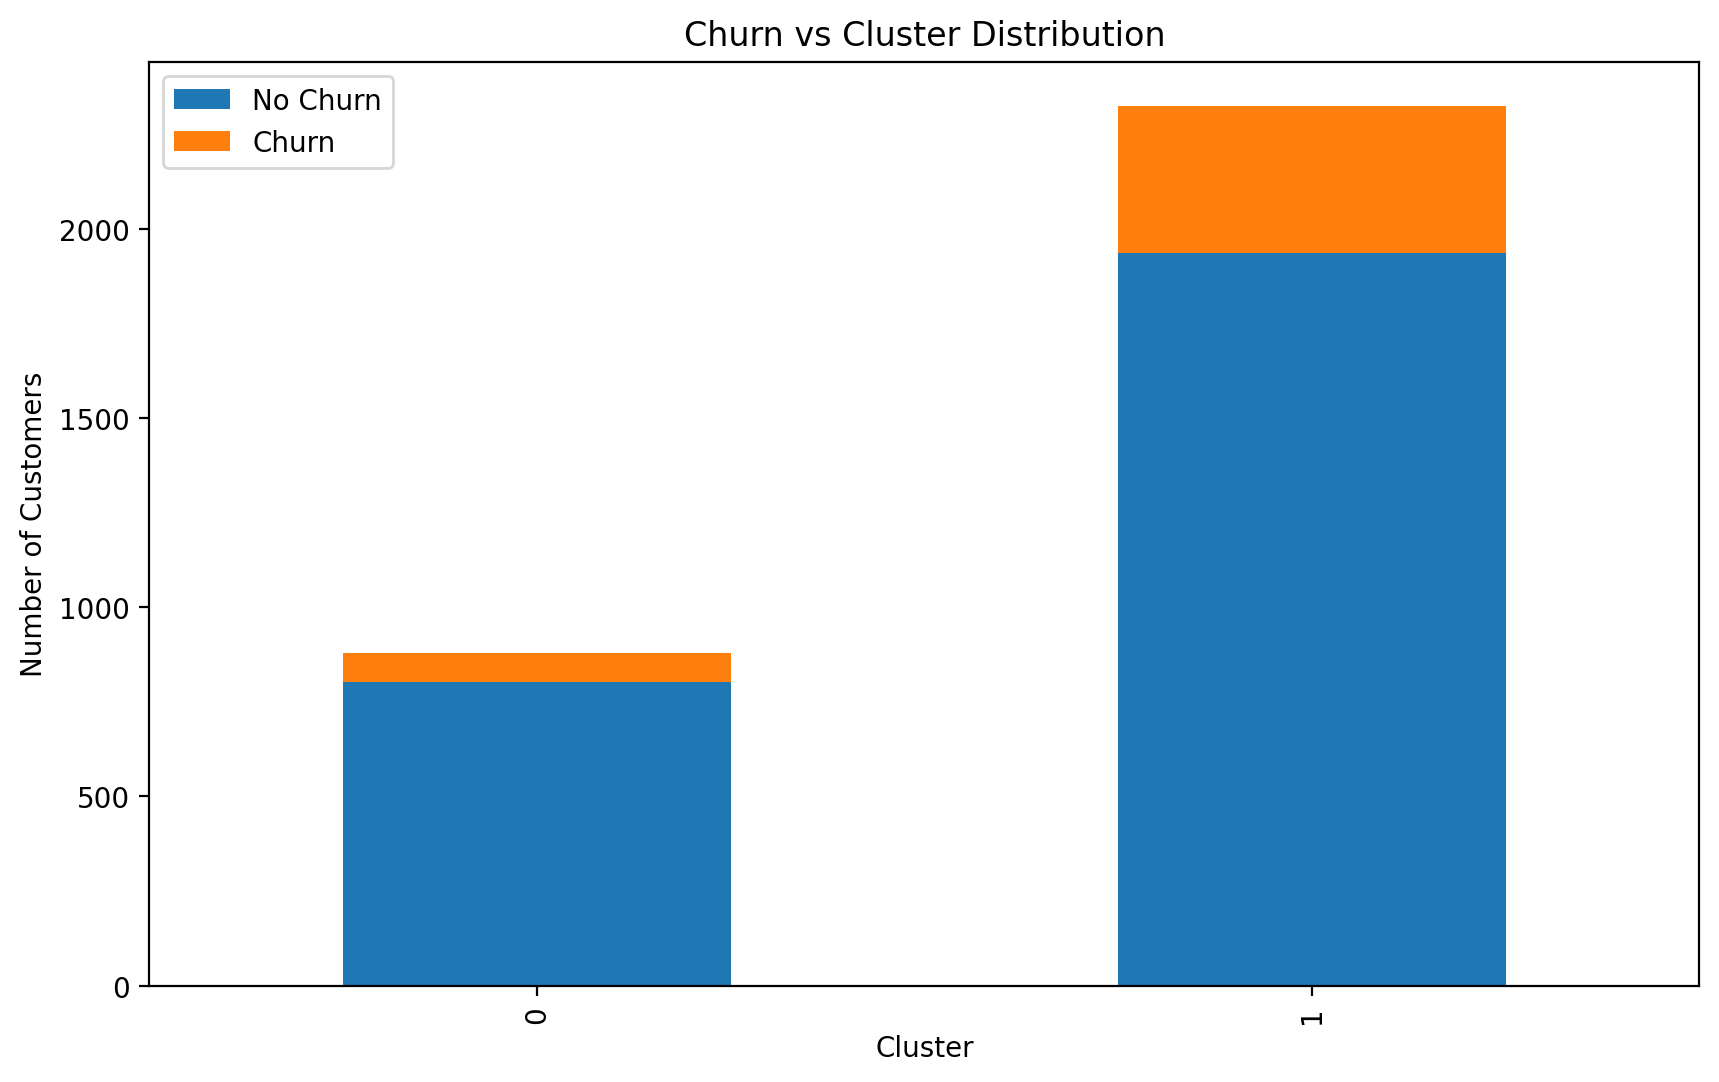

Churn    False  True 
Cluster              
0          803     76
1         1937    388

In [27]:
# Cross-tabulation to compare churn with clusters
churn_cluster_comparison = pd.crosstab(data_encoded['Cluster'], data['Churn'])

# Plot the comparison
churn_cluster_comparison.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Churn vs Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.legend(['No Churn', 'Churn'])
plt.show()
# Count the number of churned and non-churned customers in each cluster
churn_count_per_cluster = pd.crosstab(data_encoded['Cluster'], data_encoded['Churn'])

# Display the results
churn_count_per_cluster


In [28]:
data_encoded_full = data_encoded

In [29]:
# Group the data by cluster and calculate the mean of each feature
cluster_characteristics = data_encoded_full.groupby('Cluster').mean()

# Display the characteristics of each cluster
cluster_characteristics

State  Account length  Area code  International plan  \
Cluster                                                             
0        25.332196      101.416382    1.01479            0.098976   
1        26.255484      100.589677    0.99914            0.095914   

         Voice mail plan  Number vmail messages  Total day minutes  \
Cluster                                                              
0                    1.0              29.219568         179.612287   
1                    0.0               0.000000         180.207097   

         Total day calls  Total day charge  Total eve minutes  \
Cluster                                                         
0             100.222981         30.534585         202.605347   
1             100.704946         30.635755         200.535785   

         Total eve calls  Total eve charge  Total night minutes  \
Cluster                                                           
0              99.831627         17.221763           201.687486   
1             100.298495         17.045725           200.686022   

         Total night calls  Total night charge  Total intl minutes  \
Cluster                                                              
0               100.279863            9.075961           10.294198   
1                99.964301            9.030976           10.310366   

         Total intl calls  Total intl charge  Customer service calls     Churn  
Cluster                                                                         
0                4.332196           2.779989                1.526735  0.086462  
1                4.372473           2.784288                1.584086  0.166882

In [30]:
# Group the data by Churn label and calculate the mean of each feature
churn_characteristics = data_encoded_full.groupby('Churn').mean()

# Display the characteristics of churned and non-churned customers
churn_characteristics

State  Account length  Area code  International plan  \
Churn                                                             
False  25.943431      100.609854   1.002920            0.066058   
True   26.349138      102.036638   1.006466            0.278017   

       Voice mail plan  Number vmail messages  Total day minutes  \
Churn                                                              
False         0.293066               8.520803         175.561277   
True          0.163793               5.036638         206.514655   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
Churn                                                                          
False       100.410584         29.845960         199.248066       100.138686   
True        101.530172         35.107974         212.060560       100.357759   

       Total eve charge  Total night minutes  Total night calls  \
Churn                                                             
False         16.936325           200.154380          99.986496   
True          18.025237           205.722629         100.431034   

       Total night charge  Total intl minutes  Total intl calls  \
Churn                                                             
False            9.007026           10.238175          4.425182   
True             9.257629           10.706034          3.984914   

       Total intl charge  Customer service calls   Cluster  
Churn                                                       
False           2.764807                1.451825  0.706934  
True            2.891185                2.256466  0.836207

Higher customer service calls: If churned customers have more customer service calls, it may indicate dissatisfaction or frustration.
Different service plans: If churned customers are more likely to have certain plans, this could signal issues with those plans (e.g., international plan dissatisfaction).
Usage differences: Differences in usage patterns (e.g., high international usage among churned customers) could highlight a need for better pricing or plan optimization.

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


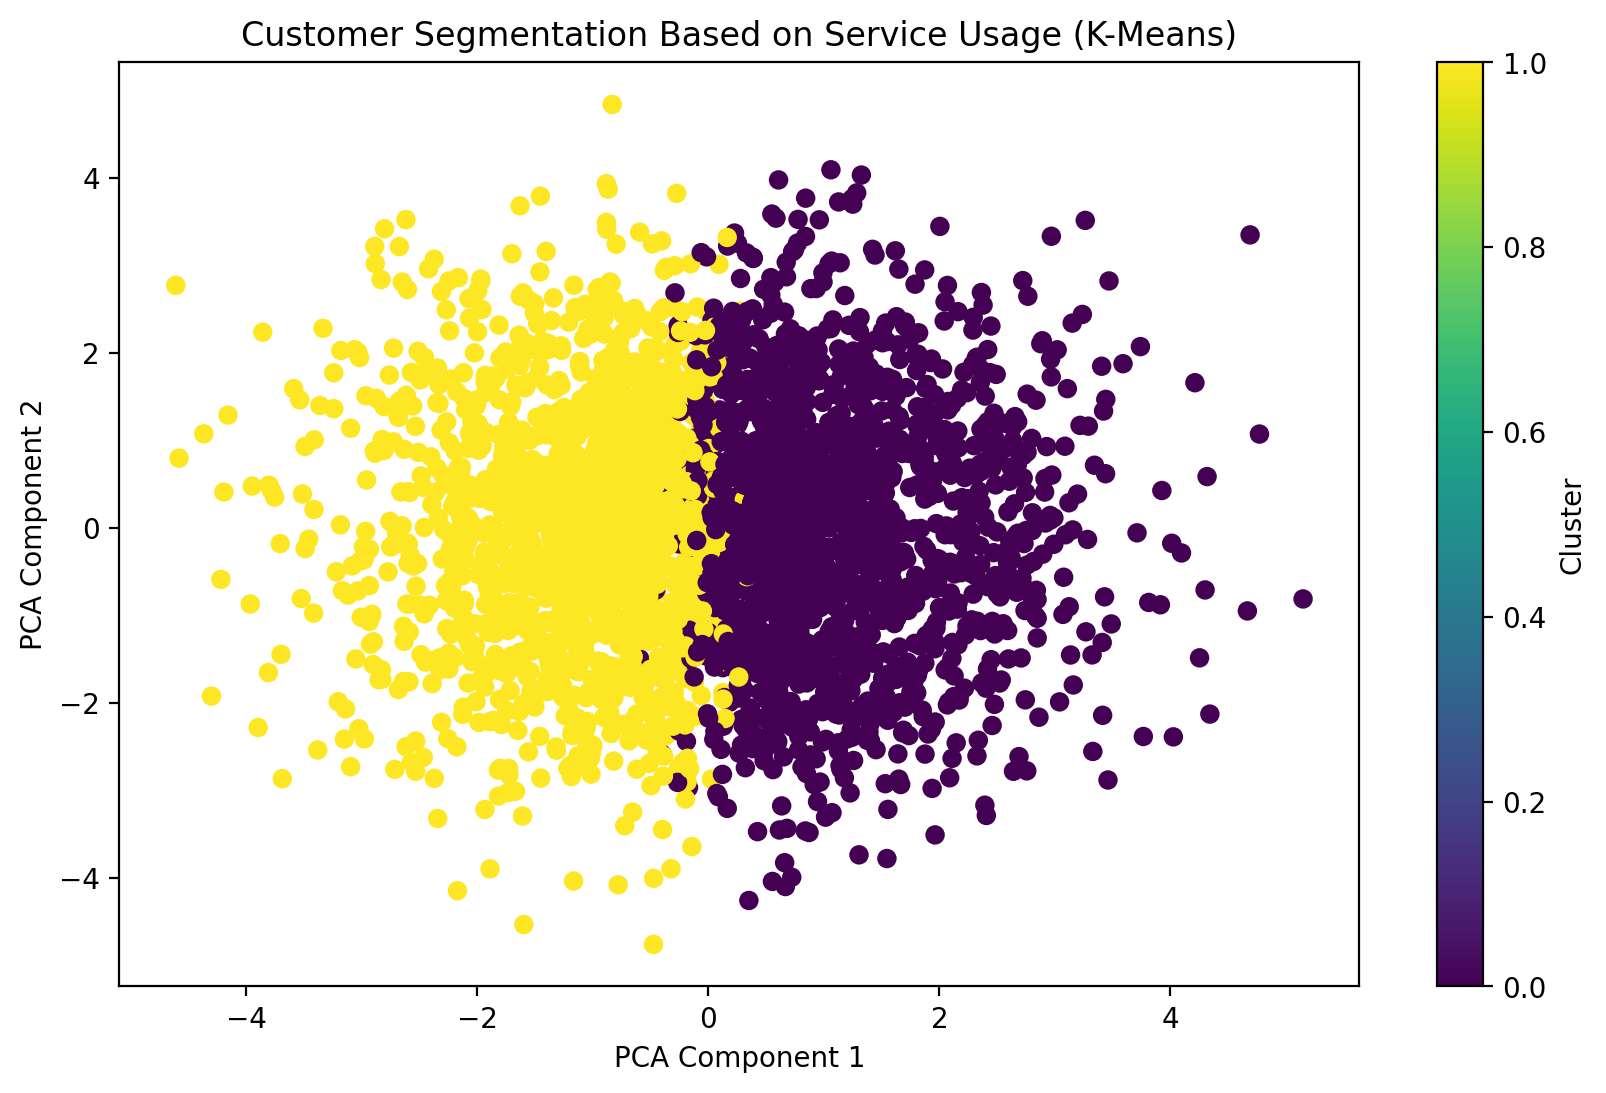

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select service usage features
usage_features = ['Total day minutes', 'Total eve minutes', 'Total night minutes', 
                  'Total intl minutes', 'Total day charge', 'Total eve charge', 
                  'Total night charge', 'Total intl charge']

# Scale the service usage features
scaler = StandardScaler()
X_scaled_usage = scaler.fit_transform(data[usage_features])

# Apply K-Means clustering
kmeans_usage = KMeans(n_clusters=2, random_state=42)
clusters_usage = kmeans_usage.fit_predict(X_scaled_usage)

# Add cluster labels to the original data
data['Usage_Cluster'] = clusters_usage

# Visualize clusters using PCA (for 2D visualization)
pca_usage = PCA(n_components=2)
X_pca_usage = pca_usage.fit_transform(X_scaled_usage)

plt.figure(figsize=(10,6))
plt.scatter(X_pca_usage[:, 0], X_pca_usage[:, 1], c=clusters_usage, cmap='viridis')
plt.title('Customer Segmentation Based on Service Usage (K-Means)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [32]:
from scipy.stats import chi2_contingency
import pandas as pd

# List of categorical features in the dataset
categorical_features = ['State', 'Area code', 'International plan', 'Voice mail plan']

# Run Chi-Square test for each categorical feature against churn
chi_square_results = {}

for feature in categorical_features:
    # Create a contingency table
    contingency_table = pd.crosstab(data[feature], data['Churn'])
    
    # Perform Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Store the results
    chi_square_results[feature] = {'Chi-Square Statistic': chi2, 'P-value': p}

# Convert the results into a DataFrame for better visualization
chi_square_df = pd.DataFrame(chi_square_results).T
chi_square_df

Chi-Square Statistic       P-value
State                          79.842403  4.636943e-03
Area code                       0.074578  9.633979e-01
International plan            201.569523  9.491466e-46
Voice mail plan                32.662854  1.096121e-08

Summary of Key Findings:

    State and Voice Mail Plan show statistically significant relationships with churn, but their effect is moderate.
    International Plan has a very strong relationship with churn, indicating customers who subscribe to this plan are much more likely to churn.
    Area Code does not have any significant impact on churn.

In [33]:
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn', 'Usage_Cluster'],
      dtype='object')

In [34]:
cols_to_drop = ["State", "Area code","Total day minutes", "Total day calls", "Total eve minutes", "Total eve minutes", "Total night calls","Total night minutes", "Total intl calls", "Total intl minutes"]
data = data.drop(columns=cols_to_drop)

In [35]:
data

Account length International plan Voice mail plan  \
0                128                 No             Yes   
1                107                 No             Yes   
2                137                 No              No   
3                 84                Yes              No   
4                 75                Yes              No   
...              ...                ...             ...   
3328             192                 No             Yes   
3329              68                 No              No   
3330              28                 No              No   
3331             184                Yes              No   
3332              74                 No             Yes   

      Number vmail messages  Total day charge  Total eve calls  \
0                        25             45.07               99   
1                        26             27.47              103   
2                         0             41.38              110   
3                         0             50.90               88   
4                         0             28.34              122   
...                     ...               ...              ...   
3328                     36             26.55              126   
3329                      0             39.29               55   
3330                      0             30.74               58   
3331                      0             36.35               84   
3332                     25             39.85               82   

      Total eve charge  Total night charge  Total intl charge  \
0                16.78               11.01               2.70   
1                16.62               11.45               3.70   
2                10.30                7.32               3.29   
3                 5.26                8.86               1.78   
4                12.61                8.41               2.73   
...                ...                 ...                ...   
3328             18.32               12.56               2.67   
3329             13.04                8.61               2.59   
3330             24.55                8.64               3.81   
3331             13.57                6.26               1.35   
3332             22.60               10.86               3.70   

      Customer service calls  Churn  Usage_Cluster  
0                          1  False              0  
1                          1  False              1  
2                          0  False              1  
3                          2  False              0  
4                          3  False              1  
...                      ...    ...            ...  
3328                       2  False              0  
3329                       3  False              0  
3330                       2  False              1  
3331                       2  False              0  
3332                       0  False              0  

[3204 rows x 12 columns]

In [36]:
# Encode object type with binary values
data['International plan'] = data['International plan'].map({'No': 0, 'Yes': 1})
data['Voice mail plan'] = data['Voice mail plan'].map({'No': 0, 'Yes': 1})
data['Churn'] = data['Churn'].map({False: 0, True: 1})

In [37]:
data = data.drop(columns="Usage_Cluster")

In [38]:
data = data.drop(columns="Total eve calls")

In [39]:
data.columns

Index(['Account length', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day charge', 'Total eve charge',
       'Total night charge', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [40]:
data.to_csv("orange_telecom_churn.csv")

In [41]:
data.shape

(3204, 10)

#  Data

In [42]:
import pandas as pd
import numpy as np
import math as math
import random
from sklearn.utils import shuffle
import sklearn.preprocessing  as prepro
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
from xgboost import XGBClassifier
# from adjustText import adjust_text


#constants
random_state = 42
plotColor = ['b','g','r','m','c', 'y']
markers = ['+','o','*','^','v','>','<']

#set up
sns.set(style='whitegrid')
%matplotlib inline

## Original data

In [43]:
X = data.drop(columns="Churn")
y = data["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("----------------------------")
print("Original features shape, ", X.shape)
print("Original target shape, ", y.shape)
print("x train shape, ", X_train.shape)
print("y train shape, ", y_train.shape)
print("x test shape, ", X_test.shape)
print("y test shape, ", y_test.shape)
print("----------------------------")

----------------------------
Original features shape,  (3204, 9)
Original target shape,  (3204,)
x train shape,  (2563, 9)
y train shape,  (2563,)
x test shape,  (641, 9)
y test shape,  (641,)
----------------------------


## Upsampling data

In [44]:
smote = SMOTE(random_state=42)
X_train_upsampled , y_train_upsampled = smote.fit_resample(X_train,y_train)
print("----------------------------")
print("Original x train shape, ", X_train.shape)
print("Resample x train shape, ", X_train_upsampled.shape)
print("----------------------------")

----------------------------
Original x train shape,  (2563, 9)
Resample x train shape,  (4390, 9)
----------------------------


## Downsampling data

In [45]:
from imblearn.under_sampling import RandomUnderSampler

# Define the undersampler
rus = RandomUnderSampler(random_state=random_state)

# Fit and resample the training data
x_train_downsampled, y_train_downsampled = rus.fit_resample(X_train, y_train)

# Print shapes to compare
print("----------------------------")
print("Original x_train shape: ", X_train.shape)
print("Downsampled x_train shape: ", x_train_downsampled.shape)
print("----------------------------")


----------------------------
Original x_train shape:  (2563, 9)
Downsampled x_train shape:  (736, 9)
----------------------------


# Build model

## Tuning

In [46]:
def Parameter_tunning(x, y, models, clsModelsNm, parameters, score):
    
    tuned_params = {}
    for i,model in enumerate(models):
        print(clsModelsNm[i])
        grid = GridSearchCV(estimator = model 
                            , cv = 5
                            , param_grid = parameters[clsModelsNm[i]]
                            , scoring = score
                            , n_jobs = 1)
        grid.fit(x,y)
        print(grid.best_score_)
        print(grid.best_params_)
        tuned_params[clsModelsNm[i]] = {'params':grid.best_params_}
    
    return tuned_params

In [47]:
import yaml

with open('../../configs/train_config.yaml', 'r') as file:
    model_params = yaml.safe_load(file)

scoreMatrix = ['accuracy','precision','recall','f1','neg_log_loss']

### Original Data

In [48]:
og_clsLR = LogisticRegression(random_state=random_state)
og_clsRF = RandomForestClassifier(random_state=random_state)
og_clsXGB = XGBClassifier(random_state=random_state)
og_clsDT = DecisionTreeClassifier(random_state=random_state)
clsModelsNm = ["Random Forest", "Decision Tree", "Logistic Regression", "XGBoost"]
og_clsModels = [og_clsRF, og_clsDT, og_clsLR, og_clsXGB]
clsParams = model_params
tuned_params = Parameter_tunning(X_train, y_train, og_clsModels, clsModelsNm, clsParams, 'neg_log_loss')

Random Forest


-0.21977023554452108
{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 7, 'n_estimators': 400}
Decision Tree
-0.4094425836985048
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10}
Logistic Regression


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

-0.3275133280867423
{'C': 10, 'max_iter': 200, 'solver': 'lbfgs'}
XGBoost
-0.19487799322213456
{'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 400, 'reg_alpha': 0.1, 'reg_lambda': 1}


In [59]:
# Prepare model information for original.yaml in the specified format
original_model_info = {
    "models": [
        {
            "name": "Random Forest",
            "hyperparameters": {
                "criterion": "entropy",
                "max_depth": 8,
                "min_samples_leaf": 7,
                "n_estimators": 400
            },
            "negative_log_loss": -0.21977023554452108
        },
        {
            "name": "Decision Tree",
            "hyperparameters": {
                "criterion": "gini",
                "max_depth": 6,
                "min_samples_leaf": 10
            },
            "negative_log_loss": -0.4094425836985048
        },
        {
            "name": "Logistic Regression",
            "hyperparameters": {
                "C": 10,
                "max_iter": 200,
                "solver": "lbfgs"
            },
            "negative_log_loss": -0.3275133280867423
        },
        {
            "name": "XGBoost",
            "hyperparameters": {
                "gamma": 0.3,
                "learning_rate": 0.1,
                "max_depth": 7,
                "n_estimators": 400,
                "reg_alpha": 0.1,
                "reg_lambda": 1
            },
            "negative_log_loss": -0.19487799322213456
        }
    ]
}

# Write to original.yaml file
original_output_path = '../../model_artifact/training/orange/original.yaml'
with open(original_output_path, 'w') as file:
    yaml.dump(original_model_info, file, default_flow_style=False)

print(f"Model information has been written to {original_output_path}")

Model information has been written to ../../model_artifact/training/orange/original.yaml


### Upsamling

In [50]:
os_clsLR = LogisticRegression(random_state=random_state)
os_clsRF = RandomForestClassifier(random_state=random_state)
os_clsXGB = XGBClassifier(random_state=random_state)
os_clsDT = DecisionTreeClassifier(random_state=random_state)
clsModelsNm = ["Random Forest", "Decision Tree", "Logistic Regression", "XGBoost"]
os_clsModels = [os_clsRF, os_clsDT, os_clsLR, os_clsXGB]
clsParams = model_params
os_tuned_params = Parameter_tunning(X_train_upsampled, y_train_upsampled, os_clsModels, clsModelsNm, clsParams, 'neg_log_loss')

# Write to a YAML file
model_info = {"models": [os_tuned_params]}
output_path = '../../model_artifact/training/orange/oversampling.yaml'
with open(output_path, 'w') as file:
    yaml.dump(model_info, file, default_flow_style=False)

print(f"Model information has been written to {output_path}")

Random Forest
-0.39641570389978187
{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 7, 'n_estimators': 400}
Decision Tree
-0.5881149087760205
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 7}
Logistic Regression


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

-0.5886442214014942
{'C': 1, 'max_iter': 100, 'solver': 'newton-cg'}
XGBoost
-0.2282463619810195
{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 400, 'reg_alpha': 0.1, 'reg_lambda': 1}
Model information has been written to ../../model_artifact/training/orange/oversampling.yaml


In [51]:
os_tuned_params

{'Random Forest': {'params': {'criterion': 'gini',
   'max_depth': 8,
   'min_samples_leaf': 7,
   'n_estimators': 400}},
 'Decision Tree': {'params': {'criterion': 'gini',
   'max_depth': 6,
   'min_samples_leaf': 7}},
 'Logistic Regression': {'params': {'C': 1,
   'max_iter': 100,
   'solver': 'newton-cg'}},
 'XGBoost': {'params': {'gamma': 0,
   'learning_rate': 0.1,
   'max_depth': 9,
   'n_estimators': 400,
   'reg_alpha': 0.1,
   'reg_lambda': 1}}}

In [60]:
# Prepare model information in the specified format
os_model_info = {
    "models": [
        {
            "name": "Random Forest",
            "hyperparameters": {
                "criterion": "gini",
                "max_depth": 8,
                "min_samples_leaf": 7,
                "n_estimators": 400
            },
            "negative_log_loss": -0.39641570389978187

        },
        {
            "name": "Decision Tree",
            "hyperparameters": {
                "criterion": "gini",
                "max_depth": 6,
                "min_samples_leaf": 10
            },
            "negative_log_loss": -0.5881149087760205
        },
        {
            "name": "Logistic Regression",
            "hyperparameters": {
                "C": 1,
                "max_iter": 100,
                "solver": "newton-cg"
            },
            "negative_log_loss": -0.5886442214014942
        },
        {
            "name": "XGBoost",
            "hyperparameters": {
                "gamma": 0.2,
                "learning_rate": 0.1,
                "max_depth": 9,
                "n_estimators": 500,
                "reg_alpha": 0,
                "reg_lambda": 1
            },
            "negative_log_loss": -0.2282463619810195
        }
    ]
}

# Write to a YAML file
output_path = '../../model_artifact/training/orange/oversampling.yaml'
with open(output_path, 'w') as file:
    yaml.dump(os_model_info, file, default_flow_style=False)

print(f"Model information has been written to {output_path}")

Model information has been written to ../../model_artifact/training/orange/oversampling.yaml


### Downsampling

In [53]:
us_clsLR = LogisticRegression(random_state=random_state)
us_clsRF = RandomForestClassifier(random_state=random_state)
us_clsXGB = XGBClassifier(random_state=random_state)
us_clsDT = DecisionTreeClassifier(random_state=random_state)
clsModelsNm = ["Random Forest", "Decision Tree", "Logistic Regression", "XGBoost"]
us_clsModels = [us_clsRF, us_clsDT, us_clsLR, us_clsXGB]
clsParams = model_params
us_tuned_params = Parameter_tunning(x_train_downsampled, y_train_downsampled, us_clsModels, clsModelsNm, clsParams, 'neg_log_loss')
# Write to a YAML file
model_info = {"models": [us_tuned_params]}
output_path = '../../model_artifact/training/orange/undersampling.yaml'
with open(output_path, 'w') as file:
    yaml.dump(model_info, file, default_flow_style=False)

print(f"Model information has been written to {output_path}")

Random Forest
-0.39645607602272703
{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 7, 'n_estimators': 500}
Decision Tree
-1.2862452189034435
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10}
Logistic Regression


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

-0.517082137595262
{'C': 1, 'max_iter': 100, 'solver': 'newton-cg'}
XGBoost
-0.4169477402174605
{'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 400, 'reg_alpha': 0.1, 'reg_lambda': 1}
Model information has been written to ../../model_artifact/training/orange/undersampling.yaml


In [61]:
# Prepare model information for undersampling.yaml in the specified format
undersampling_model_info = {
    "models": [
        {
            "name": "Random Forest",
            "hyperparameters": {
                "criterion": "entropy",
                "max_depth": 8,
                "min_samples_leaf": 7,
                "n_estimators": 500
            },
            "negative_log_loss": -0.39645607602272703

        },
        {
            "name": "Decision Tree",
            "hyperparameters": {
                "criterion": "gini",
                "max_depth": 6,
                "min_samples_leaf": 10
            },
            "negative_log_loss": -1.2862452189034435

        },
        {
            "name": "Logistic Regression",
            "hyperparameters": {
                "C": 1,
                "max_iter": 100,
                "solver": "newton-cg"
            },
            "negative_log_loss":-0.517082137595262

        },
        {
            "name": "XGBoost",
            "hyperparameters": {
                "gamma": 0.3,
                "learning_rate": 0.1,
                "max_depth": 7,
                "n_estimators": 400,
                "reg_alpha": 0.1,
                "reg_lambda": 1
            },
            "negative_log_loss": -0.4169477402174605

        }
    ]
}

# Write to undersampling.yaml file
undersampling_output_path = '../../model_artifact/training/orange/undersampling.yaml'
with open(undersampling_output_path, 'w') as file:
    yaml.dump(undersampling_model_info, file, default_flow_style=False)

print(f"Model information has been written to {undersampling_output_path}")

Model information has been written to ../../model_artifact/training/orange/undersampling.yaml


## Visualizing

In [62]:
# Graph of precision & recall against threshold
def plot_precision_recall_vs_thresold(precisions, recalls, thresholds):
    plt.plot(thresholds,precisions[:-1],label="Precision")
    plt.plot(thresholds,recalls[:-1],label="Recall")
    plt.plot(thresholds,2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1]+recalls[:-1]) ,label="F1")
    plt.title("Precision, recall & F1 vs thresold")
    plt.xlabel("Thresold")
    plt.legend(loc='lower right')
    plt.show()

In [63]:
def Cross_validation_score(clsModels, clsModelsNm, clsSample, scoreMatrix):
    """ Cross validation using cross_val_score method """
    for i,model in enumerate(clsModels):
        print("===============================================")
        print(clsModelsNm[i])

        for j, sample in enumerate(clsSample):
            print("************************************************")
            print(sample[2])
            
            for score in scoreMatrix:
                scores = cross_val_score(model, sample[0], sample[1], cv=5 , scoring = score)
                print(score, " score:", scores.mean())
                
            y_scores = cross_val_predict(model, sample[0], sample[1], cv=5, method="predict_proba") 
            
            
            precisions, recalls, thresholds = metrics.precision_recall_curve(sample[1], y_scores[:][:,1]) 
            plot_precision_recall_vs_thresold(precisions, recalls, thresholds)
            score_matrix = pd.DataFrame({'Precisions': precisions[:-1]
                                ,'Recalls': recalls[:-1]
                                ,'F1': 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1]+recalls[:-1])
                                ,'Threshold': thresholds
                               })
            #print("When percision and recall are same \n" , score_matrix[ score_matrix['Precisions'] == score_matrix['Recalls']] )
            print("When F1 score is max \n" , score_matrix[ score_matrix['F1'] == max(score_matrix['F1'])])

### Original Data

In [64]:
with open('../../model_artifact/training/orange/original.yaml', 'r') as file:
    config = yaml.safe_load(file)

# Get the list of models
models = config["models"]
models

[{'hyperparameters': {'criterion': 'entropy',
   'max_depth': 8,
   'min_samples_leaf': 7,
   'n_estimators': 400},
  'name': 'Random Forest',
  'negative_log_loss': -0.21977023554452108},
 {'hyperparameters': {'criterion': 'gini',
   'max_depth': 6,
   'min_samples_leaf': 10},
  'name': 'Decision Tree',
  'negative_log_loss': -0.4094425836985048},
 {'hyperparameters': {'C': 10, 'max_iter': 200, 'solver': 'lbfgs'},
  'name': 'Logistic Regression',
  'negative_log_loss': -0.3275133280867423},
 {'hyperparameters': {'gamma': 0.3,
   'learning_rate': 0.1,
   'max_depth': 7,
   'n_estimators': 400,
   'reg_alpha': 0.1,
   'reg_lambda': 1},
  'name': 'XGBoost',
  'negative_log_loss': -0.19487799322213456}]

Random Forest Parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 7, 'n_estimators': 400}
Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10}
Logistic Regression Parameters: {'C': 10, 'max_iter': 200, 'solver': 'lbfgs'}
XGBoost Parameters: {'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 400, 'reg_alpha': 0.1, 'reg_lambda': 1}
Random Forest
************************************************
Original data
accuracy  score: 0.9352293494152046
precision  score: 0.9397850678733033
recall  score: 0.6085894113291374
f1  score: 0.7341785773419368
neg_log_loss  score: -0.2214352218711245


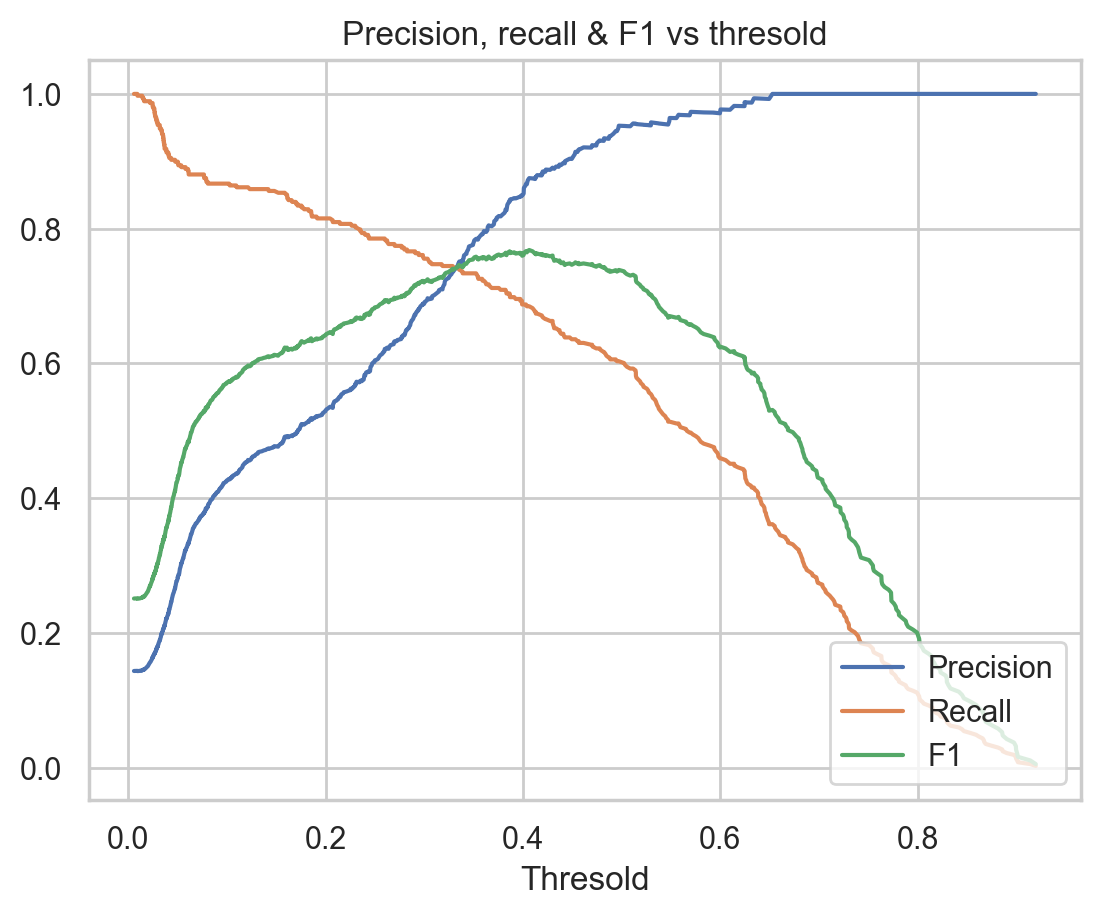

When F1 score is max 
       Precisions   Recalls        F1  Threshold
2275       0.875  0.684783  0.768293   0.406336
Decision Tree
************************************************
Original data
accuracy  score: 0.9227430555555556
precision  score: 0.8038697408482787
recall  score: 0.6168085894113291
f1  score: 0.69713521323443
neg_log_loss  score: -0.4096301370071558


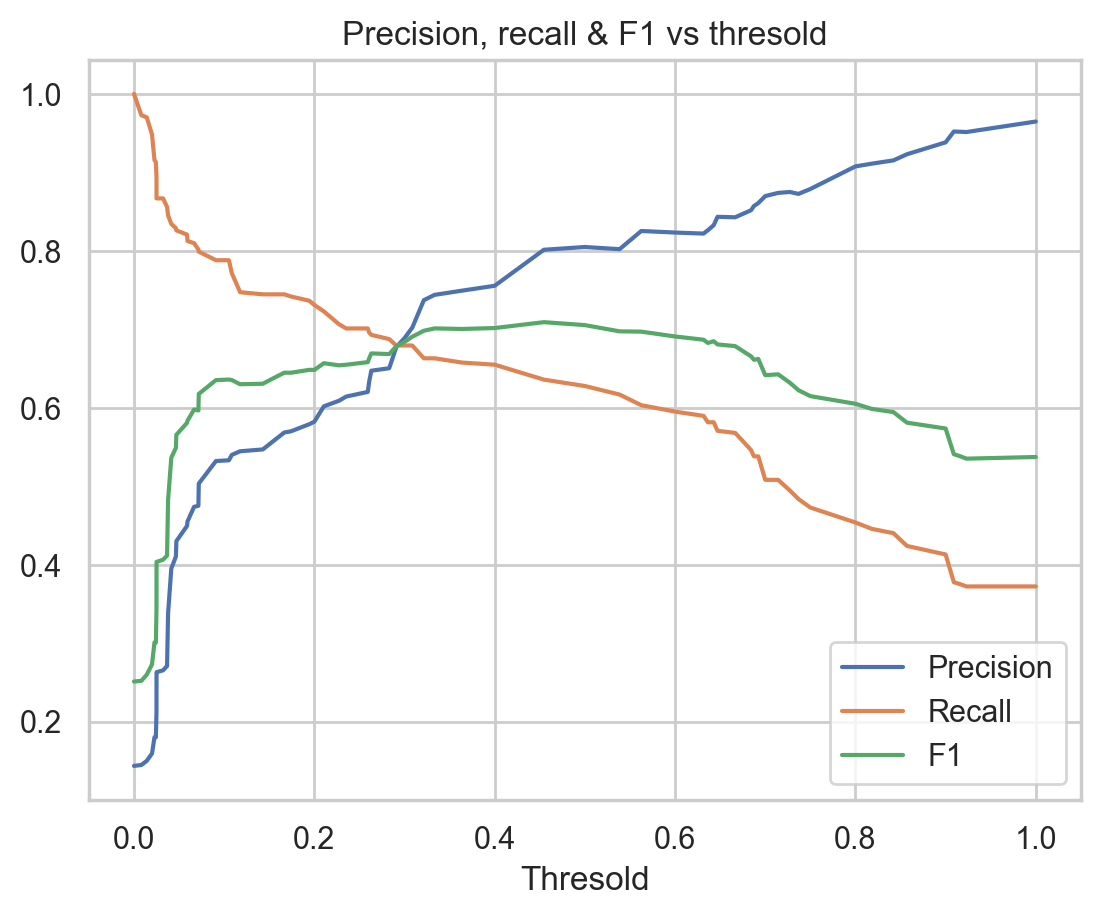

When F1 score is max 
     Precisions  Recalls        F1  Threshold
43     0.80137  0.63587  0.709091   0.454545
Logistic Regression
************************************************
Original data


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy  score: 0.8634419164230019


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


precision  score: 0.5711325611325611


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


recall  score: 0.20107367641614218


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


f1  score: 0.2939114052081414


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


neg_log_loss  score: -0.3275133280867423


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


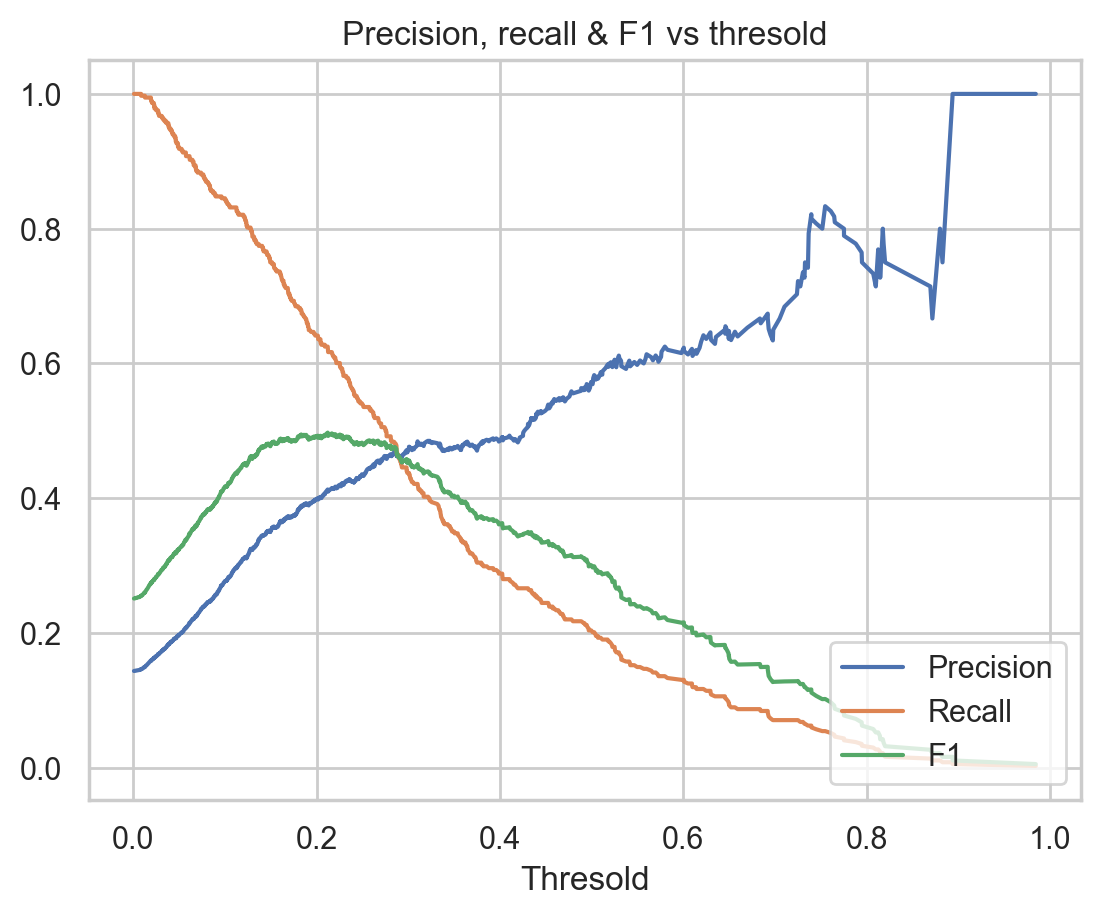

When F1 score is max 
       Precisions  Recalls        F1  Threshold
2006    0.412926    0.625  0.497297   0.212118
XGBoost
************************************************
Original data
accuracy  score: 0.9438154848927874
precision  score: 0.8954162648666024
recall  score: 0.6901888189559423
f1  score: 0.7781605806094973
neg_log_loss  score: -0.19487799322213456


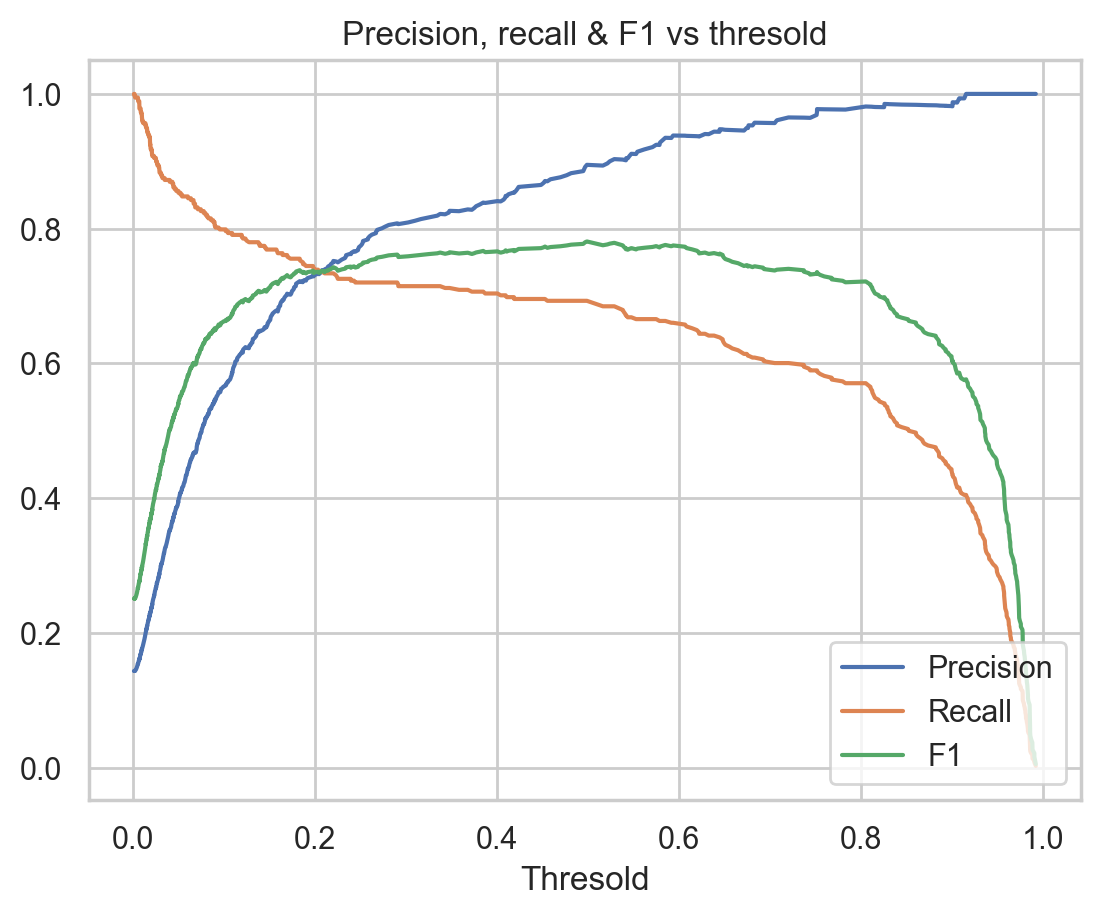

When F1 score is max 
       Precisions   Recalls        F1  Threshold
2278    0.894737  0.692935  0.781011   0.498975


In [65]:
import yaml

# Load the YAML file
with open('../../model_artifact/training/orange/original.yaml', 'r') as file:
    config = yaml.safe_load(file)

# Get the list of models
models = config["models"]

# Extract hyperparameters for each model
og_random_forest_params = next(model['hyperparameters'] for model in models if model['name'] == 'Random Forest')
og_decision_tree_params = next(model['hyperparameters'] for model in models if model['name'] == 'Decision Tree')
og_logistic_regression_params = next(model['hyperparameters'] for model in models if model['name'] == 'Logistic Regression')
og_xgboost_params = next(model['hyperparameters'] for model in models if model['name'] == 'XGBoost')

# Print the hyperparameters for each model
print("Random Forest Parameters:", og_random_forest_params)
print("Decision Tree Parameters:", og_decision_tree_params)
print("Logistic Regression Parameters:", og_logistic_regression_params)
print("XGBoost Parameters:", og_xgboost_params)

# Build model and evaluate
og_clsDT = DecisionTreeClassifier(**og_decision_tree_params)
og_clsLR = LogisticRegression(**og_logistic_regression_params)
og_clsXGB = XGBClassifier(**og_xgboost_params)
og_clsRF = RandomForestClassifier(**og_random_forest_params)

og_clsModels = [og_clsRF, og_clsDT, og_clsLR, og_clsXGB]
Cross_validation_score(og_clsModels, clsModelsNm, [(X_train, y_train,'Original data')], scoreMatrix)

### Upsampling data

Random Forest Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 7, 'n_estimators': 400}
Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10}
Logistic Regression Parameters: {'C': 1, 'max_iter': 100, 'solver': 'newton-cg'}
XGBoost Parameters: {'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 1}
Random Forest
************************************************
Upsamping data
accuracy  score: 0.823234624145786
precision  score: 0.9147090028003773
recall  score: 0.7129840546697038
f1  score: 0.8027510067471428
neg_log_loss  score: -0.39611969674355924


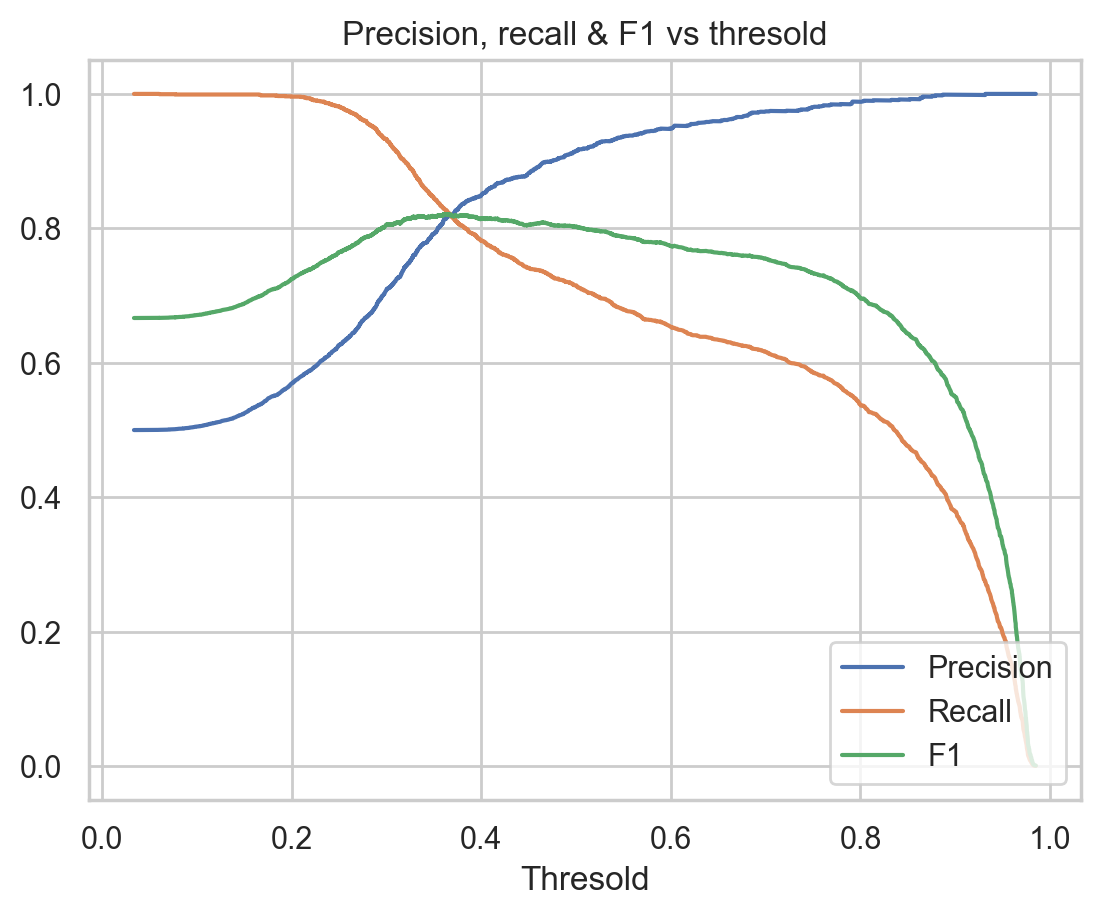

When F1 score is max 
       Precisions   Recalls      F1  Threshold
2152     0.81359  0.829157  0.8213   0.360756
Decision Tree
************************************************
Upsamping data
accuracy  score: 0.8013667425968108
precision  score: 0.8898827427640305
recall  score: 0.6892938496583143
f1  score: 0.7760454496554409
neg_log_loss  score: -0.6082492864372981


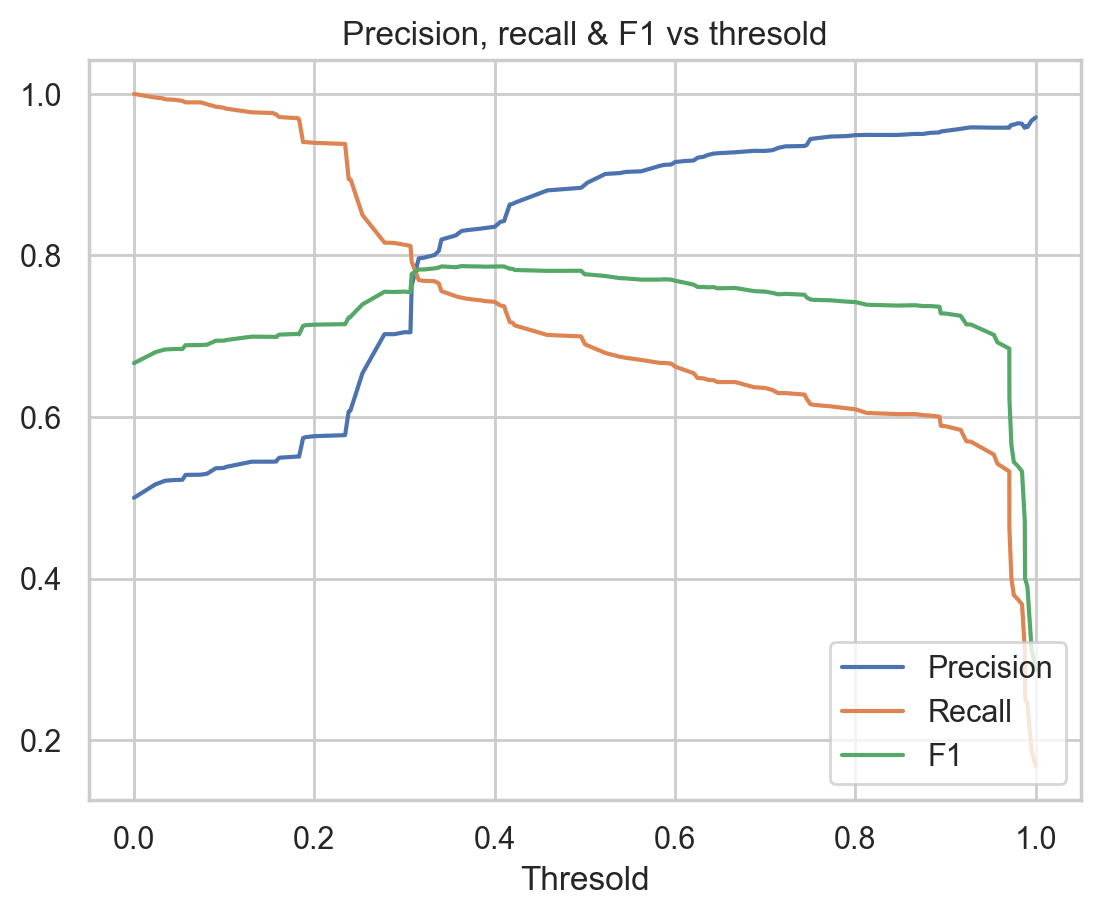

When F1 score is max 
     Precisions   Recalls        F1  Threshold
41    0.830466  0.747608  0.786862   0.363636
Logistic Regression
************************************************
Upsamping data
accuracy  score: 0.6977220956719817
precision  score: 0.694644563197438
recall  score: 0.7061503416856493
f1  score: 0.7001659537218466
neg_log_loss  score: -0.5886442214014942


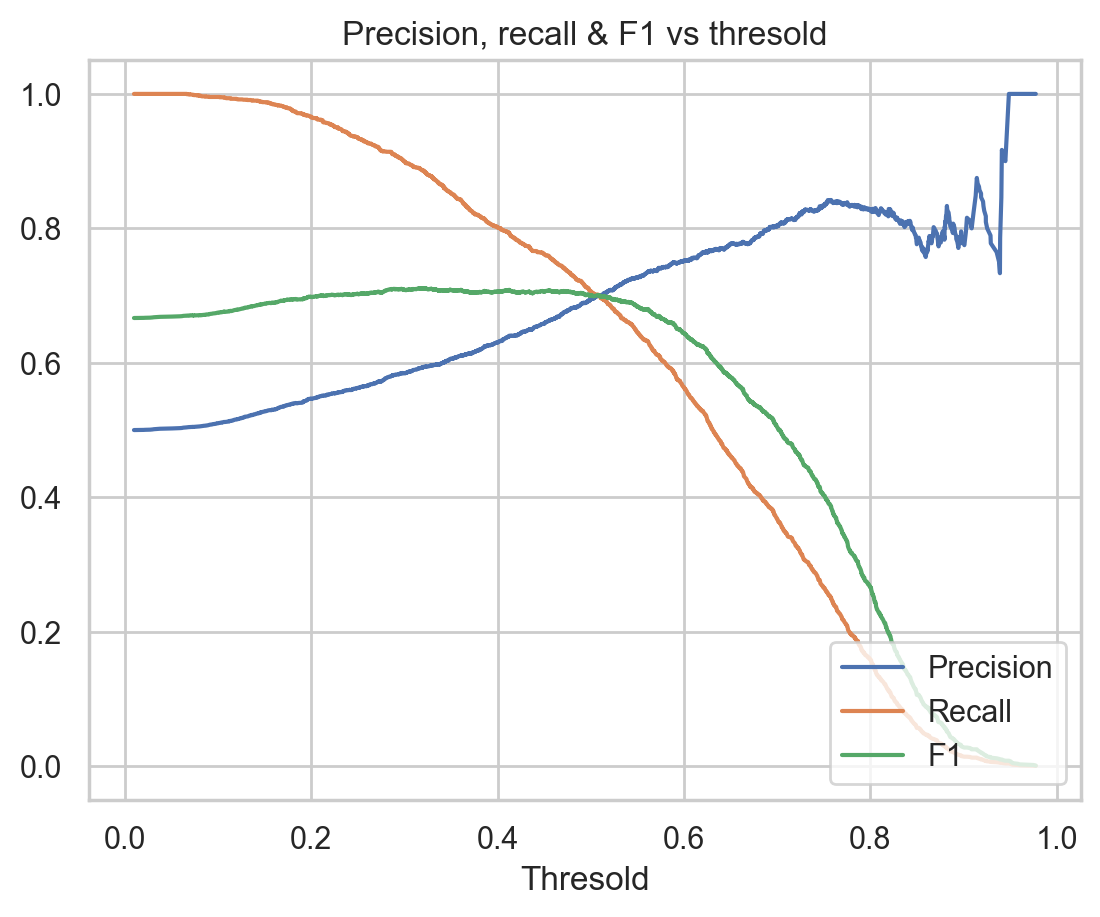

When F1 score is max 
       Precisions   Recalls        F1  Threshold
1118    0.594132  0.885649  0.711176   0.321083
XGBoost
************************************************
Upsamping data
accuracy  score: 0.8940774487471526
precision  score: 0.9127689234474383
recall  score: 0.8715261958997722
f1  score: 0.8915986871574766
neg_log_loss  score: -0.24847840316720374


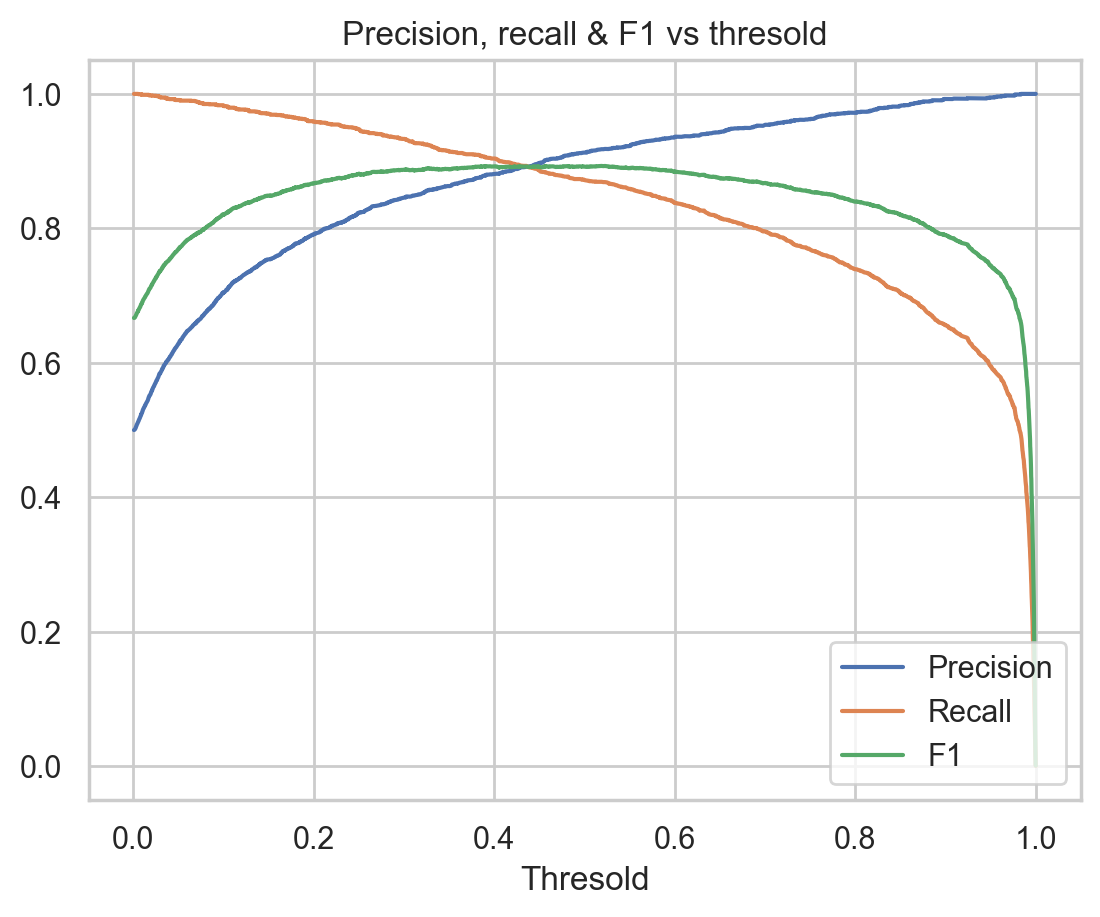

When F1 score is max 
       Precisions   Recalls       F1  Threshold
2308    0.917749  0.869248  0.89284   0.518781


In [66]:
import yaml

# Load the YAML file
with open('../../model_artifact/training/orange/oversampling.yaml', 'r') as file:
    config = yaml.safe_load(file)

# Get the list of models
models = config["models"]

# Extract hyperparameters for each model
os_random_forest_params = next(model['hyperparameters'] for model in models if model['name'] == 'Random Forest')
os_decision_tree_params = next(model['hyperparameters'] for model in models if model['name'] == 'Decision Tree')
os_logistic_regression_params = next(model['hyperparameters'] for model in models if model['name'] == 'Logistic Regression')
os_xgboost_params = next(model['hyperparameters'] for model in models if model['name'] == 'XGBoost')

# Print the hyperparameters for each model
print("Random Forest Parameters:", os_random_forest_params)
print("Decision Tree Parameters:", os_decision_tree_params)
print("Logistic Regression Parameters:", os_logistic_regression_params)
print("XGBoost Parameters:", os_xgboost_params)

# Build model and evaluate
os_clsDT = DecisionTreeClassifier(**os_decision_tree_params)
os_clsLR = LogisticRegression(**os_logistic_regression_params)
os_clsXGB = XGBClassifier(**os_xgboost_params)
os_clsRF = RandomForestClassifier(**os_random_forest_params)

os_clsModels = [os_clsRF, os_clsDT, os_clsLR, os_clsXGB]
Cross_validation_score(os_clsModels, clsModelsNm, [(X_train_upsampled, y_train_upsampled,'Upsamping data')], scoreMatrix)

### Downsampling data

Random Forest Parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 7, 'n_estimators': 500}
Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10}
Logistic Regression Parameters: {'C': 1, 'max_iter': 100, 'solver': 'newton-cg'}
XGBoost Parameters: {'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 400, 'reg_alpha': 0.1, 'reg_lambda': 1}
Random Forest
************************************************
Undersampling data
accuracy  score: 0.8396856039713183
precision  score: 0.8449196009389672
recall  score: 0.8341725286930766
f1  score: 0.8412881174738143
neg_log_loss  score: -0.39664686807586474


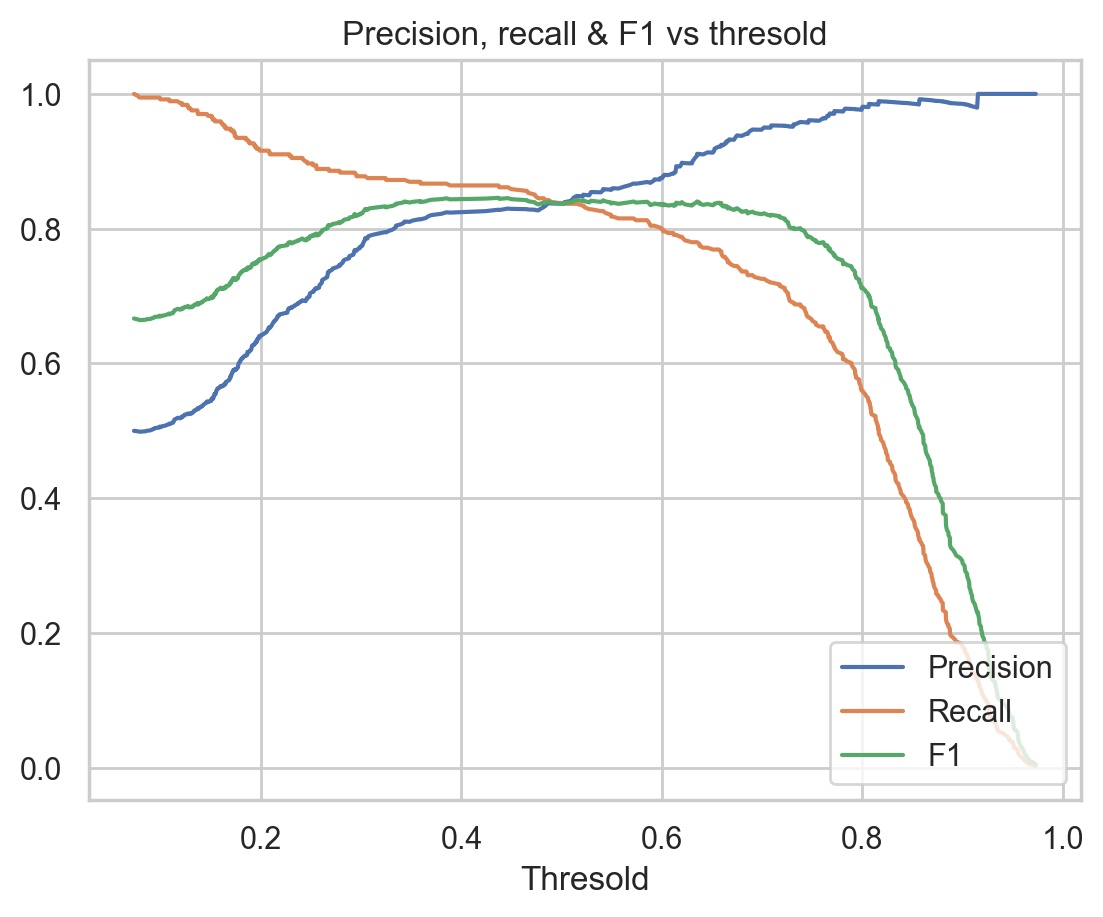

When F1 score is max 
      Precisions  Recalls        F1  Threshold
352    0.828125  0.86413  0.845745   0.436961
Decision Tree
************************************************
Undersampling data
accuracy  score: 0.8056811913954771
precision  score: 0.8594795851939734
recall  score: 0.7418363569048501
f1  score: 0.7924124464190071
neg_log_loss  score: -1.2810893275868402


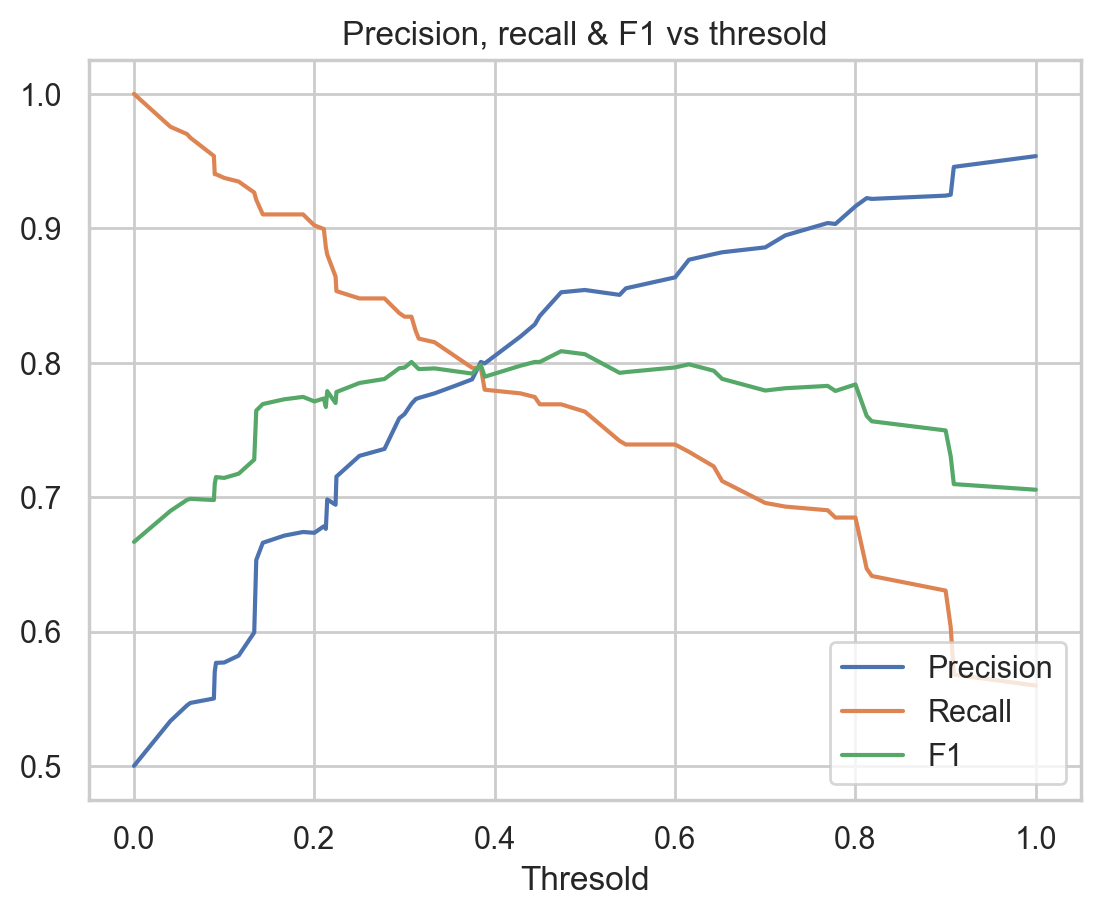

When F1 score is max 
     Precisions   Recalls        F1  Threshold
35     0.85241  0.769022  0.808571   0.473684
Logistic Regression
************************************************
Undersampling data
accuracy  score: 0.7745081816510389
precision  score: 0.7770413383864427
recall  score: 0.7744168826360608
f1  score: 0.7747394900223378
neg_log_loss  score: -0.517082137595262


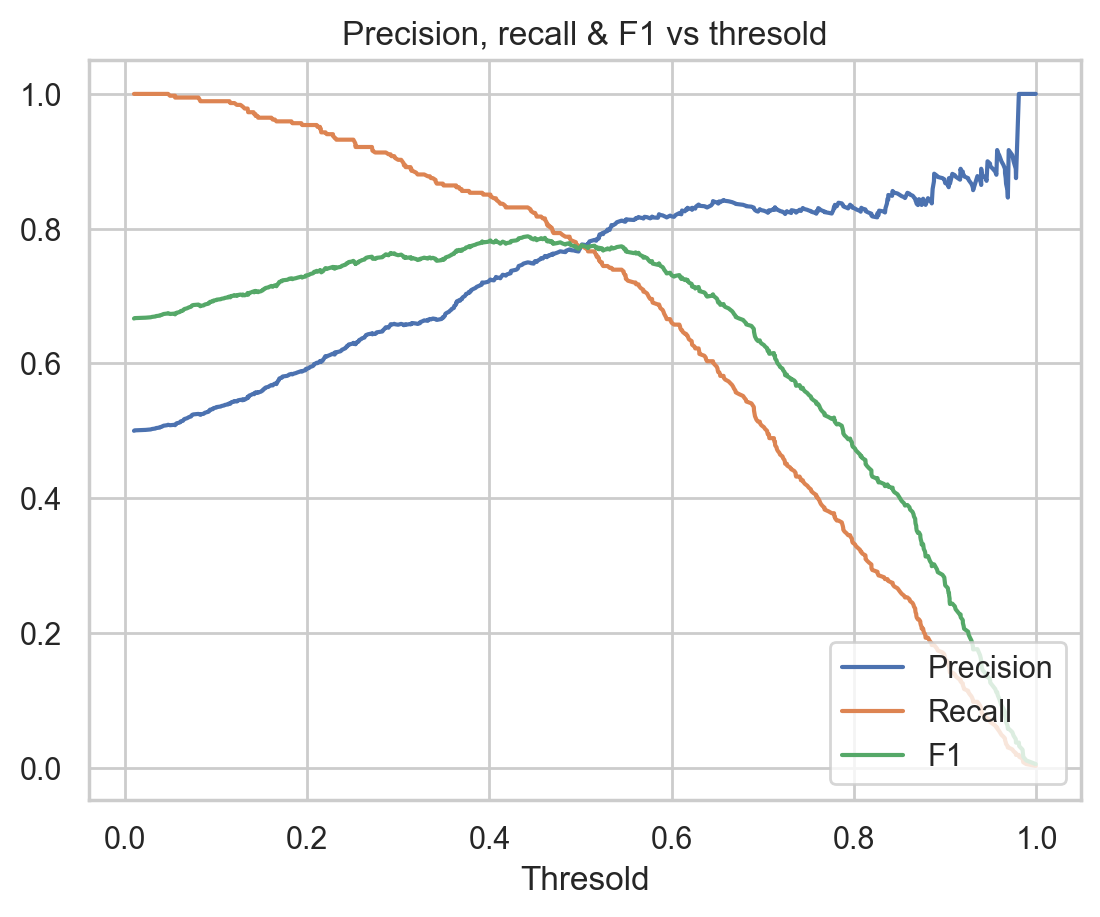

When F1 score is max 
      Precisions   Recalls       F1  Threshold
328        0.75  0.831522  0.78866   0.442047
XGBoost
************************************************
Undersampling data
accuracy  score: 0.8450818165103879
precision  score: 0.8728231382999507
recall  score: 0.809700111069974
f1  score: 0.838692255772739
neg_log_loss  score: -0.4169477402174605


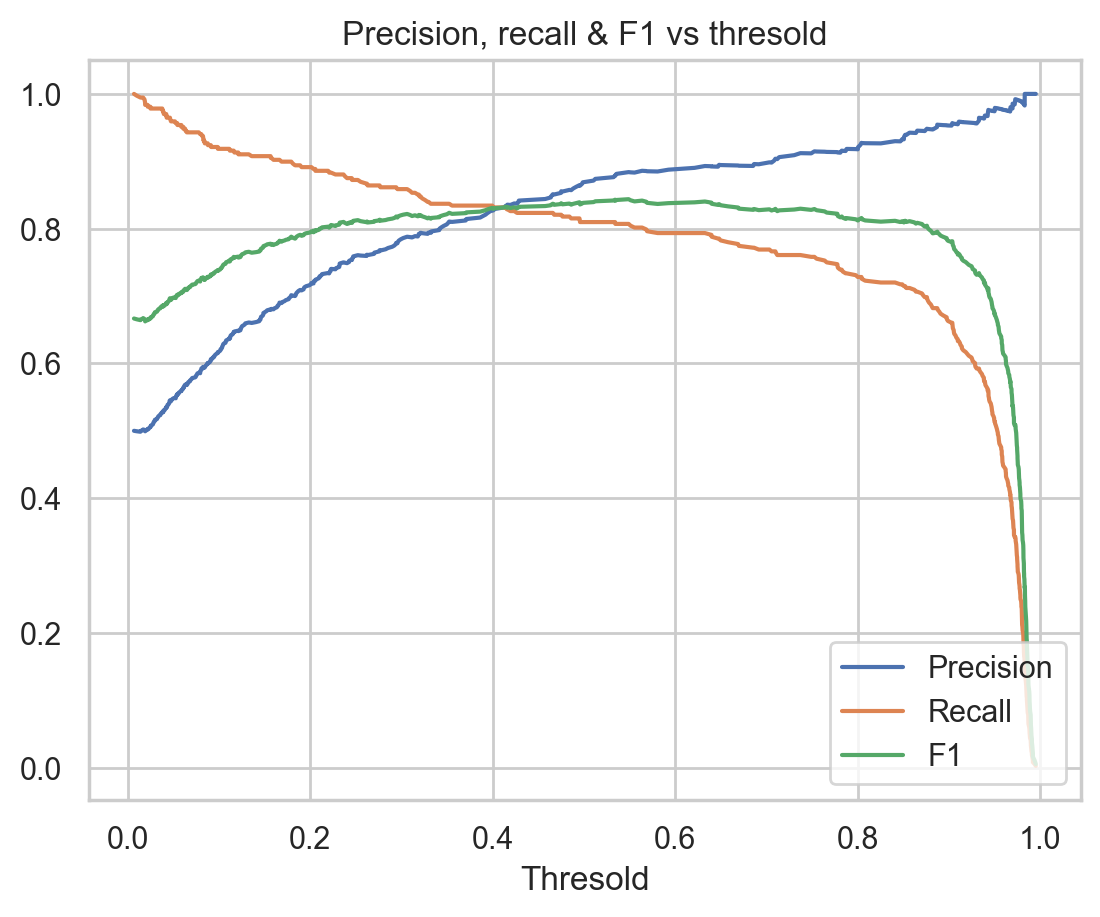

When F1 score is max 
      Precisions   Recalls       F1  Threshold
400    0.883929  0.807065  0.84375   0.549052


In [67]:
import yaml

# Load the YAML file
with open('../../model_artifact/training/orange/undersampling.yaml', 'r') as file:
    config = yaml.safe_load(file)

# Get the list of models
models = config["models"]

# Extract hyperparameters for each model
us_random_forest_params = next(model['hyperparameters'] for model in models if model['name'] == 'Random Forest')
us_decision_tree_params = next(model['hyperparameters'] for model in models if model['name'] == 'Decision Tree')
us_logistic_regression_params = next(model['hyperparameters'] for model in models if model['name'] == 'Logistic Regression')
us_xgboost_params = next(model['hyperparameters'] for model in models if model['name'] == 'XGBoost')

# Print the hyperparameters for each model
print("Random Forest Parameters:", us_random_forest_params)
print("Decision Tree Parameters:", us_decision_tree_params)
print("Logistic Regression Parameters:", us_logistic_regression_params)
print("XGBoost Parameters:", us_xgboost_params)

# Build model and evaluate
us_clsDT = DecisionTreeClassifier(**us_decision_tree_params)
us_clsLR = LogisticRegression(**us_logistic_regression_params)
us_clsXGB = XGBClassifier(**us_xgboost_params)
us_clsRF = RandomForestClassifier(**us_random_forest_params)

us_clsModels = [us_clsRF, us_clsDT, us_clsLR, us_clsXGB]
Cross_validation_score(us_clsModels, clsModelsNm, [(x_train_downsampled, y_train_downsampled,'Undersampling data')], scoreMatrix)

## Model Evaluation

In [68]:
def Cus_log_loss(target, predicted):
    if len(predicted) != len(target):
        print("Data object initiated")
        return
    
    target = [float(x) for x in target] # converting target into float
    predicted = [min([max([x,1e-15]), 1-1e-15]) for x in predicted]
        
    return -1.0 / len(target) *  sum([ target[i] * math.log(predicted[i]) + (1.0 - target[i]) * math.log(1.0 - predicted[i]) 
                                      for i in range(len(predicted))])

In [69]:
def Model_evaluation(models, clsModelsNm, x_train, y_train, x_test, y_test,  threshold ):
    
    predicted_val = {}
    for i, model in enumerate(clsModelsNm):
        models[i].fit(x_train,y_train)
        predicted_proba = models[i].predict_proba(x_test)
        
        predicted = predicted_proba[:,1].copy()
        predicted[predicted >=threshold[i]] = 1
        predicted[predicted < threshold[i]] = 0
        
        confusion_matrix_matrix = metrics.confusion_matrix(y_true = y_test
                                                   ,y_pred = predicted
                                                   #,normalize = 'true' 
                                                   )
        
        print("***********",clsModelsNm[i], "*************")
        print(metrics.classification_report(y_test, predicted))
        print("*******************************************")
        #print("Log loss score", round(metrics.log_loss(y_test,models[i].predict_proba(x_test)[:,1]),2))
        print("Log loss score", round(Cus_log_loss(y_test,predicted_proba[:,1]),2))
        print("*******************************************")
        print("Confusion matrix")
        sns.heatmap(confusion_matrix_matrix
                    , annot=True
                    , fmt="d"
                   )
        plt.xlabel("Predicted label")
        plt.ylabel("Actual label")
        plt.show()
        print("*******************************************")
        
        predicted_val[model] = predicted
        

### Original Data

*********** Random Forest *************
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       545
           1       0.85      0.72      0.78        96

    accuracy                           0.94       641
   macro avg       0.90      0.85      0.87       641
weighted avg       0.94      0.94      0.94       641

*******************************************
Log loss score 0.22
*******************************************
Confusion matrix


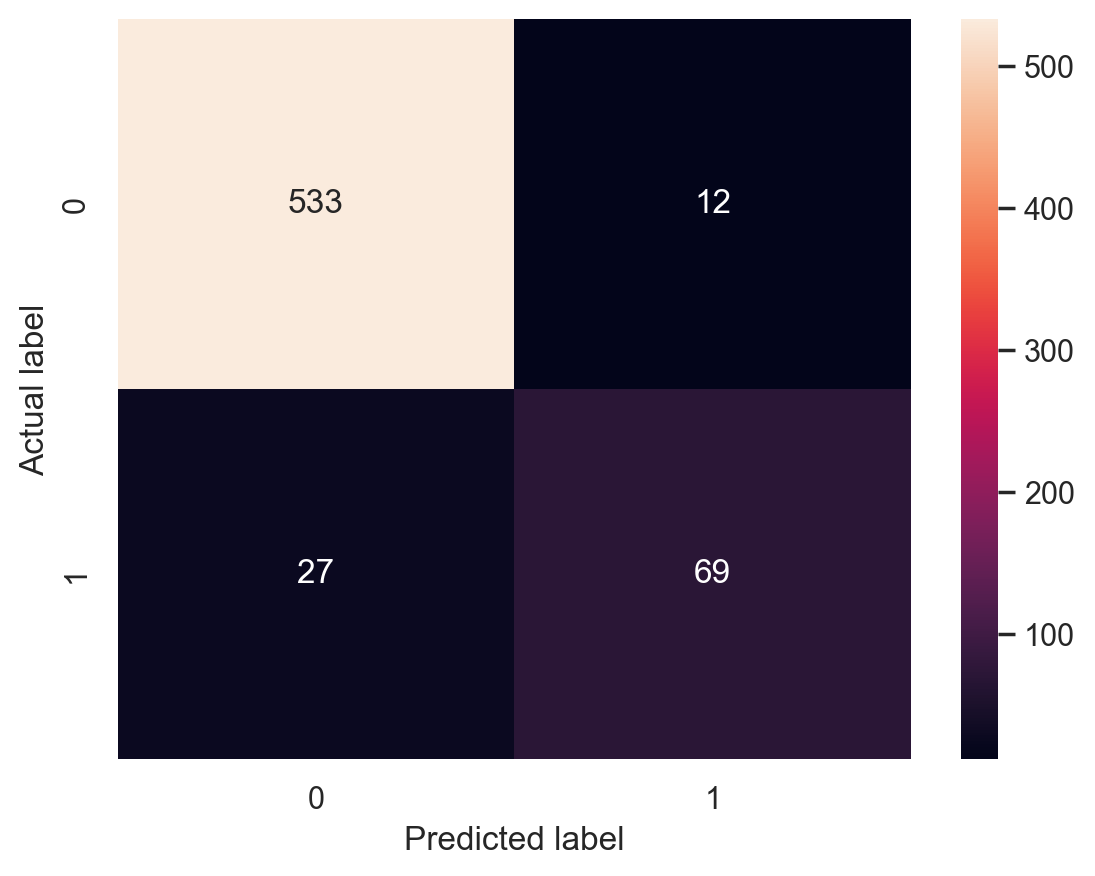

*******************************************
*********** Decision Tree *************
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       545
           1       0.78      0.66      0.71        96

    accuracy                           0.92       641
   macro avg       0.86      0.81      0.83       641
weighted avg       0.92      0.92      0.92       641

*******************************************
Log loss score 0.31
*******************************************
Confusion matrix


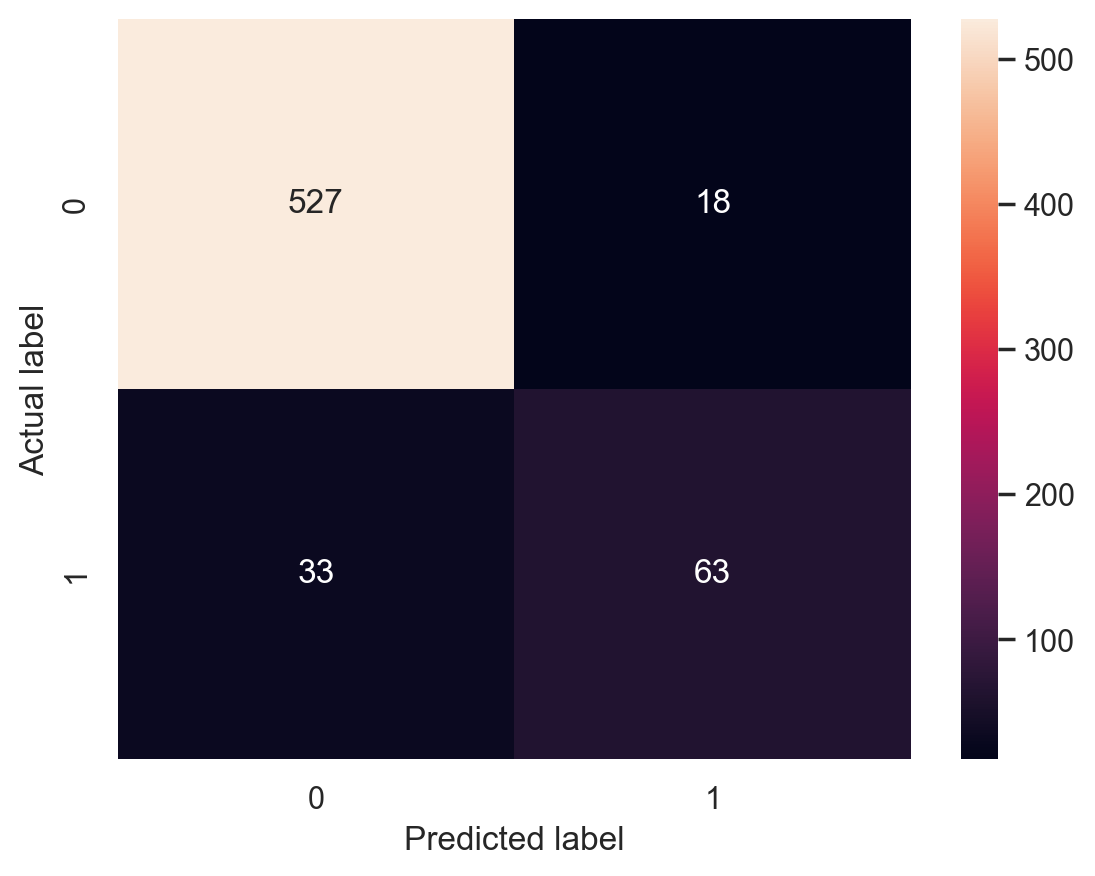

*******************************************
*********** Logistic Regression *************
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       545
           1       0.42      0.61      0.50        96

    accuracy                           0.81       641
   macro avg       0.67      0.73      0.69       641
weighted avg       0.85      0.81      0.83       641

*******************************************
Log loss score 0.34
*******************************************
Confusion matrix


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


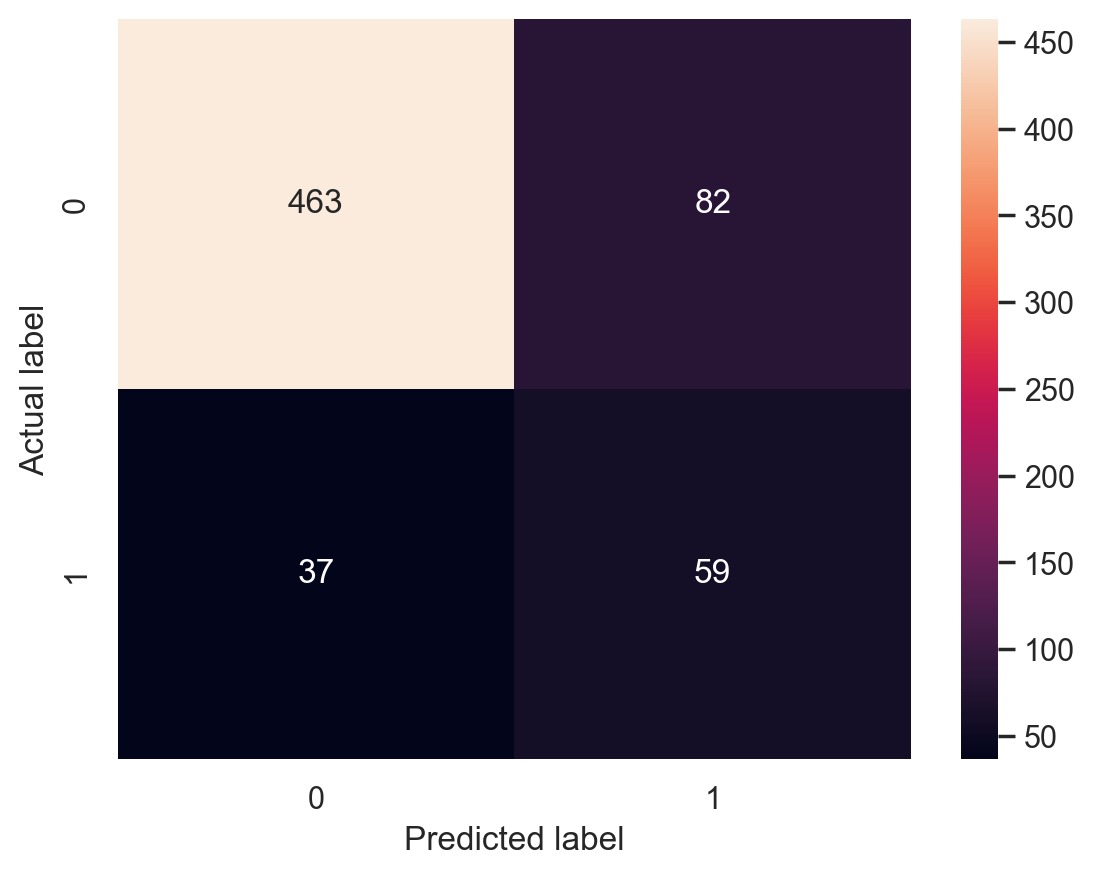

*******************************************
*********** XGBoost *************
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       545
           1       0.81      0.69      0.75        96

    accuracy                           0.93       641
   macro avg       0.88      0.83      0.85       641
weighted avg       0.93      0.93      0.93       641

*******************************************
Log loss score 0.21
*******************************************
Confusion matrix


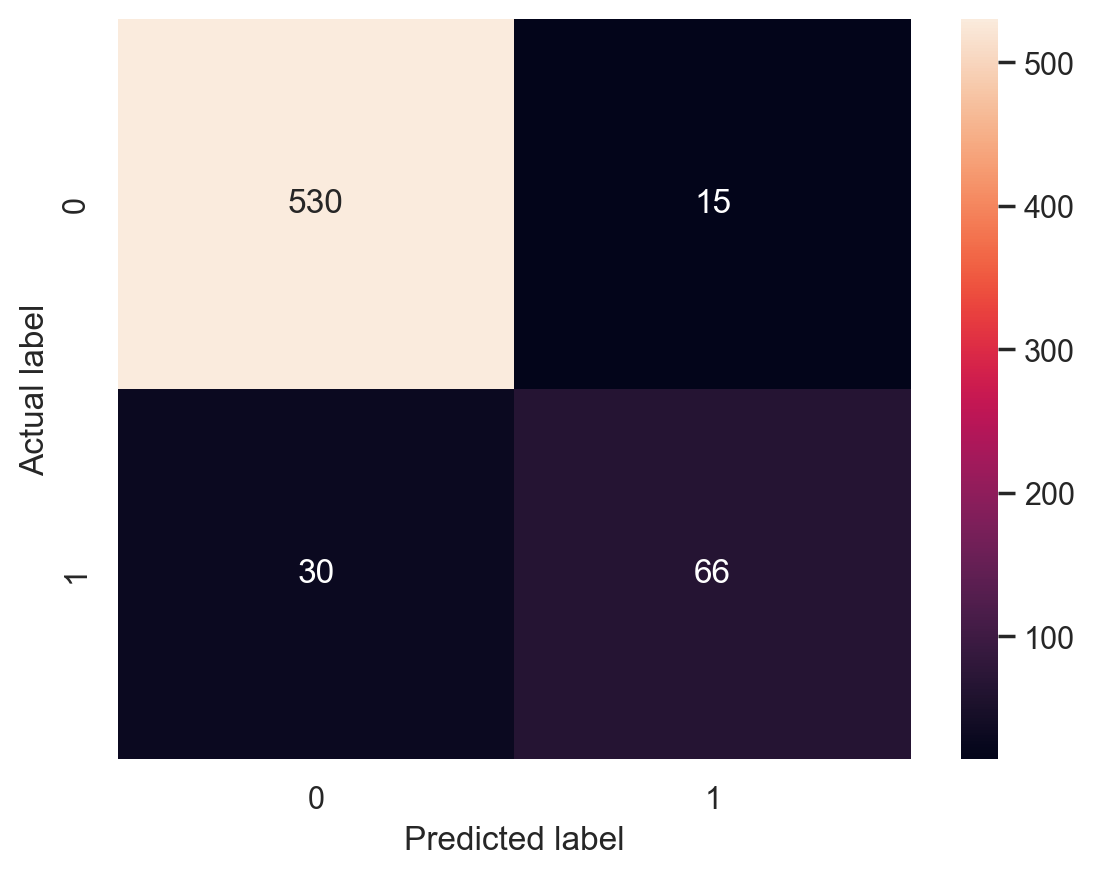

*******************************************


In [75]:
og_lr_threshold = 0.212118
og_dt_threshold = 0.454545
og_rf_threshold = 0.406336
og_xgb_threshold =  0.498975
Model_evaluation(og_clsModels
                 , clsModelsNm
                 , X_train
                 , y_train
                 , X_test
                 , y_test
                 , [og_rf_threshold
                    ,og_dt_threshold
                    , og_lr_threshold
                    , og_xgb_threshold] )


### Upsampling data

In [77]:
clsModelsNm

['Random Forest', 'Decision Tree', 'Logistic Regression', 'XGBoost']

In [78]:
os_clsModels

[RandomForestClassifier(max_depth=8, min_samples_leaf=7, n_estimators=400),
 DecisionTreeClassifier(max_depth=6, min_samples_leaf=10),
 LogisticRegression(C=1, solver='newton-cg'),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=0.2, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=9, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=500, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...)]

*********** Random Forest *************
              precision    recall  f1-score   support

           0       0.97      0.82      0.88       545
           1       0.44      0.83      0.58        96

    accuracy                           0.82       641
   macro avg       0.70      0.82      0.73       641
weighted avg       0.89      0.82      0.84       641

*******************************************
Log loss score 0.39
*******************************************
Confusion matrix


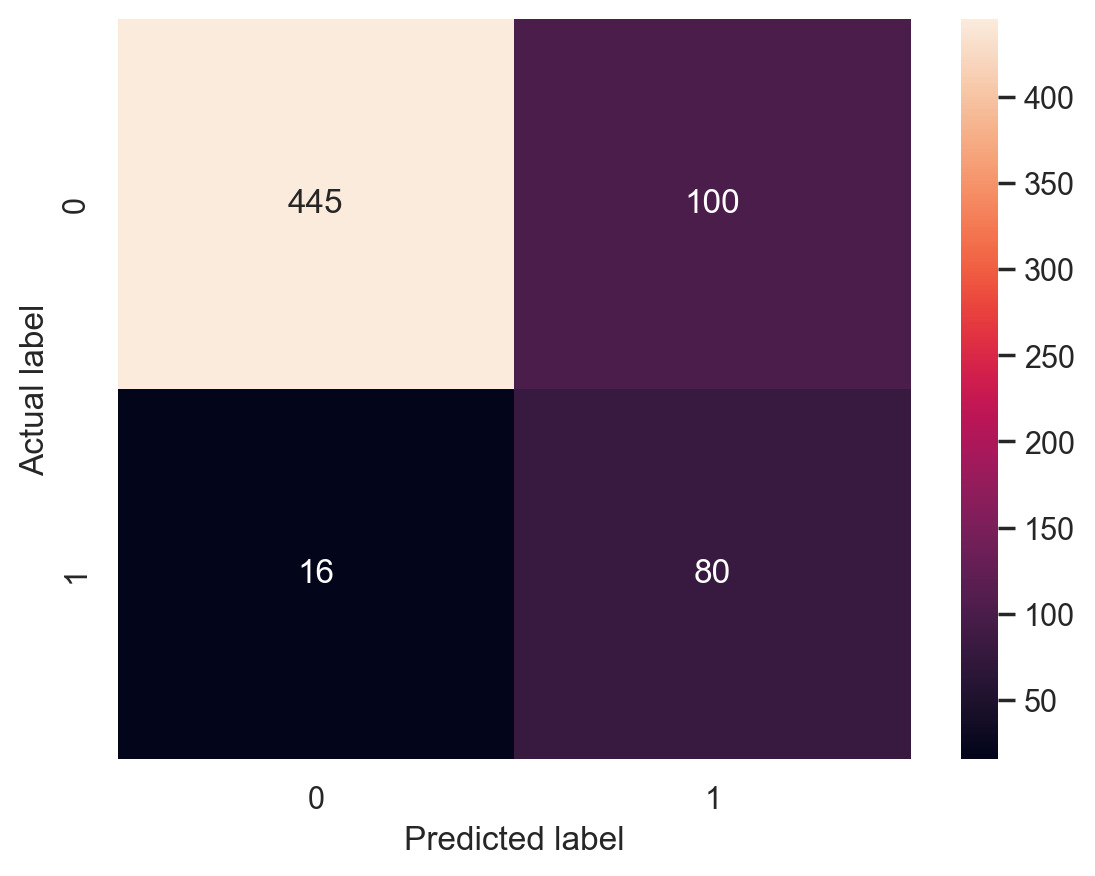

*******************************************
*********** Decision Tree *************
              precision    recall  f1-score   support

           0       0.96      0.82      0.88       545
           1       0.43      0.79      0.56        96

    accuracy                           0.81       641
   macro avg       0.69      0.80      0.72       641
weighted avg       0.88      0.81      0.83       641

*******************************************
Log loss score 0.92
*******************************************
Confusion matrix


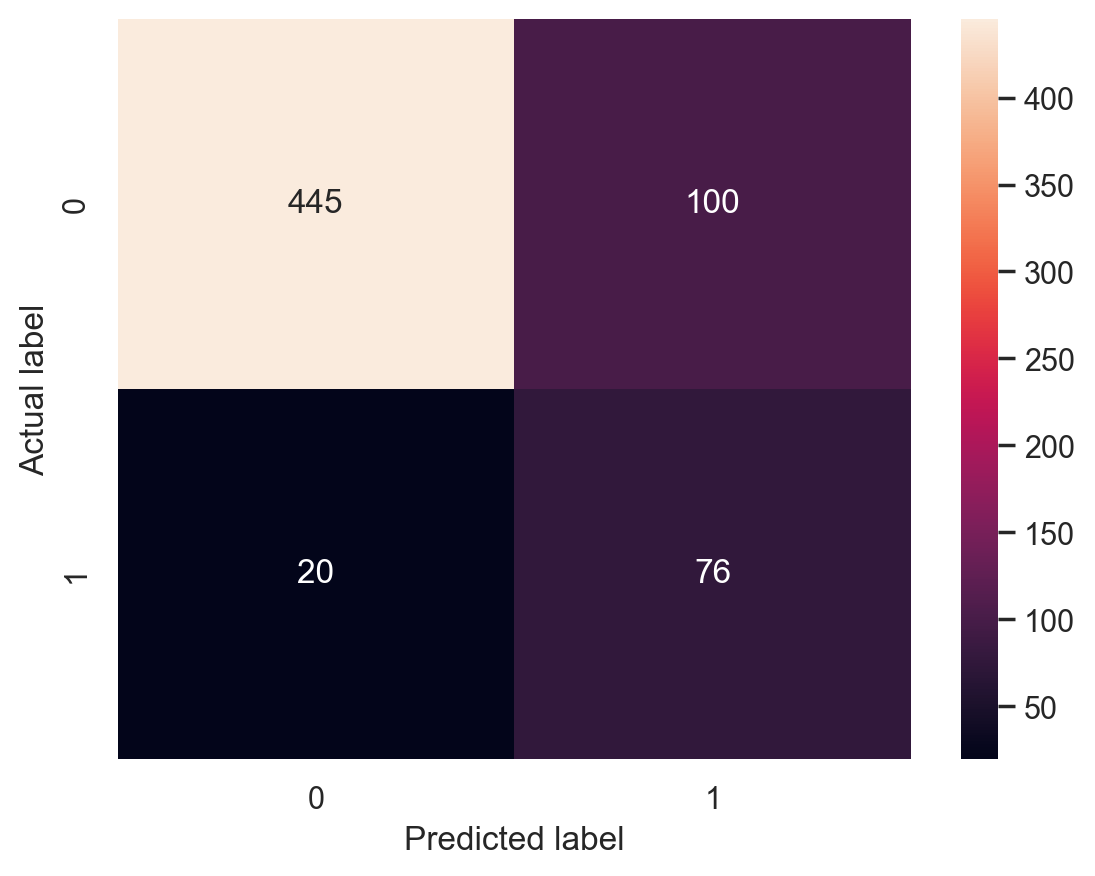

*******************************************
*********** Logistic Regression *************
              precision    recall  f1-score   support

           0       0.95      0.35      0.52       545
           1       0.19      0.89      0.32        96

    accuracy                           0.43       641
   macro avg       0.57      0.62      0.42       641
weighted avg       0.83      0.43      0.49       641

*******************************************
Log loss score 0.6
*******************************************
Confusion matrix


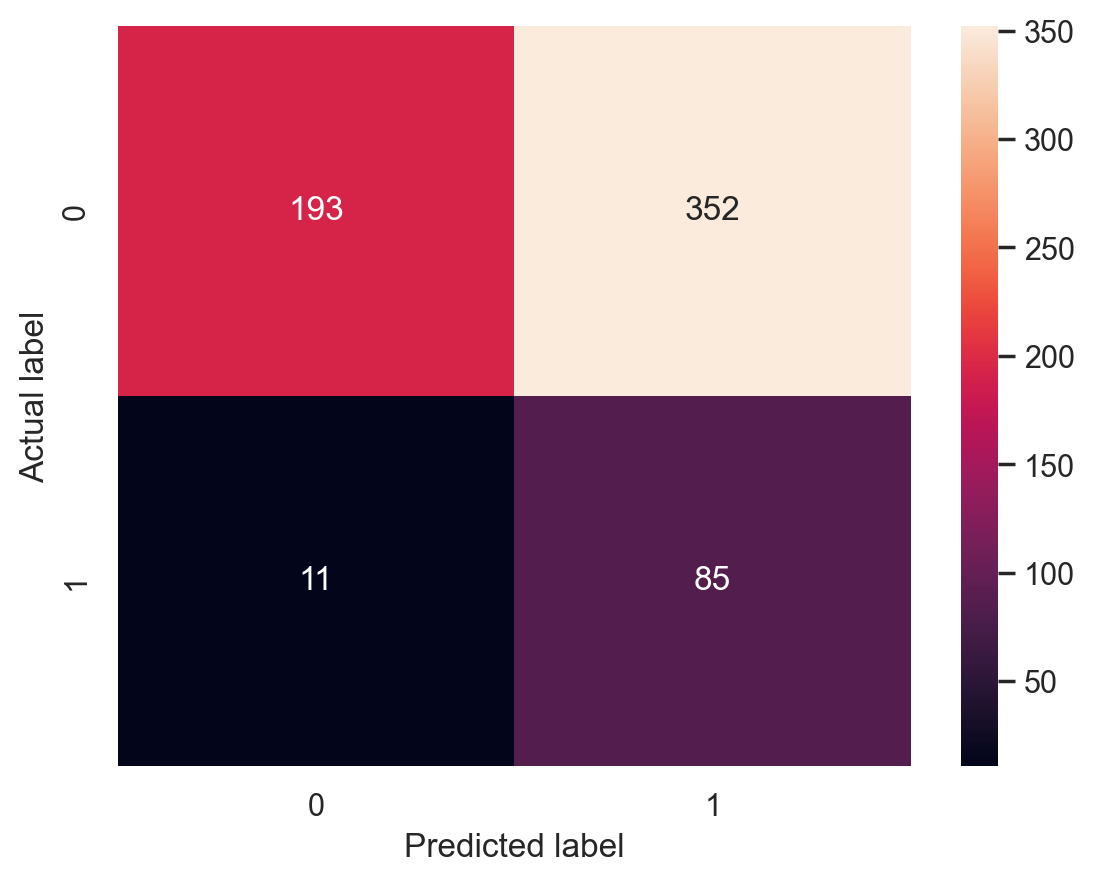

*******************************************
*********** XGBoost *************
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       545
           1       0.62      0.72      0.66        96

    accuracy                           0.89       641
   macro avg       0.78      0.82      0.80       641
weighted avg       0.90      0.89      0.89       641

*******************************************
Log loss score 0.34
*******************************************
Confusion matrix


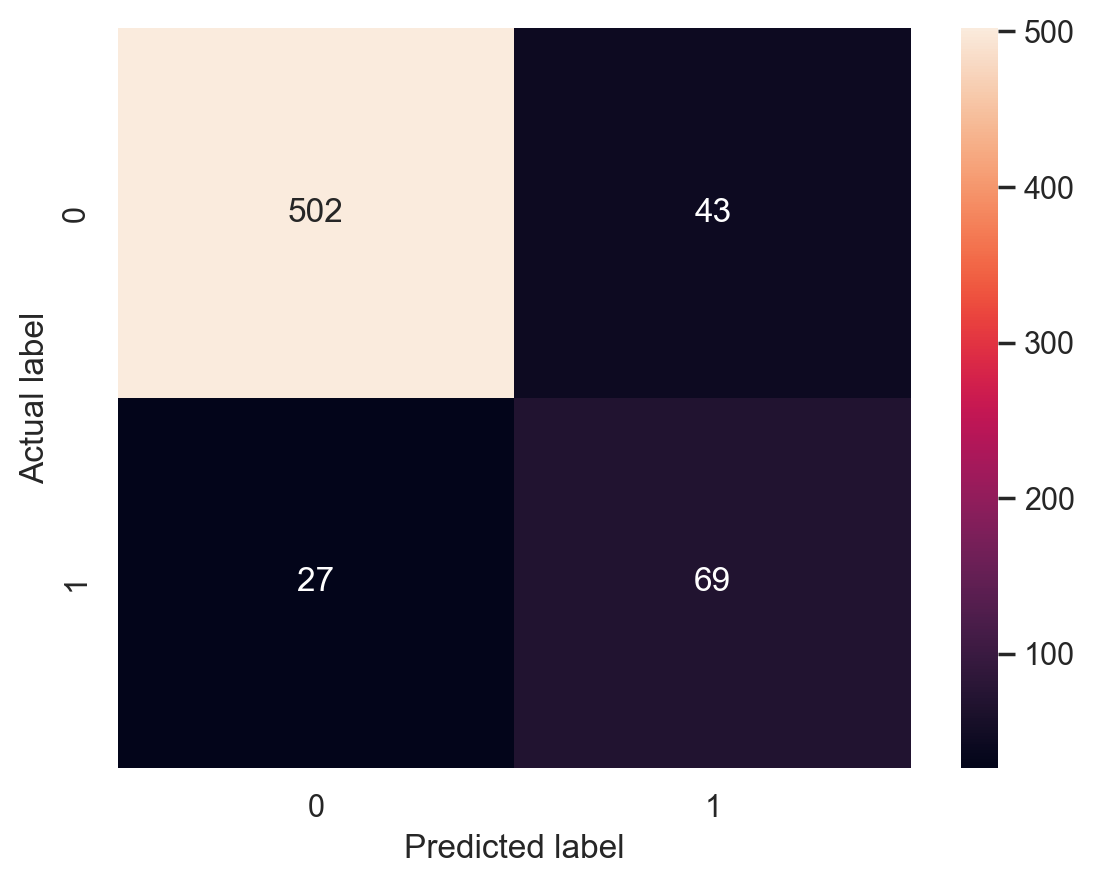

*******************************************


In [76]:
os_lr_threshold =0.321083
os_dt_threshold = 0.363636
os_rf_threshold = 0.360756
os_xgb_threshold =  0.518781
Model_evaluation(os_clsModels
                 , clsModelsNm
                 , X_train_upsampled
                 , y_train_upsampled
                 , X_test
                 , y_test
                 , [os_rf_threshold
                    ,os_dt_threshold
                    , os_lr_threshold
                    , os_xgb_threshold] )


### Downsampling data

*********** Random Forest *************
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       545
           1       0.42      0.89      0.57        96

    accuracy                           0.80       641
   macro avg       0.70      0.84      0.72       641
weighted avg       0.89      0.80      0.83       641

*******************************************
Log loss score 0.4
*******************************************
Confusion matrix


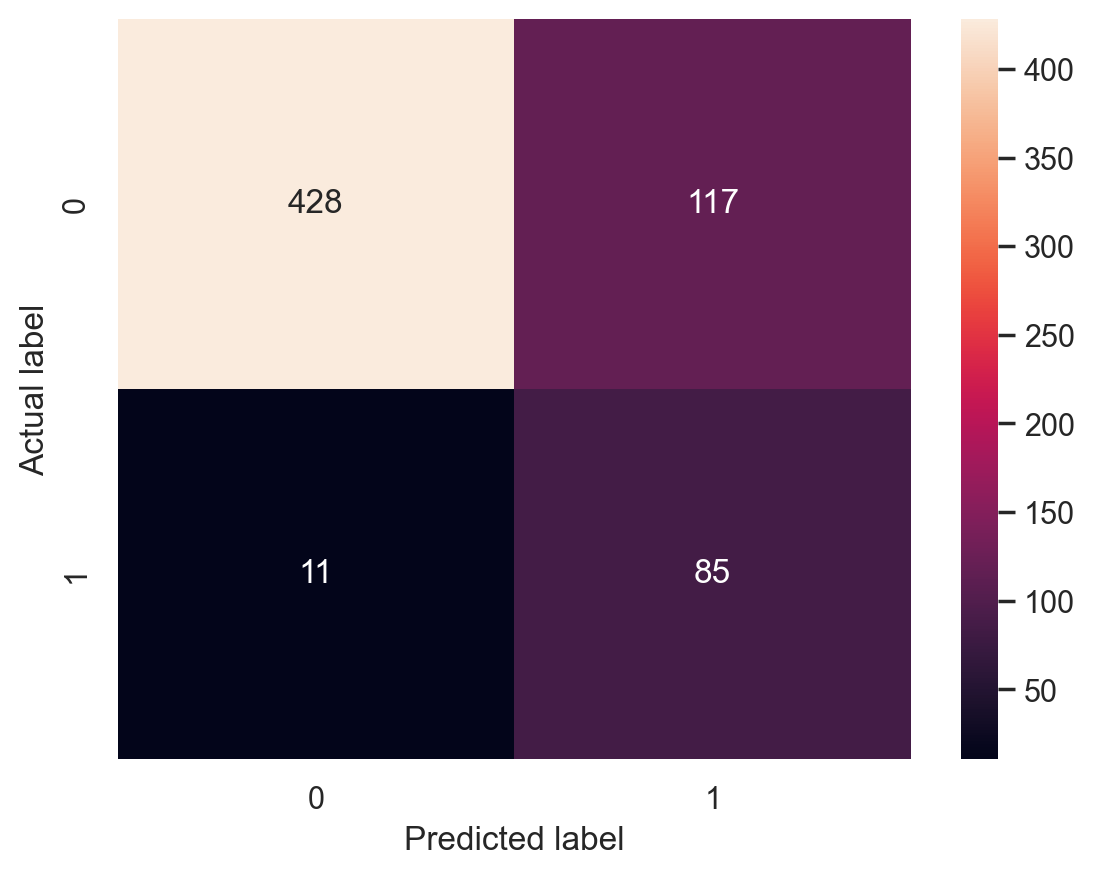

*******************************************
*********** Decision Tree *************
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       545
           1       0.46      0.81      0.59        96

    accuracy                           0.83       641
   macro avg       0.71      0.82      0.74       641
weighted avg       0.89      0.83      0.85       641

*******************************************
Log loss score 1.64
*******************************************
Confusion matrix


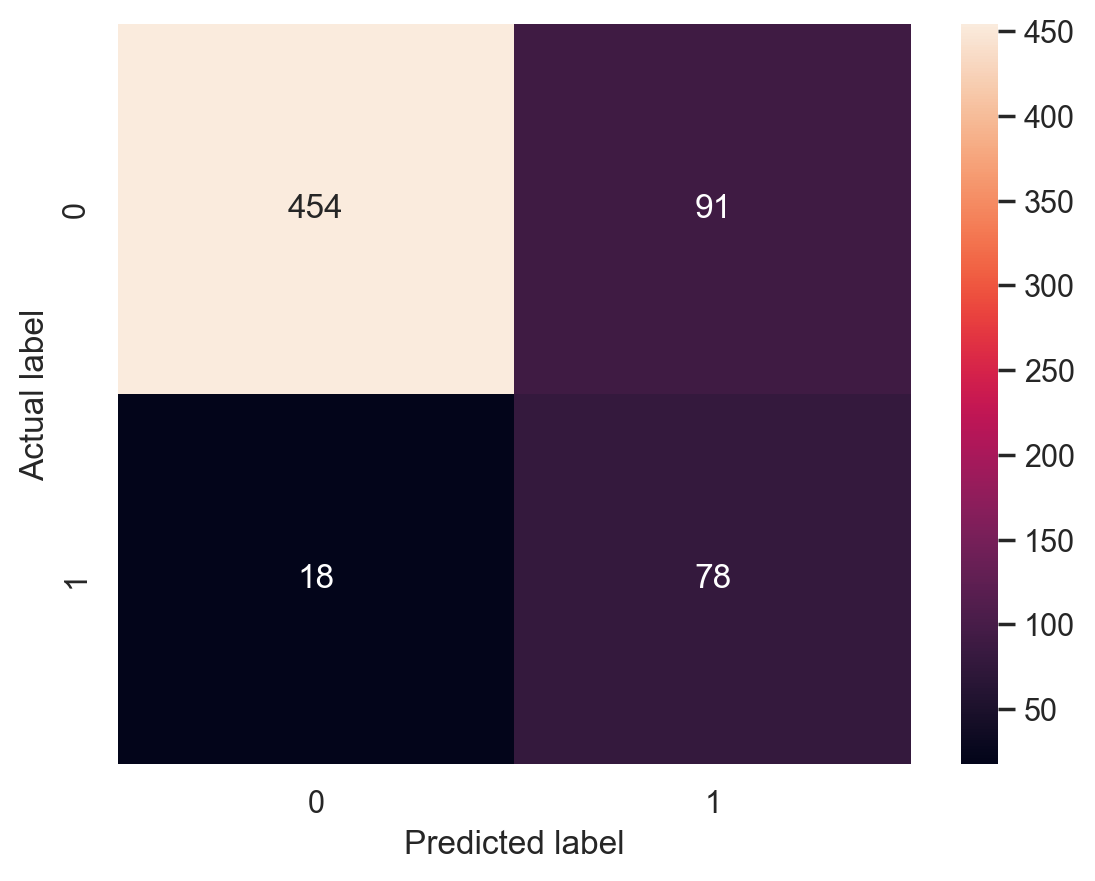

*******************************************
*********** Logistic Regression *************
              precision    recall  f1-score   support

           0       0.95      0.64      0.76       545
           1       0.29      0.82      0.42        96

    accuracy                           0.67       641
   macro avg       0.62      0.73      0.59       641
weighted avg       0.85      0.67      0.71       641

*******************************************
Log loss score 0.57
*******************************************
Confusion matrix


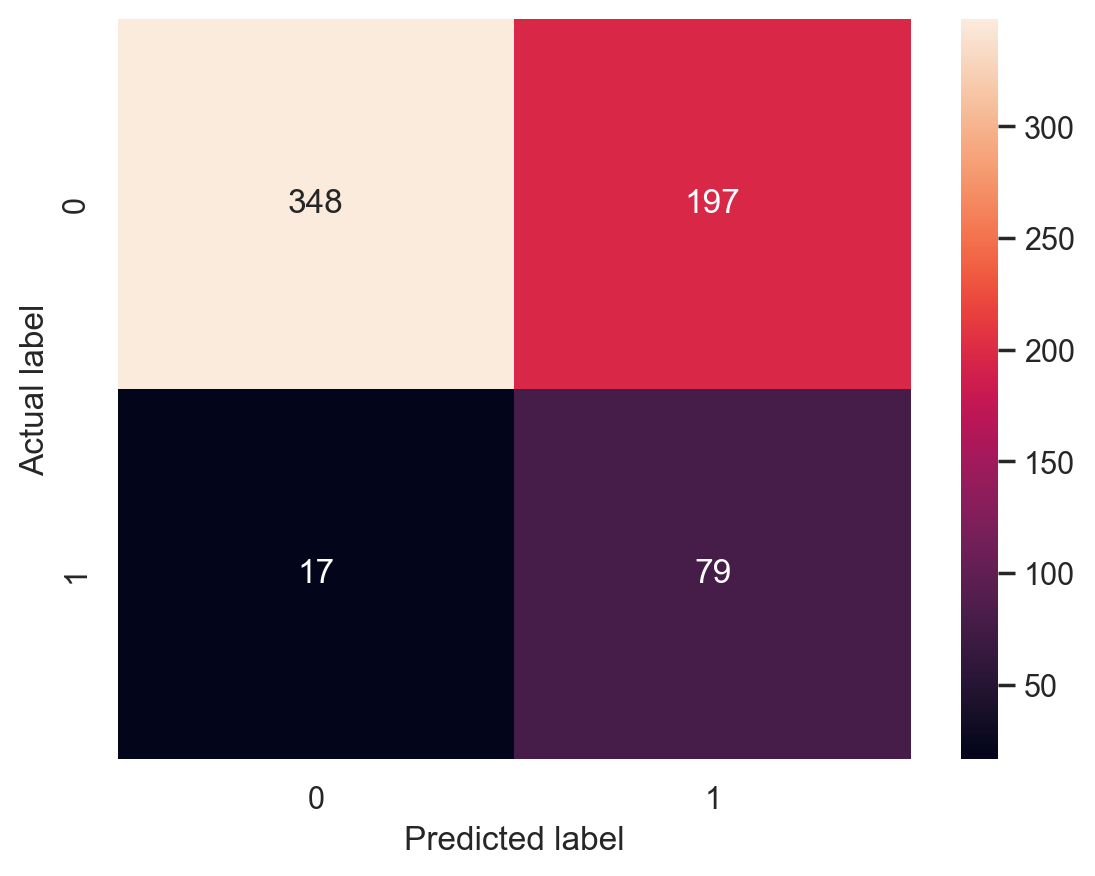

*******************************************
*********** XGBoost *************
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       545
           1       0.53      0.82      0.64        96

    accuracy                           0.86       641
   macro avg       0.75      0.85      0.78       641
weighted avg       0.90      0.86      0.87       641

*******************************************
Log loss score 0.41
*******************************************
Confusion matrix


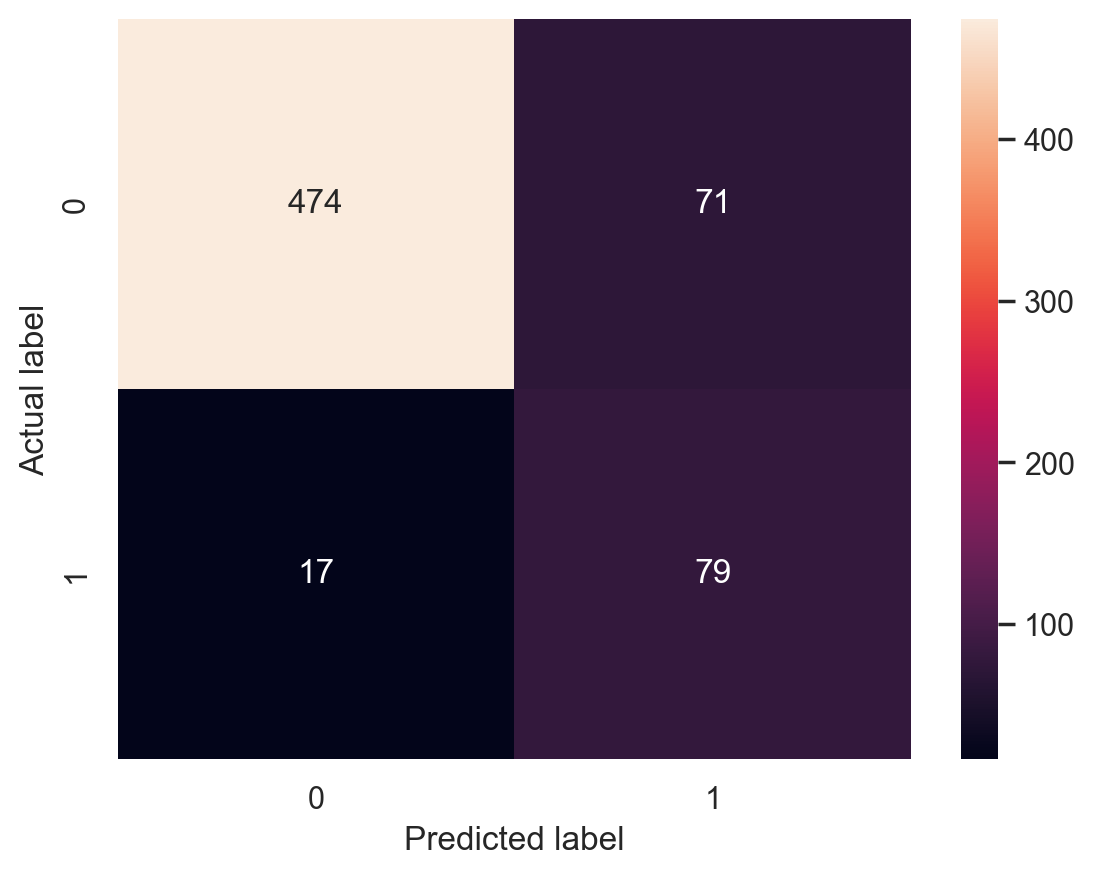

*******************************************


In [79]:
us_lr_threshold = 0.442047
us_dt_threshold = 0.473684
us_rf_threshold = 0.436961
us_xgb_threshold = 0.549052
Model_evaluation(us_clsModels
                 , clsModelsNm
                 , x_train_downsampled
                 , y_train_downsampled
                 , X_test
                 , y_test
                 , [us_rf_threshold
                    ,us_dt_threshold
                    , us_lr_threshold
                    , us_xgb_threshold] )


# Additional Material

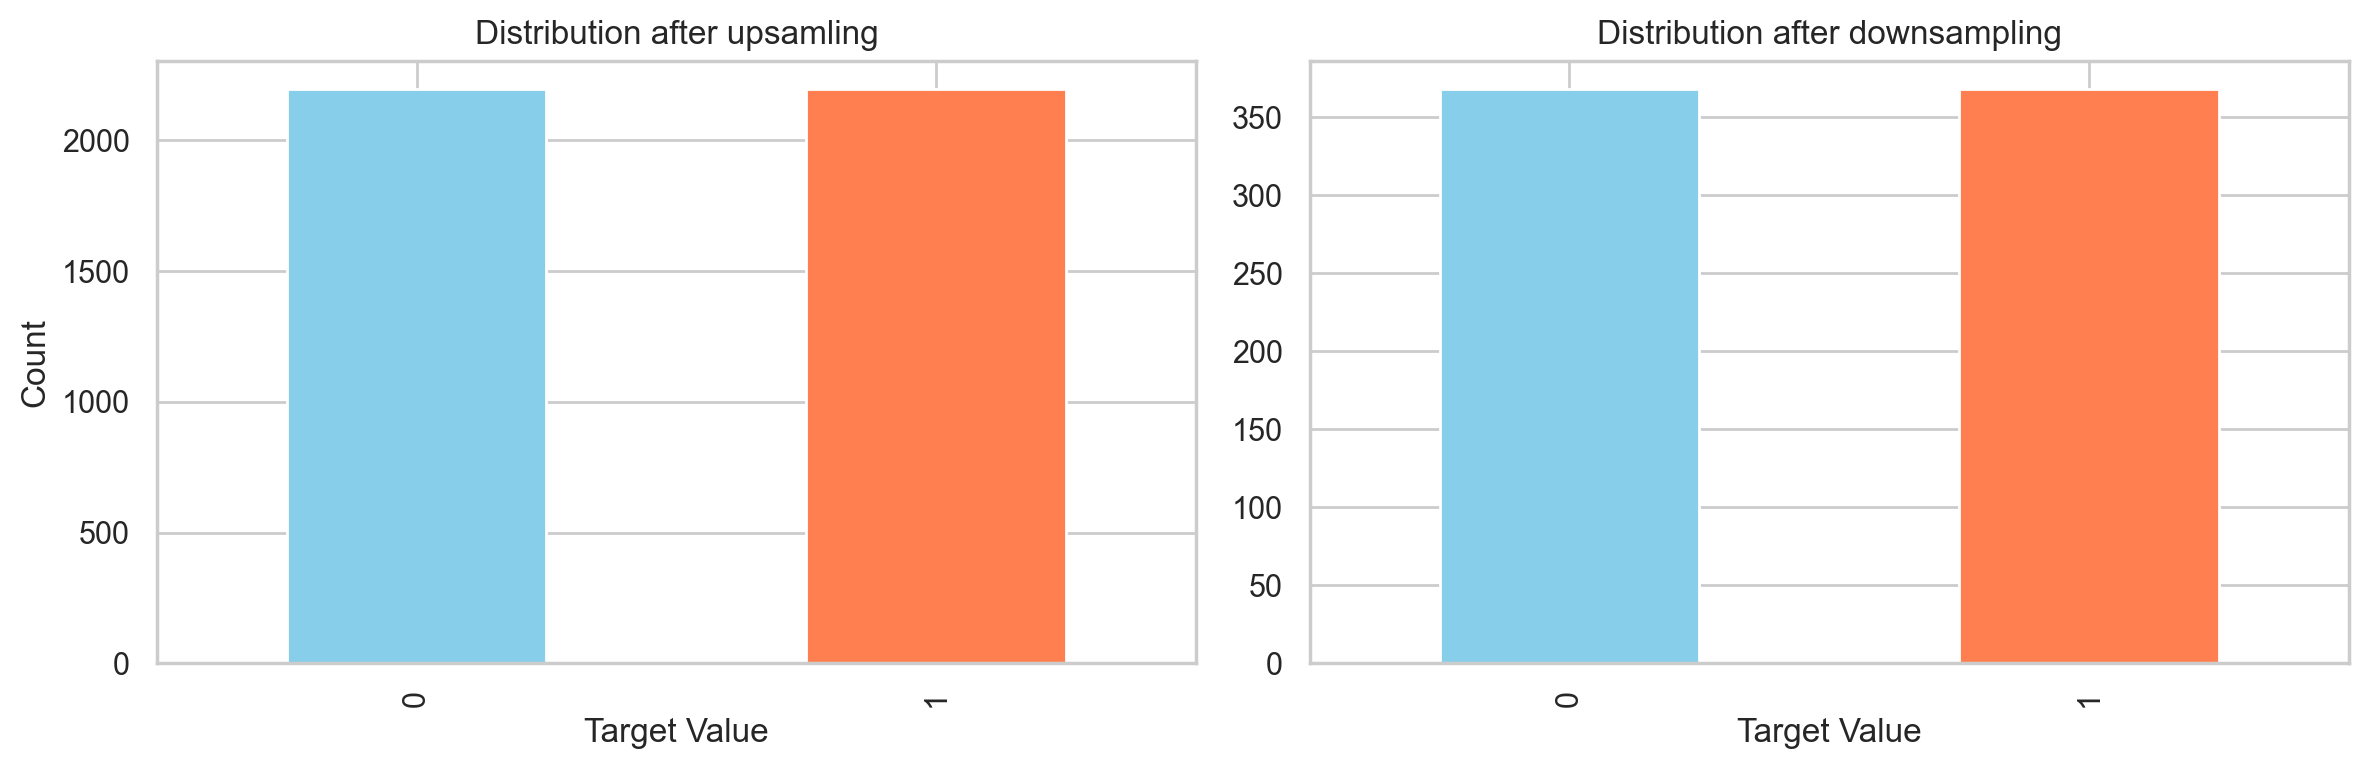

In [73]:
distribution_upsampled = y_train_upsampled.value_counts()
distribution_downsampled = y_train_downsampled.value_counts()
# Create subplots for side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot for y_train_upsampled
distribution_upsampled.plot(kind='bar', color=['skyblue', 'coral'], ax=axes[0])
axes[0].set_title('Distribution after upsamling')
axes[0].set_xlabel('Target Value')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['0', '1'])

# Plot for y_train_downsampled
distribution_downsampled.plot(kind='bar', color=['skyblue', 'coral'], ax=axes[1])
axes[1].set_title('Distribution after downsampling')
axes[1].set_xlabel('Target Value')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['0', '1'])

# Show the plot
plt.tight_layout()
plt.show()

In [74]:
data

Account length  International plan  Voice mail plan  \
0                128                   0                1   
1                107                   0                1   
2                137                   0                0   
3                 84                   1                0   
4                 75                   1                0   
...              ...                 ...              ...   
3328             192                   0                1   
3329              68                   0                0   
3330              28                   0                0   
3331             184                   1                0   
3332              74                   0                1   

      Number vmail messages  Total day charge  Total eve charge  \
0                        25             45.07             16.78   
1                        26             27.47             16.62   
2                         0             41.38             10.30   
3                         0             50.90              5.26   
4                         0             28.34             12.61   
...                     ...               ...               ...   
3328                     36             26.55             18.32   
3329                      0             39.29             13.04   
3330                      0             30.74             24.55   
3331                      0             36.35             13.57   
3332                     25             39.85             22.60   

      Total night charge  Total intl charge  Customer service calls  Churn  
0                  11.01               2.70                       1      0  
1                  11.45               3.70                       1      0  
2                   7.32               3.29                       0      0  
3                   8.86               1.78                       2      0  
4                   8.41               2.73                       3      0  
...                  ...                ...                     ...    ...  
3328               12.56               2.67                       2      0  
3329                8.61               2.59                       3      0  
3330                8.64               3.81                       2      0  
3331                6.26               1.35                       2      0  
3332               10.86               3.70                       0      0  

[3204 rows x 10 columns]